Fit interpretable models to the training set and test on validation sets.

In [1]:
#%matplotlib inline
#%load_ext autoreload
#%autoreload 2

import os
import pickle as pkl
from os.path import join as oj
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

import imodels
from rulevetting.api import validation_new
from rulevetting.projects.csi_pecarn.dataset import Dataset

MODELS_DIR = './models'
MODELS_RESAMPLED_DIR = "./models/resampled"

os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(MODELS_RESAMPLED_DIR, exist_ok=True)

outcome_def = 'outcome'  # output

from rulevetting.projects.csi_pecarn.model_helper import var_selection, predict_and_save, model_valid, fit_simple_models, fit_other_models, plot_metrics, print_metrics 

/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-env/lib/python3.8/site-packages/redis/connection.py:72: UserWarning: redis-py works best with hiredis. Please consider installing
  warnings.warn(msg)


## Make 10 repetitions (resampling)

In [2]:
# _, _, _ = Dataset().get_data(save_csvs=True, run_perturbations = True)

In [3]:
# _, _, _ = Dataset().get_data(save_csvs=True)

In [4]:
df_train, df_tune, df_test = Dataset().get_data(load_csvs=True)
print(df_train.shape)
df_train.head()
# df_train.columns

(1988, 45)


AVPUDetails  AlteredMentalStatus  ArrPtIntub  AxialLoadAnyDoc  \
2425          0.0                  0.0         0.0                0   
1803          0.0                  0.0         0.0                0   
240           0.0                  0.0         0.0                0   
2553          0.0                  0.0         0.0                0   
1029          0.0                  0.0         0.0                0   

      CervicalSpineImmobilization  DxCspineInjury  FocalNeuroFindings  \
2425                          0.0             0.0                 0.0   
1803                          0.0             0.0                 0.0   
240                           1.0             0.0                 0.0   
2553                          1.0             0.0                 0.0   
1029                          0.0             1.0                 0.0   

      HighriskDiving  HighriskFall  HighriskHanging  ...  PtTenderPelvis  \
2425             0.0           0.0              0.0  ...               0   
1803             0.0           0.0              0.0  ...               0   
240              0.0           0.0              0.0  ...               0   
2553             0.0           0.0              0.0  ...               0   
1029             0.0           0.0              0.0  ...               0   

      SubInj_Ext  SubInj_Face  SubInj_Head  SubInj_TorsoTrunk  TenderNeck  \
2425         0.0          0.0          0.0                0.0         1.0   
1803         0.0          0.0          0.0                0.0         1.0   
240          0.0          0.0          0.0                0.0         0.0   
2553         0.0          0.0          0.0                0.0         1.0   
1029         0.0          0.0          0.0                0.0         1.0   

      Torticollis  ambulatory  axialloadtop  outcome  
2425          0.0         1.0             0        0  
1803          0.0         1.0             0        0  
240           0.0         0.0             0        0  
2553          0.0         0.0             0        0  
1029          1.0         0.0             0        0  

[5 rows x 45 columns]

In [5]:
repetition = 10

In [6]:
dd = {}
for i in range(1, repetition+1):
    df_train, df_tune, df_test = Dataset().get_data(load_csvs=True, resampling = i)
    dd[i] = {}
    dd[i]["train"] = df_train
    dd[i]["tune"] = df_tune
    dd[i]["test"] = df_test
    print(df_train.shape, df_tune.shape, df_test.shape)

print(dd.keys())
for i in range(1, repetition+1):
    print(i, dd[i]["train"].iloc[[0]]["outcome"])

(1988, 45) (663, 45) (663, 45)
(1988, 45) (663, 45) (663, 45)
(1988, 45) (663, 45) (663, 45)
(1988, 45) (663, 45) (663, 45)
(1988, 45) (663, 45) (663, 45)
(1988, 45) (663, 45) (663, 45)
(1988, 45) (663, 45) (663, 45)
(1988, 45) (663, 45) (663, 45)
(1988, 45) (663, 45) (663, 45)
(1988, 45) (663, 45) (663, 45)
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
1 1259    0
Name: outcome, dtype: int64
2 1    1
Name: outcome, dtype: int64
3 1664    0
Name: outcome, dtype: int64
4 46    0
Name: outcome, dtype: int64
5 2216    0
Name: outcome, dtype: int64
6 1736    0
Name: outcome, dtype: int64
7 1546    0
Name: outcome, dtype: int64
8 2727    0
Name: outcome, dtype: int64
9 2494    1
Name: outcome, dtype: int64
10 748    0
Name: outcome, dtype: int64


## Run "fit_models.ipynb" for each perturbations

(NOTE) In the output of this cell there is a message says:  
```
Output of this cell has been trimmed on the initial display.
Displaying the first 50 top and last bottom outputs.
Click on this message to get the complete output.
```
If you click this you can see the whole result.

<< 1 >>
(1988, 45) (663, 45) (663, 45)
( 1 ) set X and y...
( 1 ) fit simple models...
decision_tree


100%|███████████████████████████████████████████████████| 12/12 [00:00<00:00, 3133.20it/s]


logistic


100%|███████████████████████████████████████████████████| 39/39 [00:00<00:00, 3493.09it/s]


adaboost


100%|███████████████████████████████████████████████████| 39/39 [00:00<00:00, 3719.96it/s]


( 1 ) fit other models...
bayesian_rule_list
Trained RuleListClassifier for detecting IwI
IF IntervForCervicalStab > 0.5 THEN probability of IwI: 61.2% (56.8%-65.5%)
ELSE IF FocalNeuroFindings > 0.5 THEN probability of IwI: 19.5% (12.9%-27.1%)
ELSE IF DxCspineInjury > 0.5 THEN probability of IwI: 14.4% (8.5%-21.5%)
ELSE probability of IwI: 1.1% (0.6%-1.7%)



100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1828.38it/s]

rulefit


                                                                                     rule  \
10                                 HighriskDiving <= 0.5 and IntervForCervicalStab <= 0.5   
12  HighriskDiving <= 0.5 and IntervForCervicalStab <= 0.5 and PtExtremityWeakness <= 0.5   
9             ArrPtIntub <= 0.5 and IntervForCervicalStab <= 0.5 and PtSensoryLoss <= 0.5   
11                                 DxCspineInjury <= 0.5 and IntervForCervicalStab <= 0.5   

    coef  
10 -0.02  
12 -0.11  
9  -0.10  
11 -0.02  


100%|█████████████████████████████████████████████████████| 9/9 [00:00<00:00, 2117.74it/s]
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-vetting/rulevetting/api/validation_new.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/seunghoon

grl
mean 0.173 (1988 pts)
if IntervForCervicalStab >= 1.0 then 0.612 (480 pts)
mean 0.033 (1508 pts)
if feat 2 >= 1.0 then 0.19 (116 pts)
mean 0.02 (1392 pts)
if feat 0 >= 1.0 then 0.194 (67 pts)
mean 0.011 (1325 pts)
if feat 3 >= 1.0 then 0.4 (5 pts)
mean 0.01 (1320 pts)
if feat 1 >= 1.0 then 0.079 (89 pts)
mean 0.005 (1231 pts)
if feat 8 >= 1.0 then 0.043 (47 pts)
mean 0.003 (1184 pts)
if feat 4 >= 1.0 then 0.019 (54 pts)
mean 0.003 (1130 pts)
if feat 8 >= 0.5 then nan (0 pts)
mean 0.003 (1130 pts)
if feat 8 >= 0.5 then nan (0 pts)



100%|█████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2098.20it/s]

( 1 ) observe all the results...


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

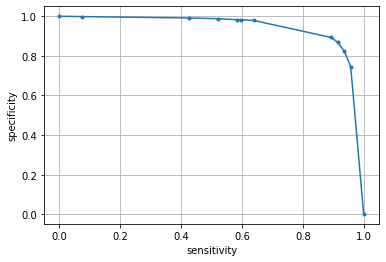

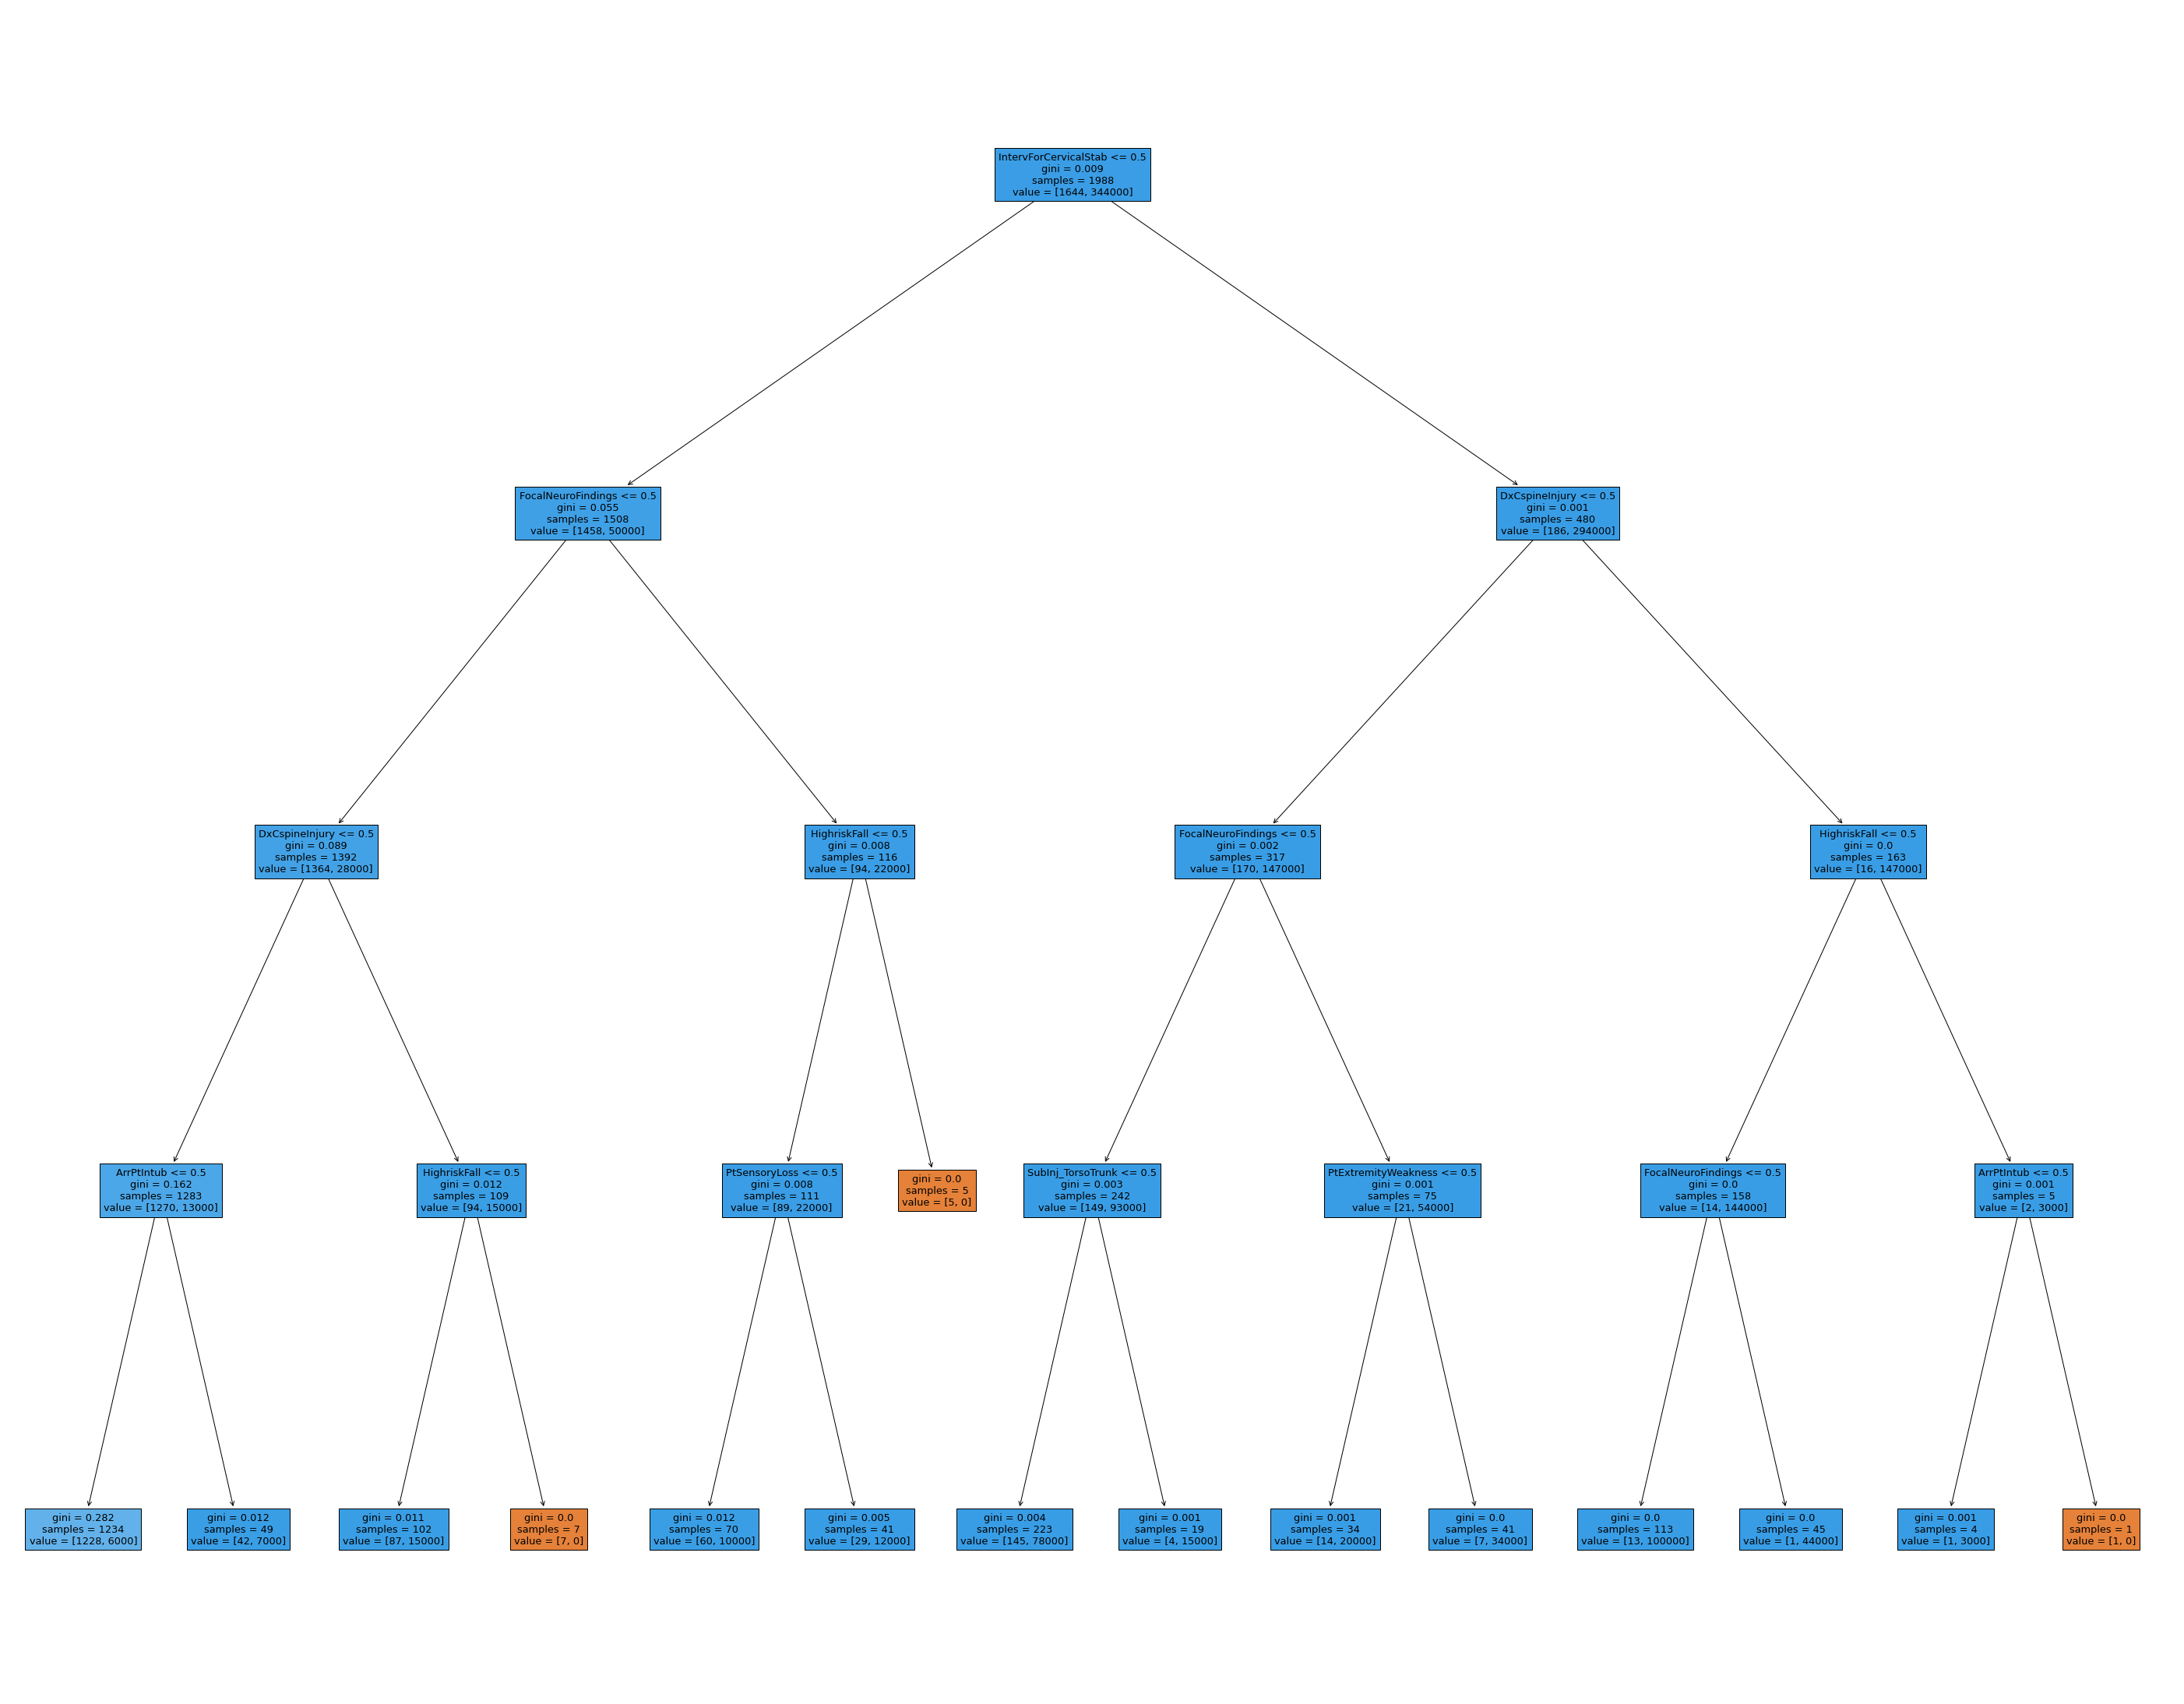

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

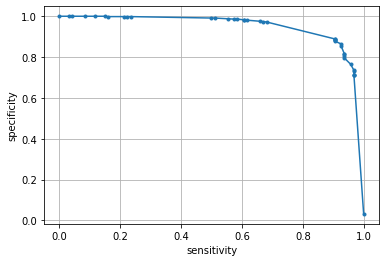

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

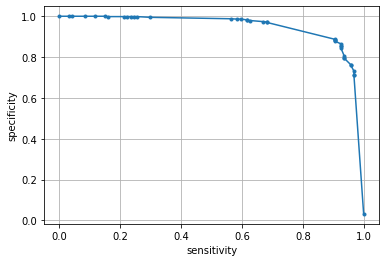

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

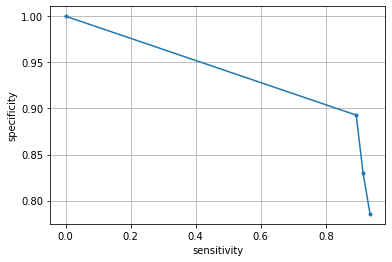

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

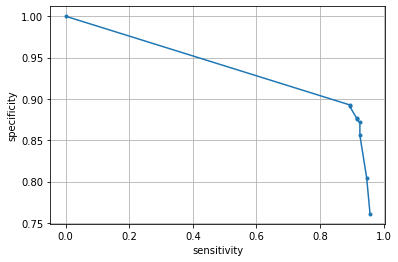

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

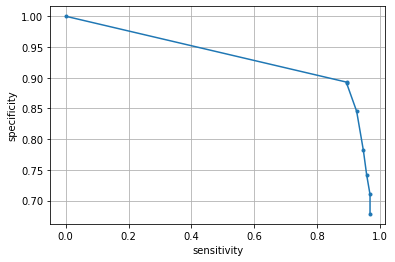

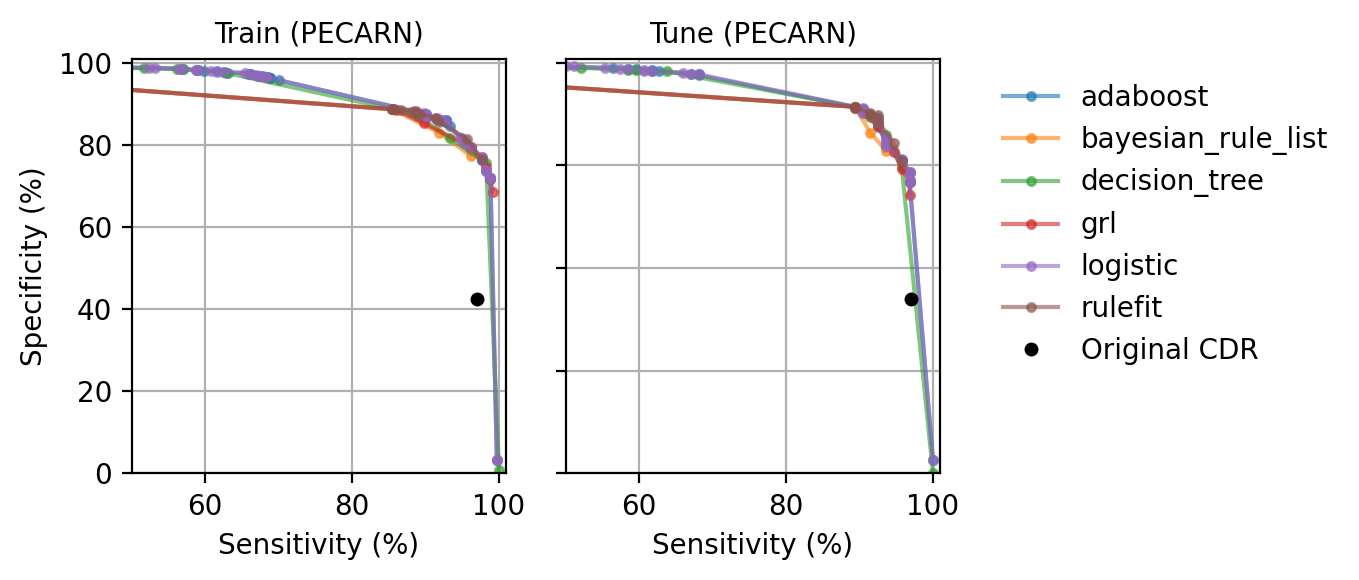


 _train
adaboost.pkl


100%|███████████████████████████████████████████████████| 67/67 [00:00<00:00, 3236.08it/s]


bayesian_rule_list.pkl


100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1977.28it/s]


decision_tree.pkl


100%|███████████████████████████████████████████████████| 12/12 [00:00<00:00, 2215.30it/s]


grl.pkl


100%|█████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2119.81it/s]


logistic.pkl


100%|███████████████████████████████████████████████████| 67/67 [00:00<00:00, 3035.21it/s]


rulefit.pkl


100%|███████████████████████████████████████████████████| 12/12 [00:00<00:00, 2375.25it/s]



 _tune
adaboost.pkl


100%|███████████████████████████████████████████████████| 39/39 [00:00<00:00, 3687.18it/s]


bayesian_rule_list.pkl


100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1994.20it/s]


decision_tree.pkl


100%|███████████████████████████████████████████████████| 12/12 [00:00<00:00, 2133.24it/s]


grl.pkl


100%|█████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1702.41it/s]

logistic.pkl



100%|███████████████████████████████████████████████████| 39/39 [00:00<00:00, 3673.35it/s]


rulefit.pkl


100%|█████████████████████████████████████████████████████| 9/9 [00:00<00:00, 1948.12it/s]



<< 2 >>
(1988, 45) (663, 45) (663, 45)
( 2 ) set X and y...
( 2 ) fit simple models...
decision_tree


100%|███████████████████████████████████████████████████| 10/10 [00:00<00:00, 2577.94it/s]


logistic


100%|███████████████████████████████████████████████████| 60/60 [00:00<00:00, 3791.52it/s]

adaboost



/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-vetting/rulevetting/api/validation_new.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
100%|███████████████████████████████████████████████████| 60/60 [00:00<00:00, 3992.80it/s]


( 2 ) fit other models...
bayesian_rule_list
Trained RuleListClassifier for detecting IwI
IF IntervForCervicalStab > 0.5 THEN probability of IwI: 59.3% (54.8%-63.7%)
ELSE IF FocalNeuroFindings > 0.5 THEN probability of IwI: 14.0% (8.5%-20.7%)
ELSE IF DxCspineInjury > 0.5 THEN probability of IwI: 9.0% (4.4%-15.0%)
ELSE probability of IwI: 1.2% (0.6%-1.8%)



100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2147.07it/s]

rulefit


                                                                                rule  \
10                            HighriskDiving <= 0.5 and IntervForCervicalStab <= 0.5   
9                              IntervForCervicalStab <= 0.5 and PtSensoryLoss <= 0.5   
12  DxCspineInjury <= 0.5 and FocalNeuroFindings <= 0.5 and SubInj_TorsoTrunk <= 0.5   
11       ArrPtIntub <= 0.5 and IntervForCervicalStab <= 0.5 and PtSensoryLoss <= 0.5   

    coef  
10 -0.18  
9  -0.02  
12 -0.03  
11 -0.07  


100%|█████████████████████████████████████████████████████| 9/9 [00:00<00:00, 2150.07it/s]
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


grl
mean 0.157 (1988 pts)
if IntervForCervicalStab >= 1.0 then 0.593 (460 pts)
mean 0.026 (1528 pts)
if feat 0 >= 1.0 then 0.163 (86 pts)
mean 0.017 (1442 pts)
if feat 6 >= 1.0 then 0.213 (47 pts)
mean 0.011 (1395 pts)
if feat 1 >= 1.0 then 0.062 (96 pts)
mean 0.007 (1299 pts)
if feat 7 >= 1.0 then 0.042 (48 pts)
mean 0.006 (1251 pts)
if feat 2 >= 1.0 then 0.019 (52 pts)
mean 0.005 (1199 pts)
if feat 3 >= 1.0 then 0.005 (1194 pts)
mean 0 (5 pts)



100%|█████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2107.43it/s]

( 2 ) observe all the results...


<Figure size 432x288 with 0 Axes>

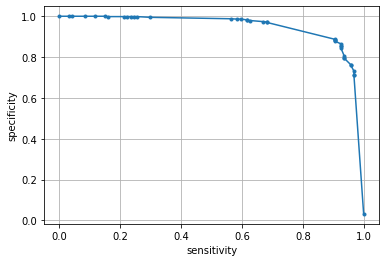

<Figure size 432x288 with 0 Axes>

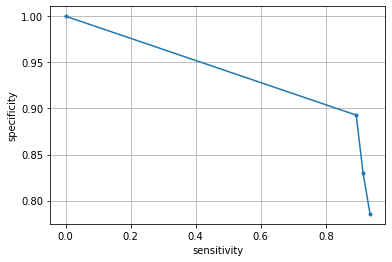

<Figure size 432x288 with 0 Axes>

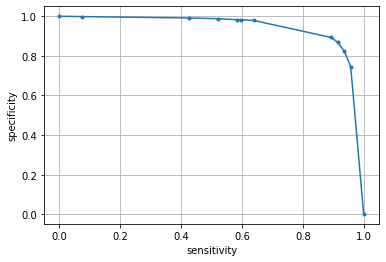

<Figure size 432x288 with 0 Axes>

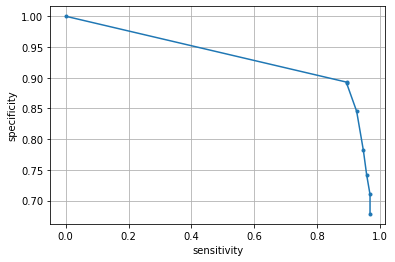

<Figure size 432x288 with 0 Axes>

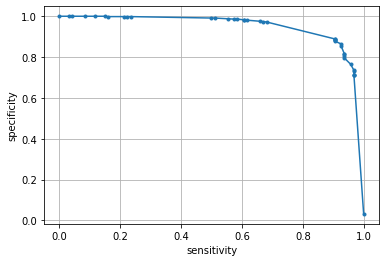

<Figure size 432x288 with 0 Axes>

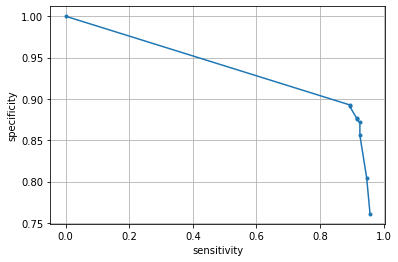

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

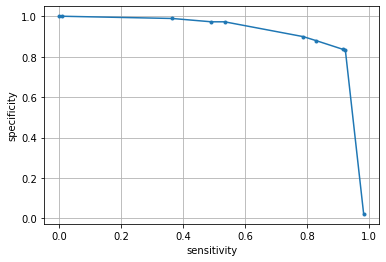

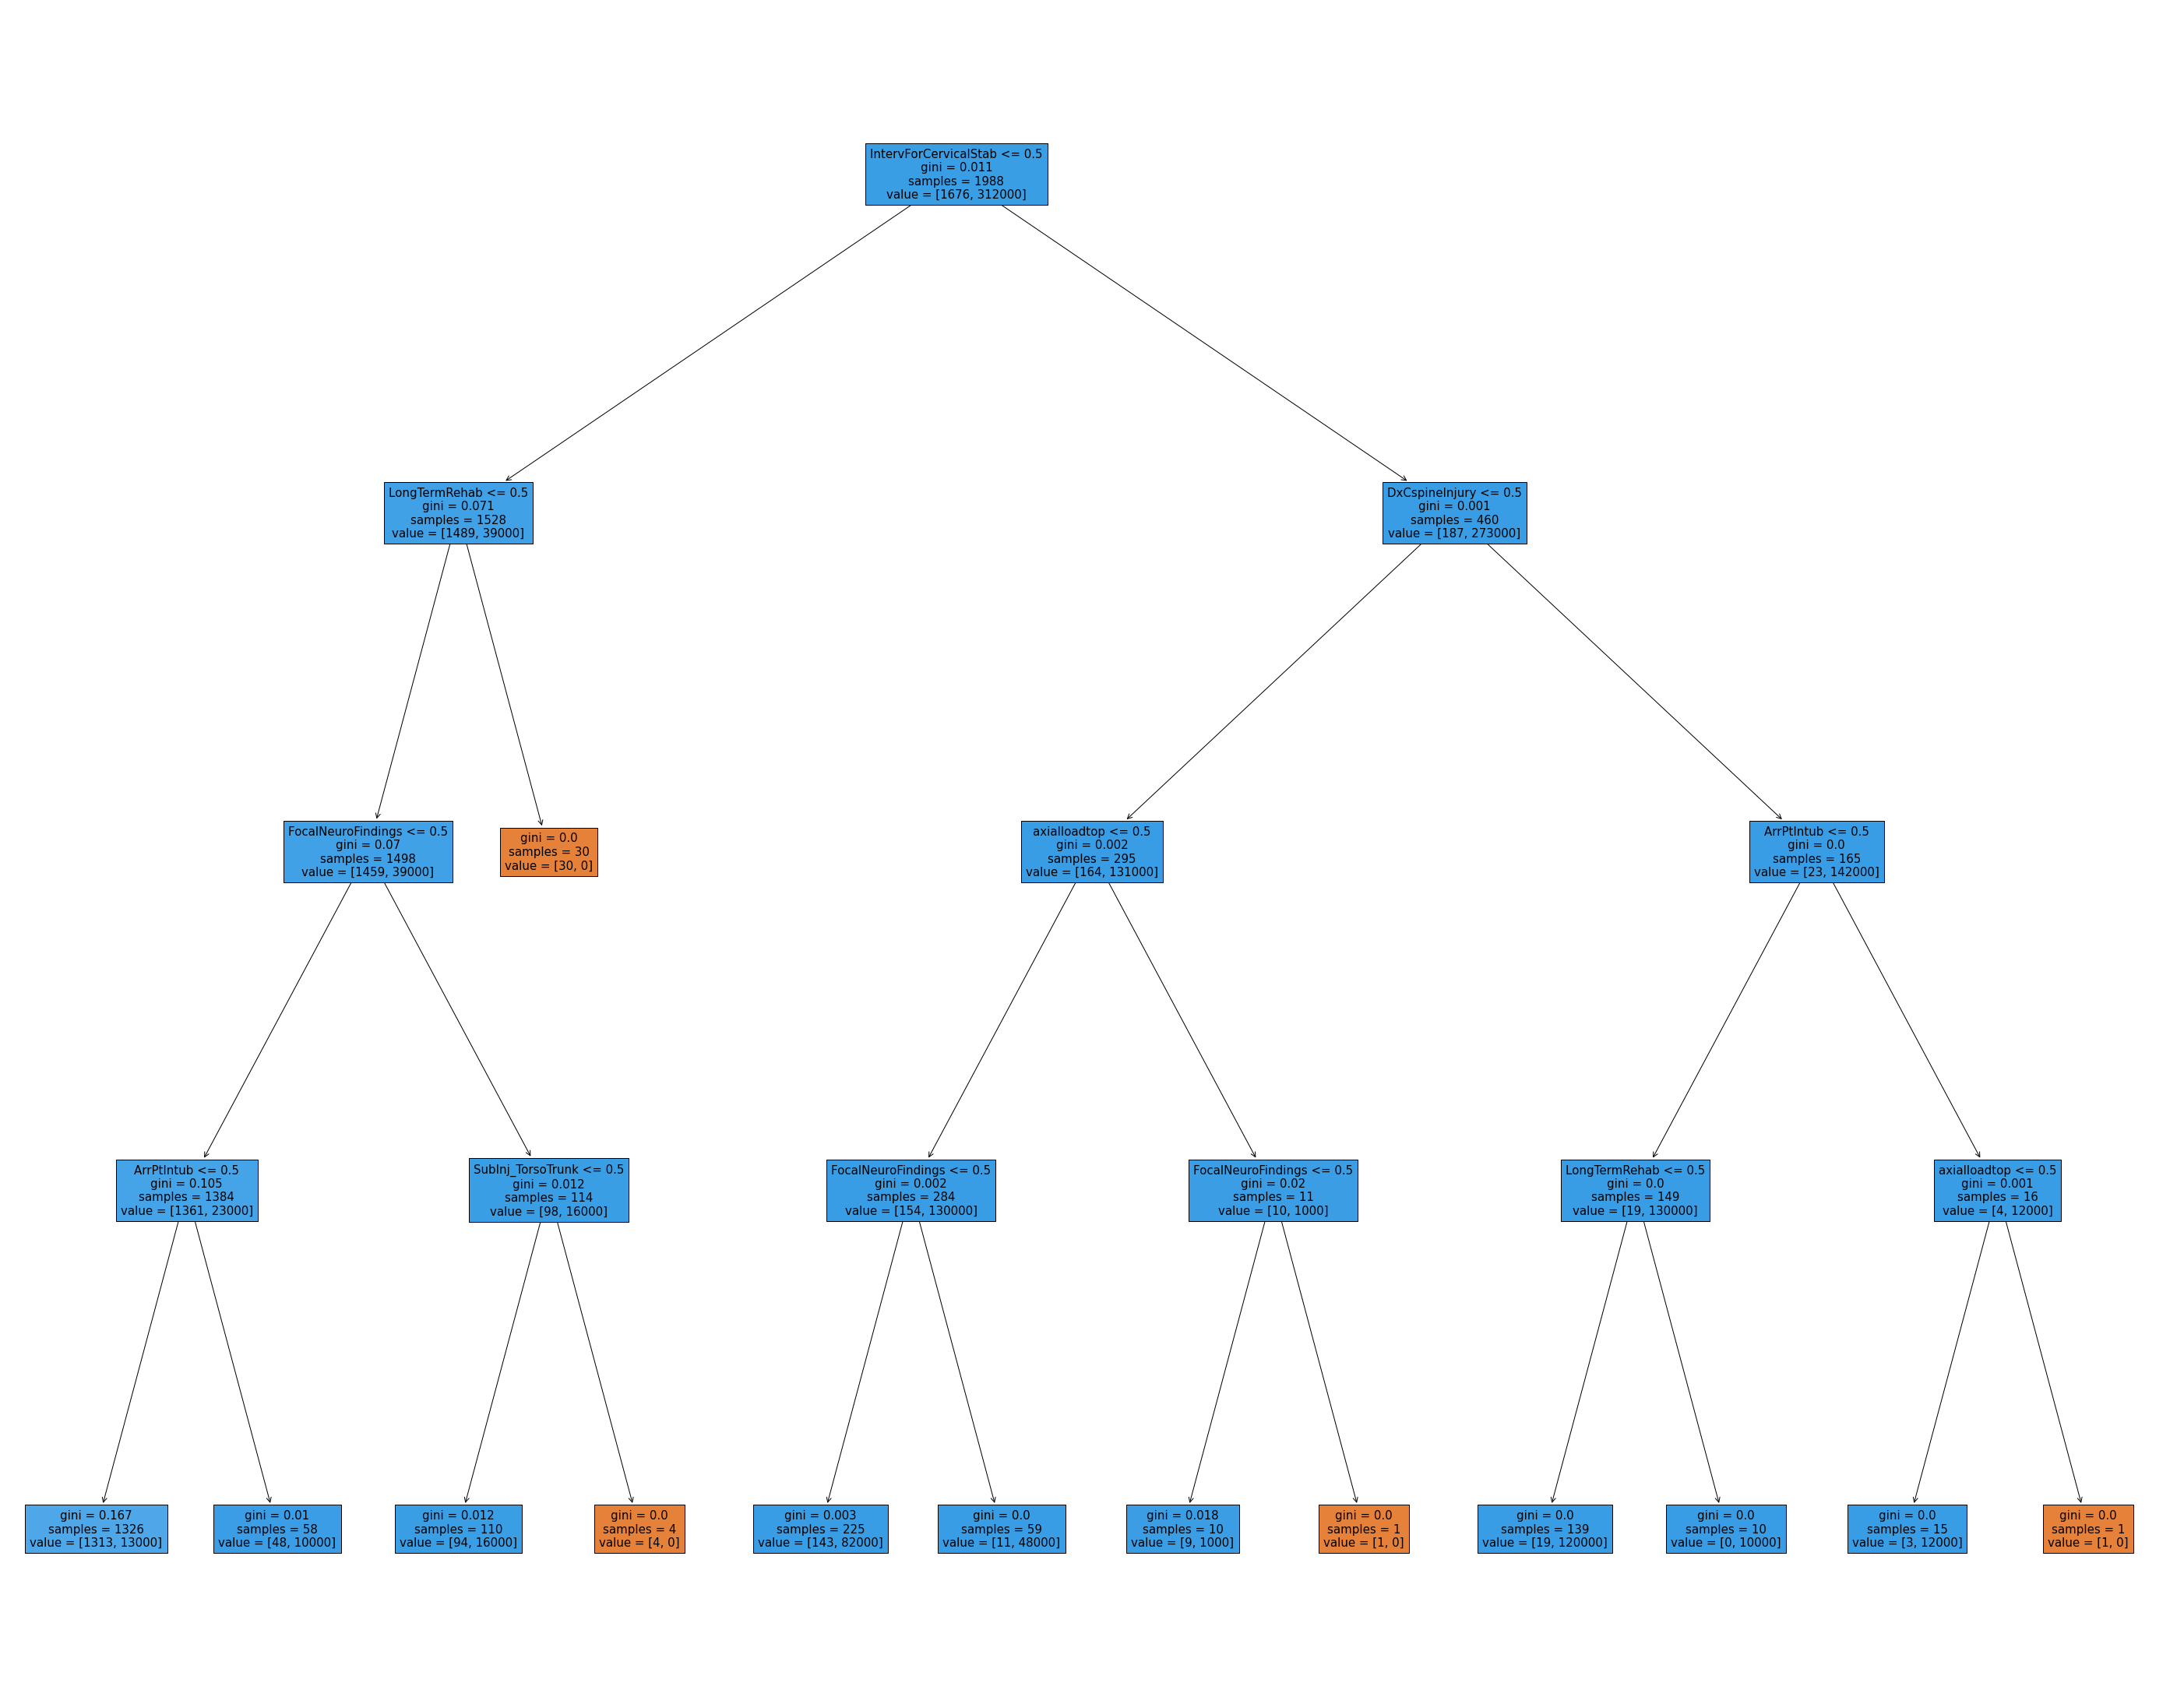

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

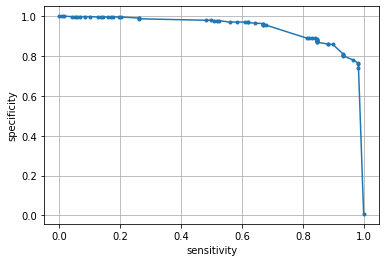

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

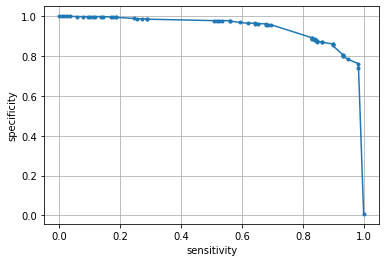

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

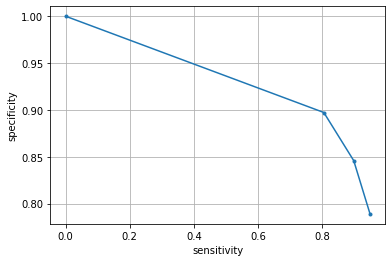

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

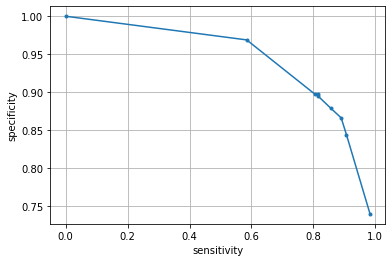

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

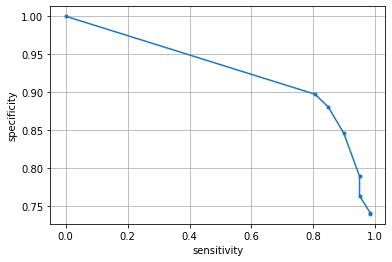

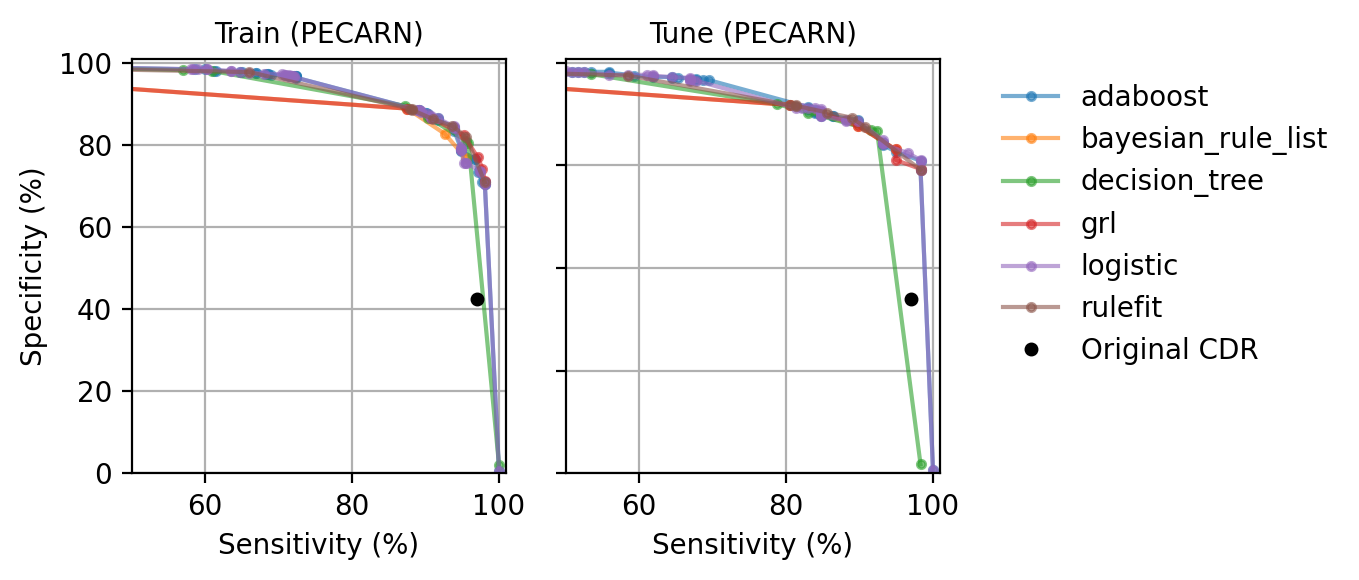


 _train
adaboost.pkl


100%|███████████████████████████████████████████████████| 79/79 [00:00<00:00, 3115.77it/s]


bayesian_rule_list.pkl


100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1969.62it/s]


decision_tree.pkl


100%|███████████████████████████████████████████████████| 10/10 [00:00<00:00, 2195.40it/s]


grl.pkl


100%|█████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2227.16it/s]


logistic.pkl


100%|███████████████████████████████████████████████████| 79/79 [00:00<00:00, 3158.36it/s]


rulefit.pkl


100%|█████████████████████████████████████████████████████| 9/9 [00:00<00:00, 1980.63it/s]



 _tune
adaboost.pkl


100%|███████████████████████████████████████████████████| 60/60 [00:00<00:00, 3919.06it/s]


bayesian_rule_list.pkl


100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1770.68it/s]


decision_tree.pkl


100%|███████████████████████████████████████████████████| 10/10 [00:00<00:00, 2076.39it/s]


grl.pkl


100%|█████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1881.80it/s]

logistic.pkl

100%|███████████████████████████████████████████████████| 60/60 [00:00<00:00, 3704.34it/s]


rulefit.pkl


100%|█████████████████████████████████████████████████████| 9/9 [00:00<00:00, 2261.76it/s]



<< 3 >>
(1988, 45) (663, 45) (663, 45)
( 3 ) set X and y...
( 3 ) fit simple models...
decision_tree


100%|███████████████████████████████████████████████████| 11/11 [00:00<00:00, 2455.94it/s]


logistic


100%|███████████████████████████████████████████████████| 56/56 [00:00<00:00, 3597.61it/s]

adaboost



/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-vetting/rulevetting/api/validation_new.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
100%|███████████████████████████████████████████████████| 56/56 [00:00<00:00, 3992.33it/s]


( 3 ) fit other models...
bayesian_rule_list
Trained RuleListClassifier for detecting IwI
IF IntervForCervicalStab > 0.5 THEN probability of IwI: 58.5% (54.0%-62.9%)
ELSE IF FocalNeuroFindings > 0.5 THEN probability of IwI: 16.1% (9.9%-23.4%)
ELSE IF DxCspineInjury > 0.5 THEN probability of IwI: 12.0% (6.6%-18.8%)
ELSE probability of IwI: 1.5% (0.9%-2.2%)



100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2128.55it/s]

rulefit


                                                                                                           rule  \
10                                                       HighriskDiving <= 0.5 and IntervForCervicalStab <= 0.5   
9                                                         IntervForCervicalStab <= 0.5 and PtSensoryLoss <= 0.5   
11  ArrPtIntub <= 0.5 and HighriskDiving <= 0.5 and IntervForCervicalStab <= 0.5 and PtExtremityWeakness <= 0.5   

    coef  
10 -0.09  
9  -0.08  
11 -0.07  


100%|█████████████████████████████████████████████████████| 6/6 [00:00<00:00, 1847.71it/s]
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


grl
mean 0.16 (1988 pts)
if IntervForCervicalStab >= 1.0 then 0.585 (465 pts)
mean 0.031 (1523 pts)
if feat 7 >= 1.0 then 0.256 (43 pts)
mean 0.024 (1480 pts)
if feat 0 >= 1.0 then 0.167 (78 pts)
mean 0.016 (1402 pts)
if feat 3 >= 1.0 then 0.5 (4 pts)
mean 0.015 (1398 pts)
if feat 1 >= 1.0 then 0.074 (95 pts)
mean 0.011 (1303 pts)
if feat 6 >= 1.0 then 0.118 (17 pts)
mean 0.009 (1286 pts)
if feat 8 >= 1.0 then 0.039 (51 pts)
mean 0.008 (1235 pts)
if feat 2 >= 1.0 then 0.028 (36 pts)
mean 0.008 (1199 pts)
if feat 4 >= 1.0 then 0.014 (147 pts)



100%|█████████████████████████████████████████████████████| 9/9 [00:00<00:00, 1993.28it/s]

( 3 ) observe all the results...


<Figure size 432x288 with 0 Axes>

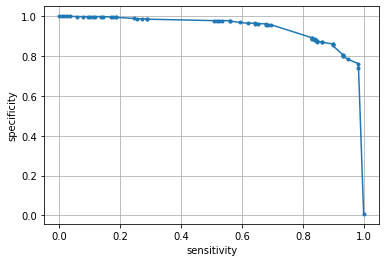

<Figure size 432x288 with 0 Axes>

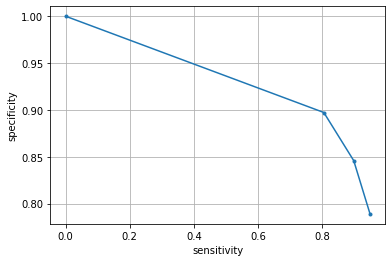

<Figure size 432x288 with 0 Axes>

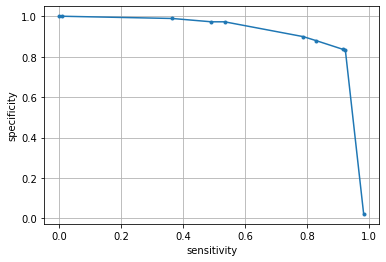

<Figure size 432x288 with 0 Axes>

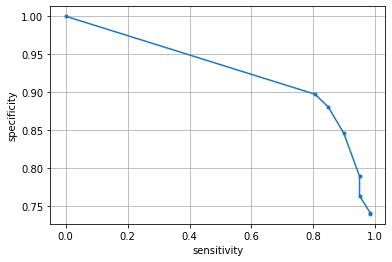

<Figure size 432x288 with 0 Axes>

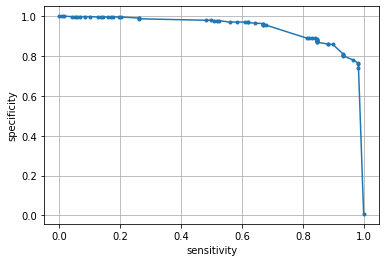

<Figure size 432x288 with 0 Axes>

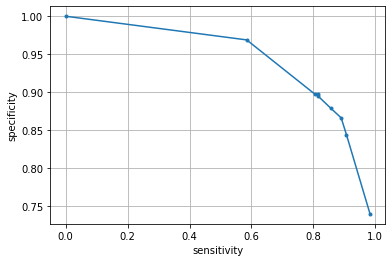

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

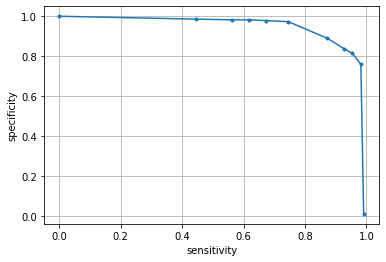

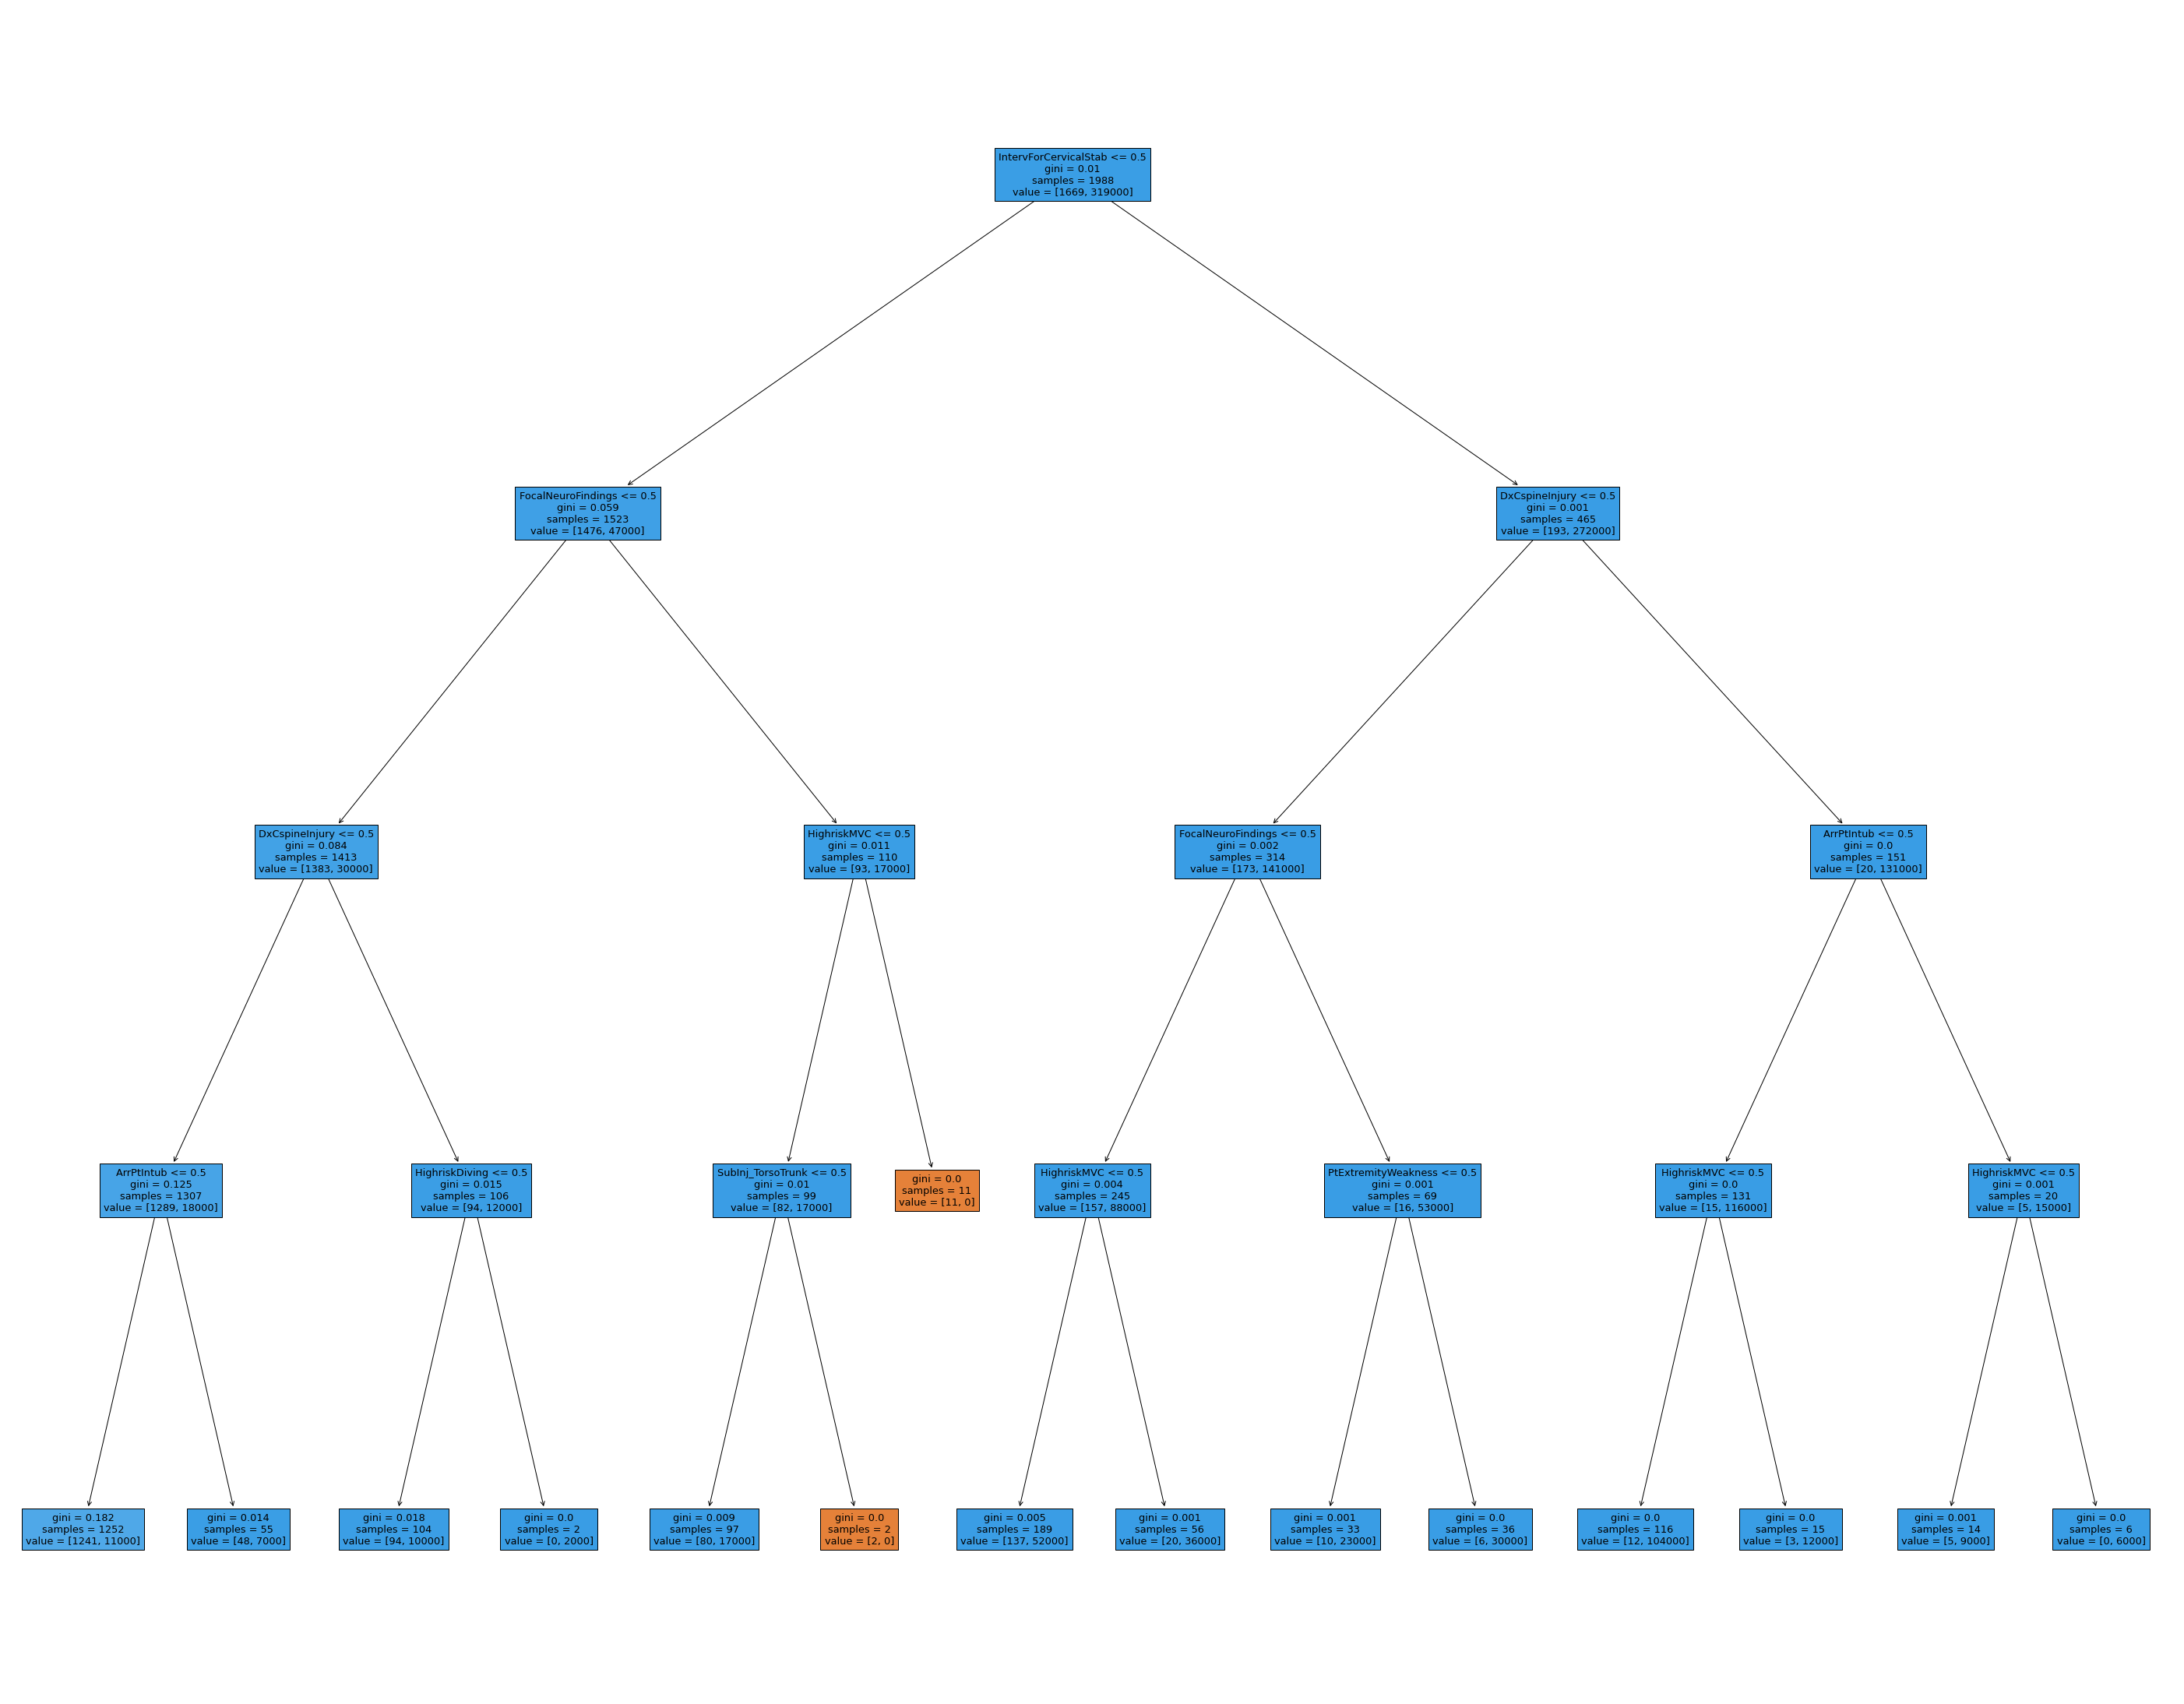

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

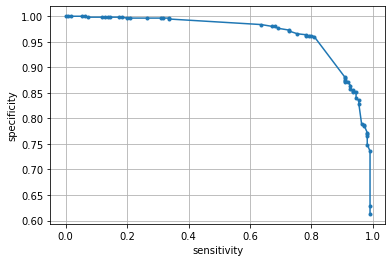

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

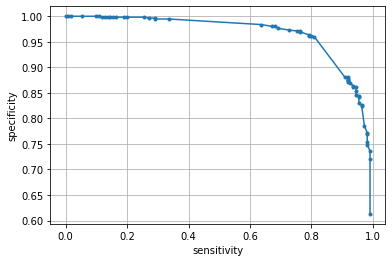

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

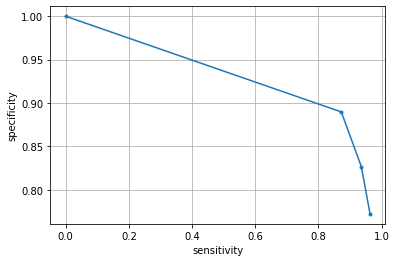

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

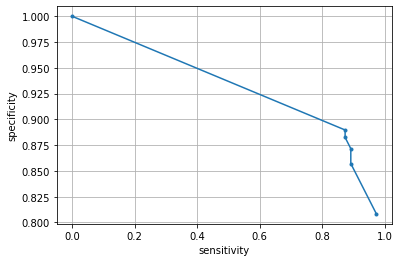

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

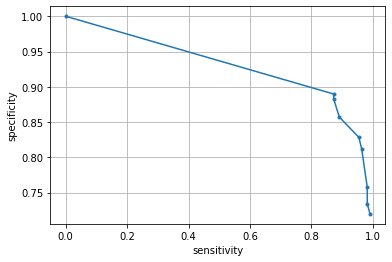

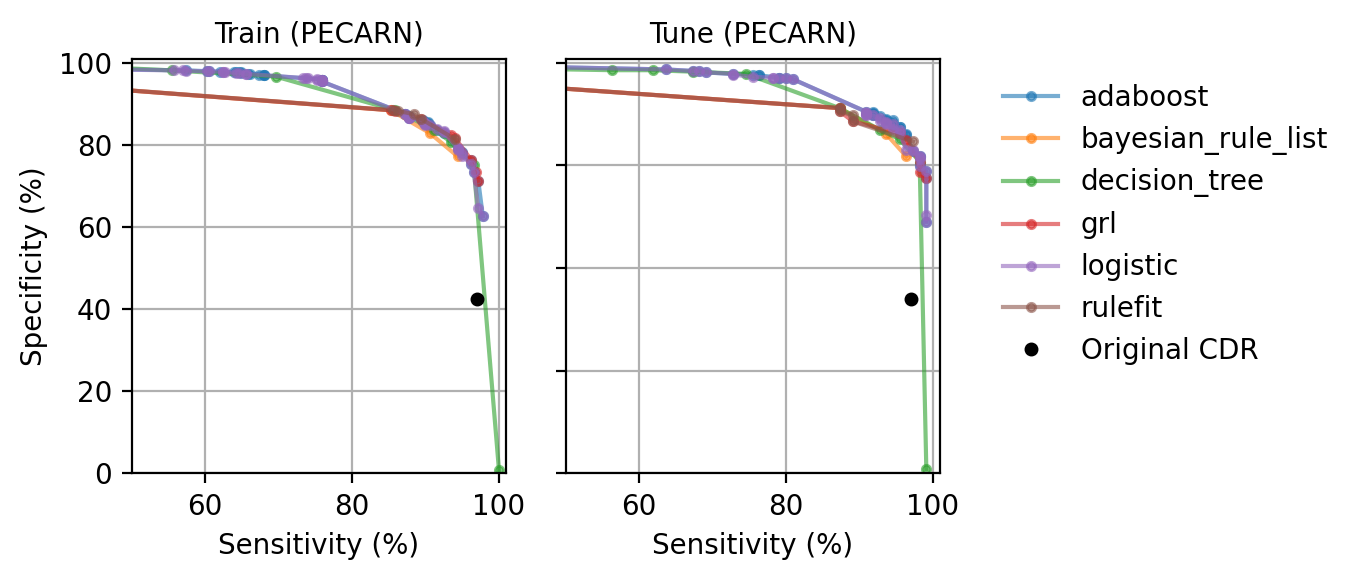


 _train
adaboost.pkl


100%|███████████████████████████████████████████████████| 84/84 [00:00<00:00, 3182.55it/s]


bayesian_rule_list.pkl


100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1926.87it/s]


decision_tree.pkl


100%|███████████████████████████████████████████████████| 12/12 [00:00<00:00, 2473.79it/s]


grl.pkl


100%|█████████████████████████████████████████████████████| 9/9 [00:00<00:00, 2222.87it/s]


logistic.pkl


100%|███████████████████████████████████████████████████| 84/84 [00:00<00:00, 3171.81it/s]


rulefit.pkl


100%|█████████████████████████████████████████████████████| 6/6 [00:00<00:00, 1873.29it/s]



 _tune
adaboost.pkl


100%|███████████████████████████████████████████████████| 56/56 [00:00<00:00, 3885.67it/s]


bayesian_rule_list.pkl


100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2083.35it/s]


decision_tree.pkl


100%|███████████████████████████████████████████████████| 11/11 [00:00<00:00, 2132.14it/s]


grl.pkl


100%|█████████████████████████████████████████████████████| 9/9 [00:00<00:00, 2005.67it/s]


logistic.pkl


100%|███████████████████████████████████████████████████| 56/56 [00:00<00:00, 3668.30it/s]


rulefit.pkl


100%|█████████████████████████████████████████████████████| 6/6 [00:00<00:00, 1560.09it/s]



<< 4 >>
(1988, 45) (663, 45) (663, 45)
( 4 ) set X and y...
( 4 ) fit simple models...
decision_tree


100%|███████████████████████████████████████████████████| 11/11 [00:00<00:00, 2154.24it/s]


logistic


100%|███████████████████████████████████████████████████| 45/45 [00:00<00:00, 3579.64it/s]

adaboost



/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-vetting/rulevetting/api/validation_new.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
100%|███████████████████████████████████████████████████| 45/45 [00:00<00:00, 3835.08it/s]


( 4 ) fit other models...
bayesian_rule_list
Trained RuleListClassifier for detecting IwI
IF IntervForCervicalStab > 0.5 THEN probability of IwI: 60.4% (55.9%-64.9%)
ELSE IF FocalNeuroFindings > 0.5 THEN probability of IwI: 20.5% (13.7%-28.3%)
ELSE IF DxCspineInjury > 0.5 THEN probability of IwI: 12.5% (6.9%-19.5%)
ELSE probability of IwI: 1.2% (0.7%-1.9%)



100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2123.43it/s]

rulefit


                                                                                 rule  \
11    HighriskDiving <= 0.5 and IntervForCervicalStab <= 0.5 and PtSensoryLoss <= 0.5   
9                         IntervForCervicalStab <= 0.5 and PtExtremityWeakness <= 0.5   
10  ArrPtIntub <= 0.5 and IntervForCervicalStab <= 0.5 and PtExtremityWeakness <= 0.5   
12  ArrPtIntub <= 0.5 and IntervForCervicalStab <= 0.5 and PtExtremityWeakness <= 0.5   

    coef  
11 -0.11  
9  -0.02  
10 -0.07  
12 -0.00  


100%|█████████████████████████████████████████████████████| 5/5 [00:00<00:00, 1987.45it/s]
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


grl
mean 0.164 (1988 pts)
if IntervForCervicalStab >= 1.0 then 0.605 (458 pts)
mean 0.033 (1530 pts)
if feat 6 >= 1.0 then 0.294 (51 pts)
mean 0.024 (1479 pts)
if feat 0 >= 1.0 then 0.186 (70 pts)
mean 0.016 (1409 pts)
if feat 3 >= 1.0 then 0.4 (5 pts)
mean 0.014 (1404 pts)
if feat 1 >= 1.0 then 0.067 (90 pts)
mean 0.011 (1314 pts)
if feat 2 >= 1.0 then 0.083 (48 pts)
mean 0.008 (1266 pts)
if feat 4 >= 1.0 then 0.008 (1209 pts)
mean 0 (57 pts)



100%|█████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1851.48it/s]

( 4 ) observe all the results...


<Figure size 432x288 with 0 Axes>

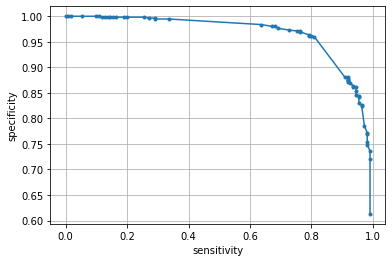

<Figure size 432x288 with 0 Axes>

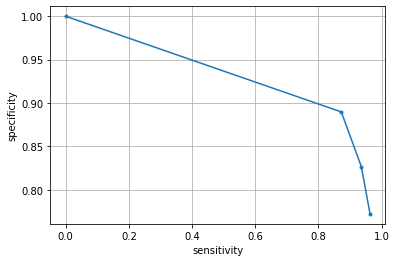

<Figure size 432x288 with 0 Axes>

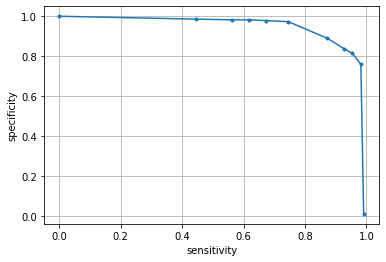

<Figure size 432x288 with 0 Axes>

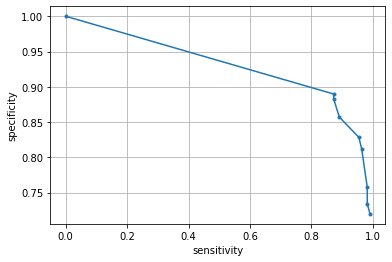

<Figure size 432x288 with 0 Axes>

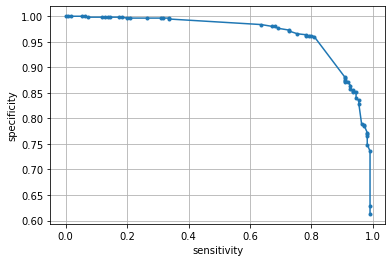

<Figure size 432x288 with 0 Axes>

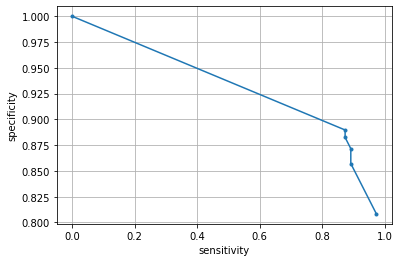

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

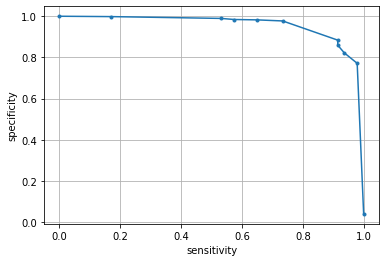

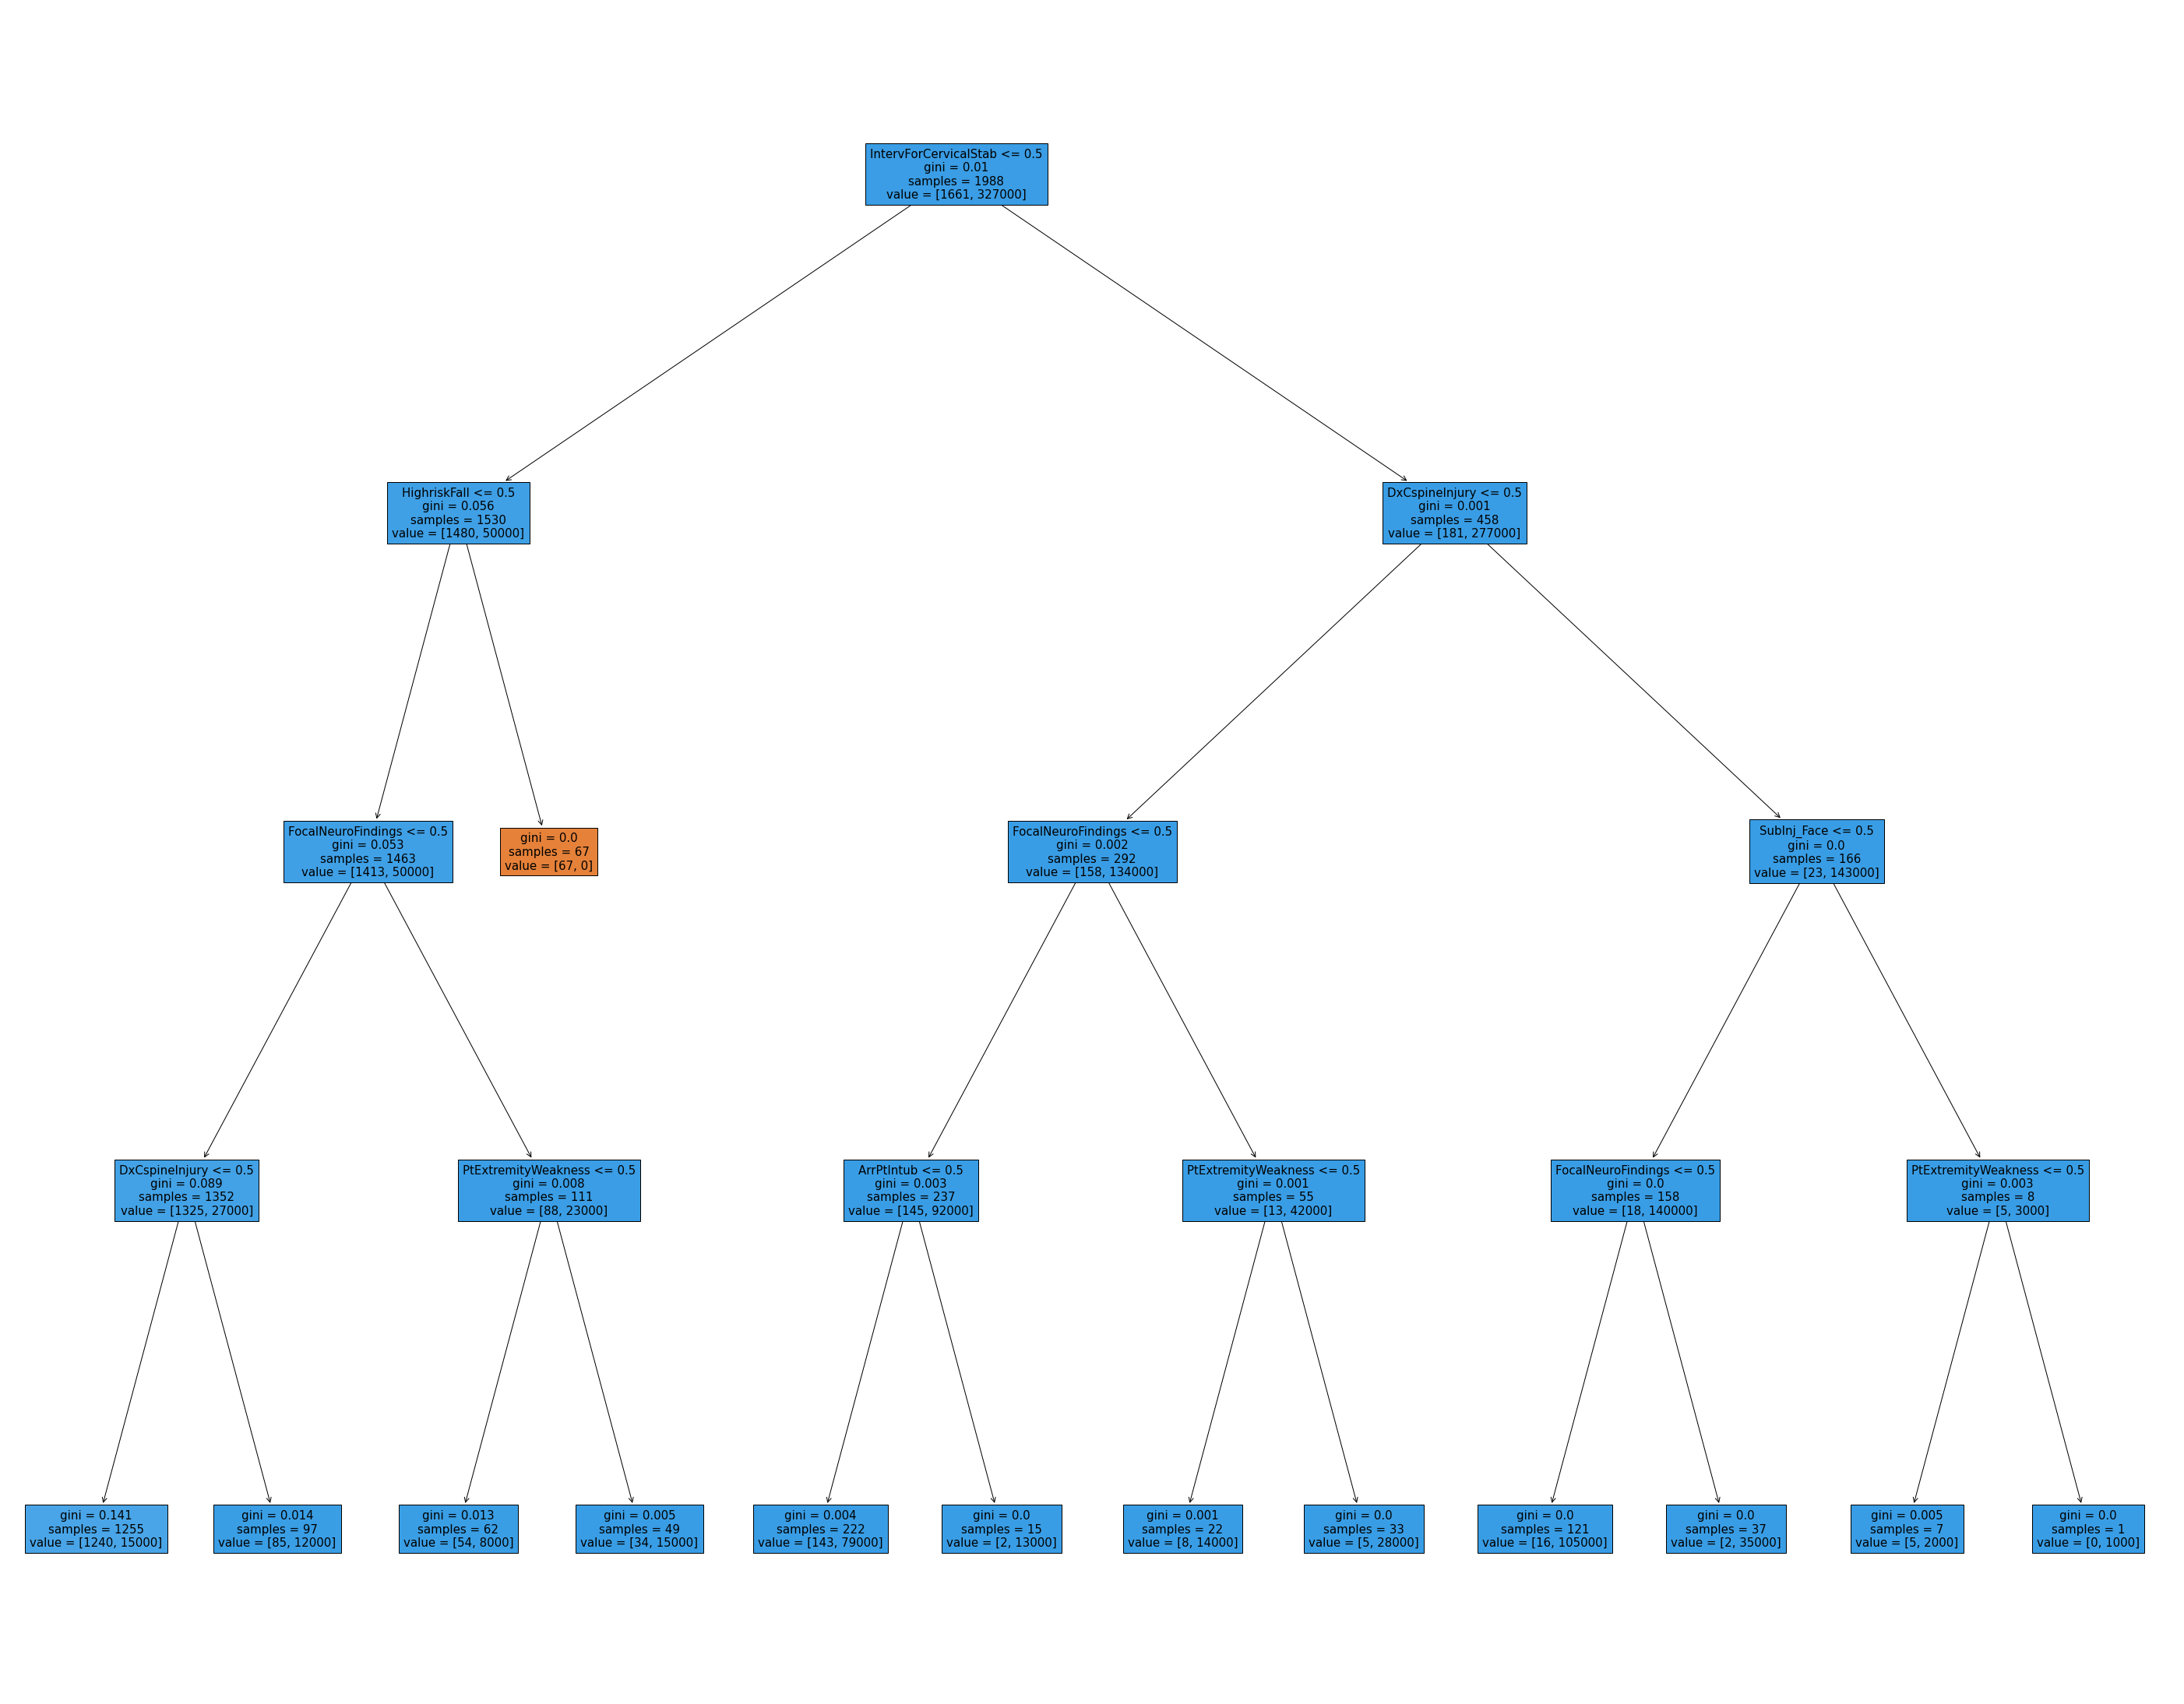

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

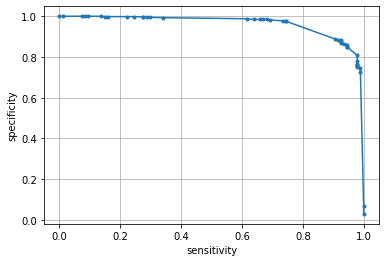

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

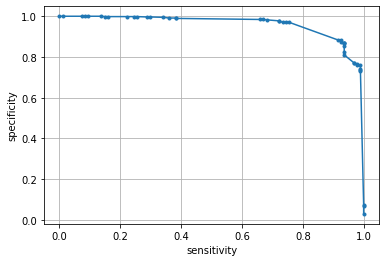

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

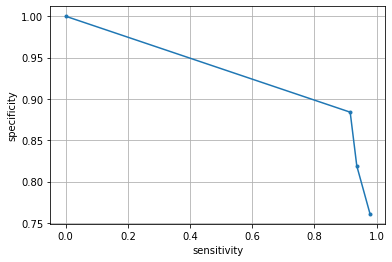

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

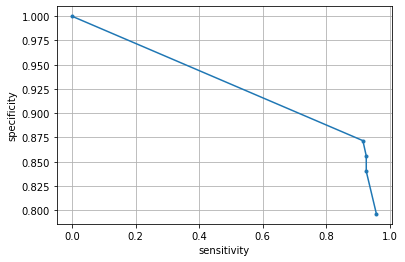

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

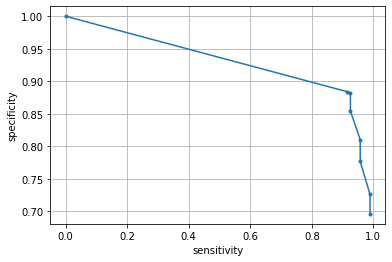

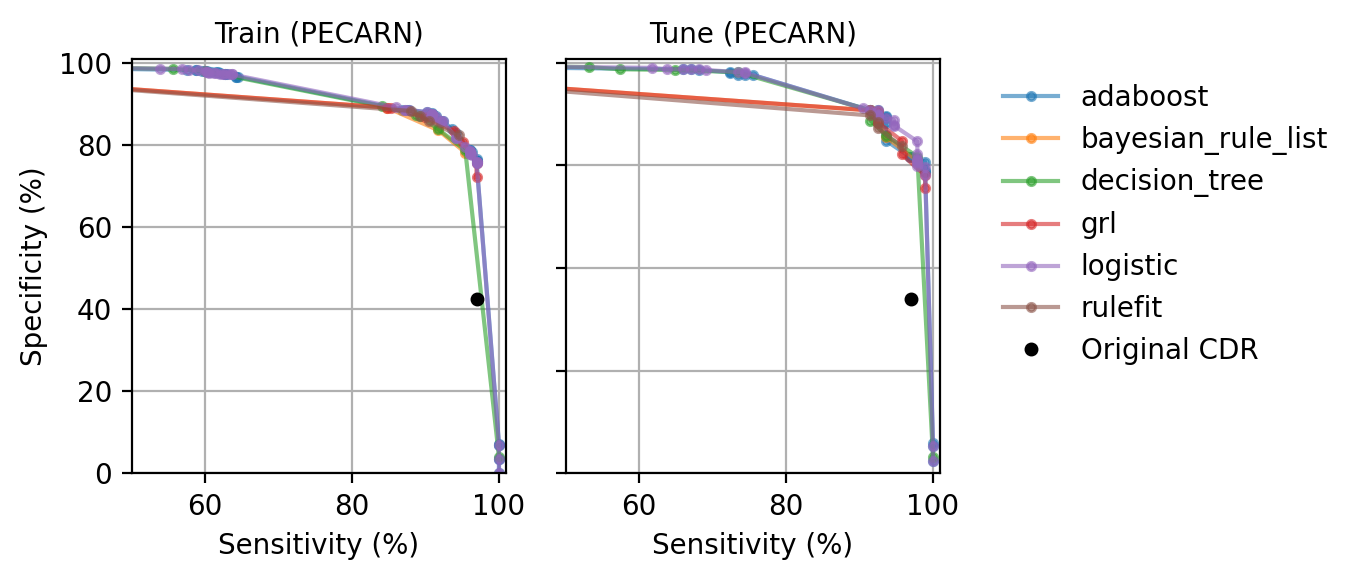


 _train
adaboost.pkl


100%|███████████████████████████████████████████████████| 67/67 [00:00<00:00, 3102.40it/s]


bayesian_rule_list.pkl


100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1921.35it/s]


decision_tree.pkl


100%|███████████████████████████████████████████████████| 13/13 [00:00<00:00, 2505.33it/s]


grl.pkl


100%|█████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2075.87it/s]


logistic.pkl


100%|███████████████████████████████████████████████████| 67/67 [00:00<00:00, 3018.42it/s]


rulefit.pkl


100%|█████████████████████████████████████████████████████| 5/5 [00:00<00:00, 1779.36it/s]



 _tune
adaboost.pkl


100%|███████████████████████████████████████████████████| 45/45 [00:00<00:00, 3742.17it/s]


bayesian_rule_list.pkl


100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1903.69it/s]


decision_tree.pkl


100%|███████████████████████████████████████████████████| 11/11 [00:00<00:00, 2710.61it/s]


grl.pkl


100%|█████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1834.38it/s]

logistic.pkl

100%|███████████████████████████████████████████████████| 45/45 [00:00<00:00, 3343.50it/s]


rulefit.pkl


100%|█████████████████████████████████████████████████████| 5/5 [00:00<00:00, 1558.18it/s]



<< 5 >>
(1988, 45) (663, 45) (663, 45)
( 5 ) set X and y...
( 5 ) fit simple models...
decision_tree


100%|███████████████████████████████████████████████████| 10/10 [00:00<00:00, 2573.35it/s]


logistic


100%|███████████████████████████████████████████████████| 44/44 [00:00<00:00, 3591.22it/s]

adaboost



/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-vetting/rulevetting/api/validation_new.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
100%|███████████████████████████████████████████████████| 44/44 [00:00<00:00, 3675.26it/s]


( 5 ) fit other models...
bayesian_rule_list
Trained RuleListClassifier for detecting IwI
IF IntervForCervicalStab > 0.5 THEN probability of IwI: 59.9% (55.5%-64.3%)
ELSE IF DxCspineInjury > 0.5 THEN probability of IwI: 16.4% (10.4%-23.4%)
ELSE IF FocalNeuroFindings > 0.5 THEN probability of IwI: 14.7% (8.6%-22.2%)
ELSE probability of IwI: 1.1% (0.6%-1.7%)



100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1875.39it/s]

rulefit


                                                                           rule  \
9                   IntervForCervicalStab <= 0.5 and PtExtremityWeakness <= 0.5   
10  ArrPtIntub <= 0.5 and IntervForCervicalStab <= 0.5 and PtSensoryLoss <= 0.5   

    coef  
9  -0.02  
10 -0.05  


100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1932.41it/s]
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


grl
mean 0.165 (1988 pts)
if IntervForCervicalStab >= 1.0 then 0.6 (472 pts)
mean 0.03 (1516 pts)
if feat 0 >= 1.0 then 0.2 (80 pts)
mean 0.021 (1436 pts)
if feat 7 >= 1.0 then 0.217 (46 pts)
mean 0.014 (1390 pts)
if feat 1 >= 1.0 then 0.115 (96 pts)
mean 0.007 (1294 pts)
if feat 2 >= 1.0 then 0.059 (51 pts)
mean 0.005 (1243 pts)
if feat 8 >= 1.0 then 0.024 (41 pts)
mean 0.004 (1202 pts)
if feat 3 >= 1.0 then 0.004 (1198 pts)
mean 0 (4 pts)



100%|█████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2032.00it/s]

( 5 ) observe all the results...


<Figure size 432x288 with 0 Axes>

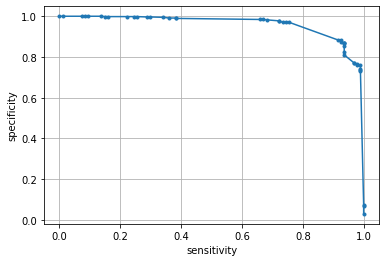

<Figure size 432x288 with 0 Axes>

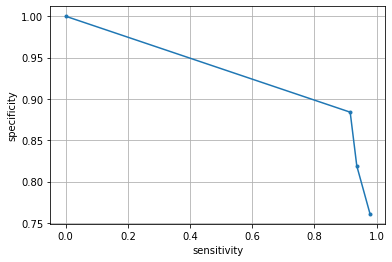

<Figure size 432x288 with 0 Axes>

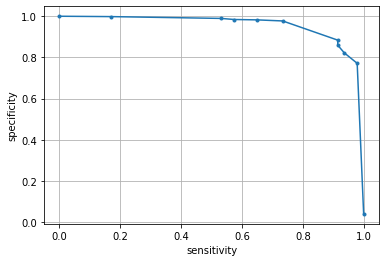

<Figure size 432x288 with 0 Axes>

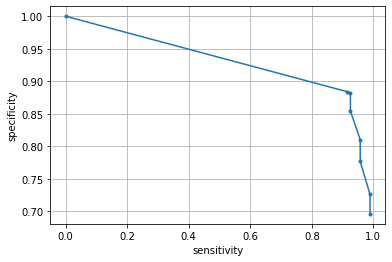

<Figure size 432x288 with 0 Axes>

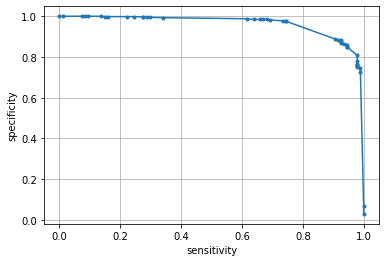

<Figure size 432x288 with 0 Axes>

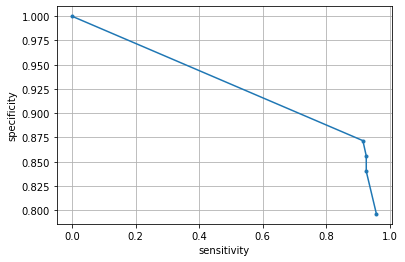

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

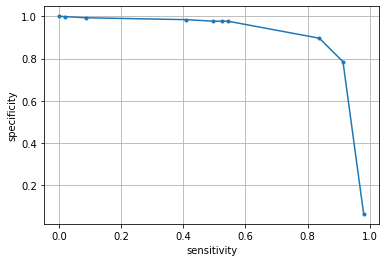

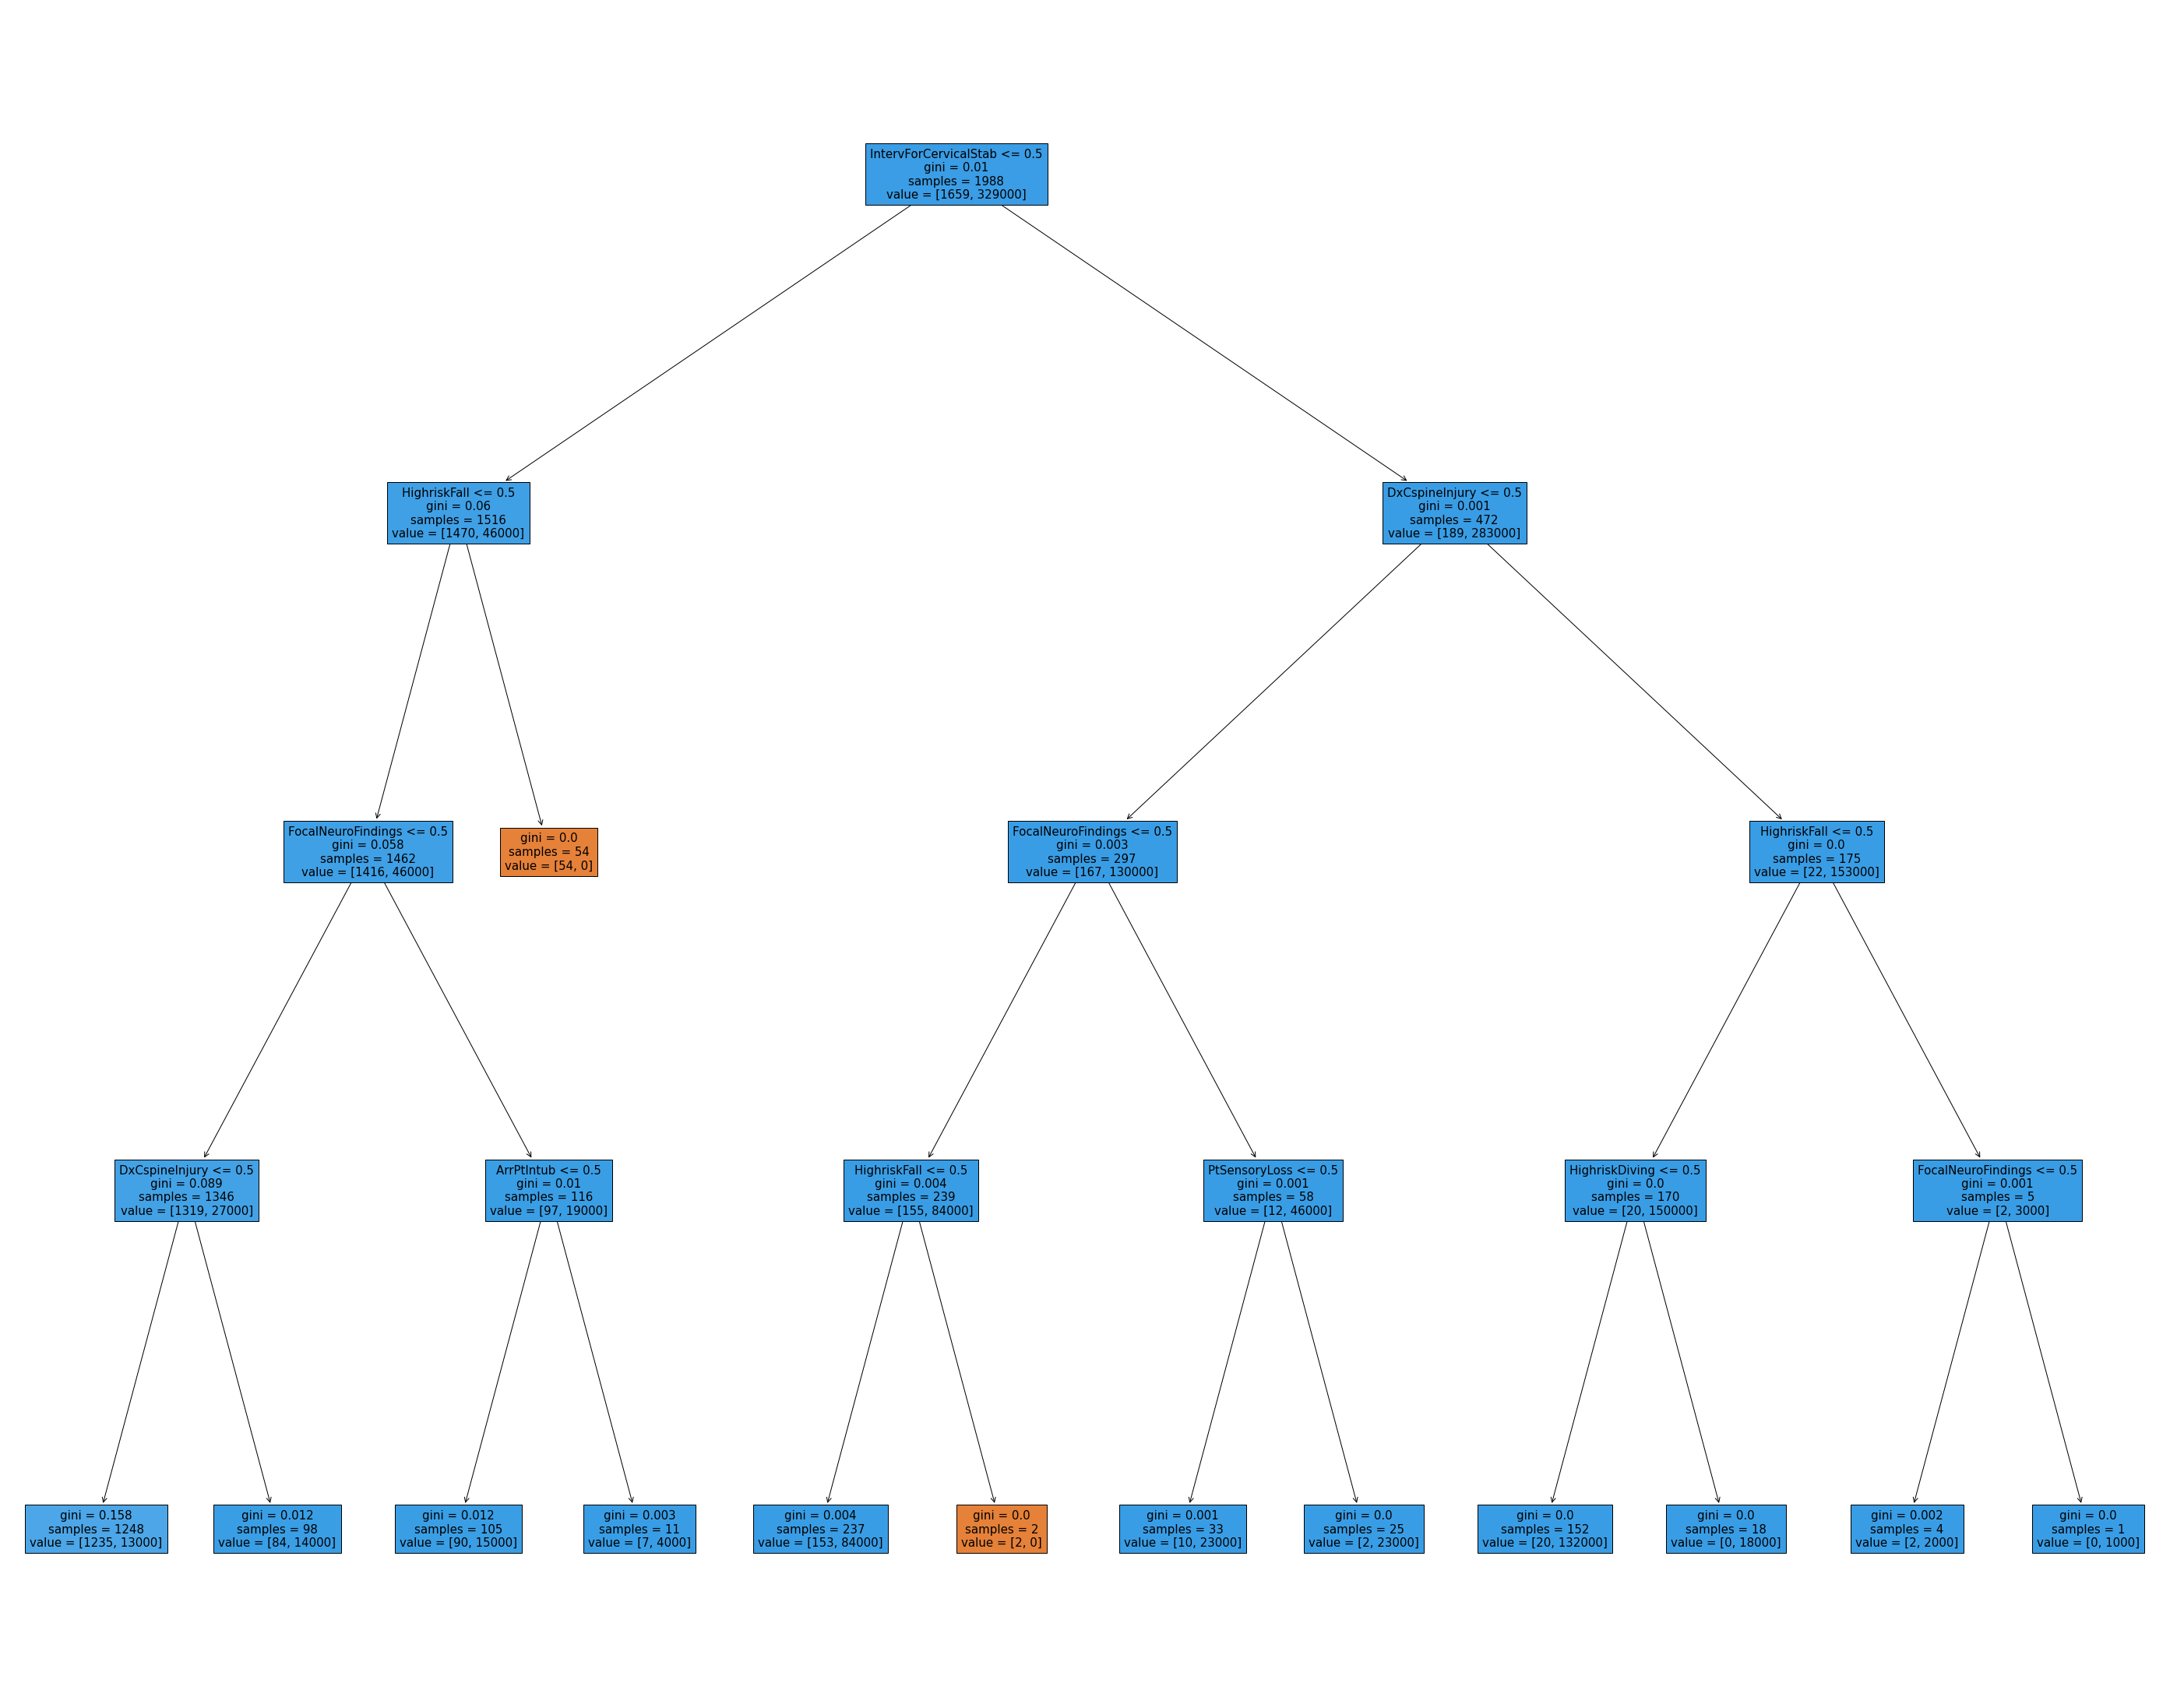

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

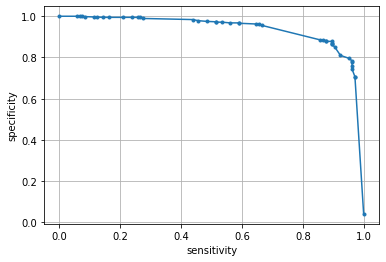

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

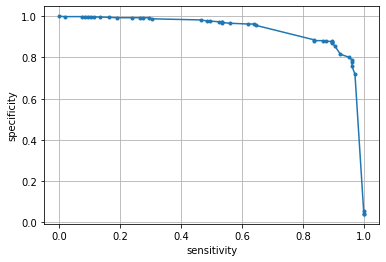

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

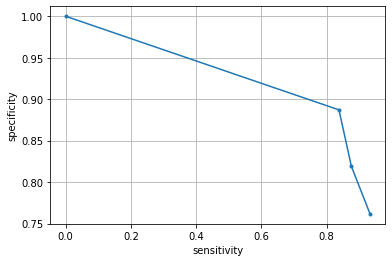

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

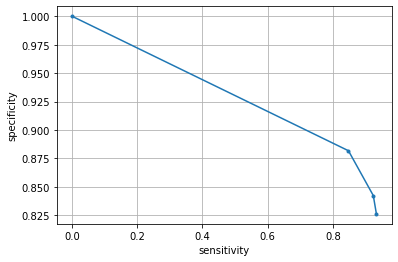

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

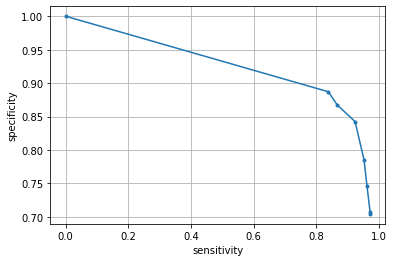

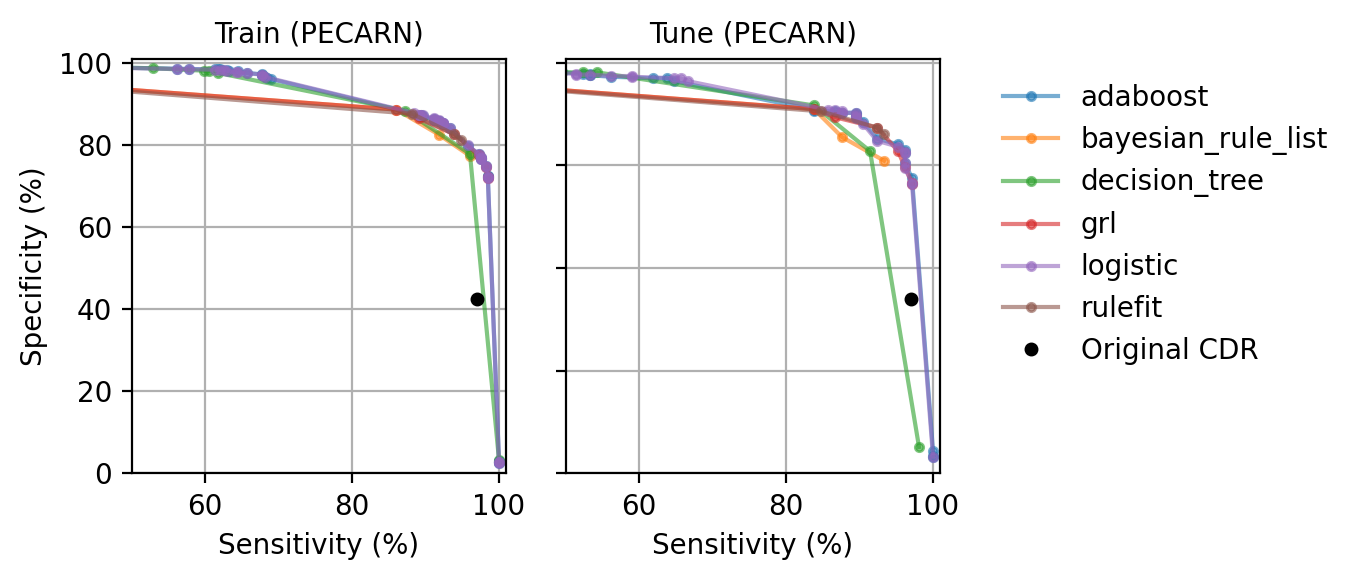


 _train
adaboost.pkl


100%|███████████████████████████████████████████████████| 65/65 [00:00<00:00, 3020.43it/s]


bayesian_rule_list.pkl


100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1587.85it/s]


decision_tree.pkl


100%|███████████████████████████████████████████████████| 10/10 [00:00<00:00, 2001.19it/s]


grl.pkl


100%|█████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2075.75it/s]


logistic.pkl


100%|███████████████████████████████████████████████████| 65/65 [00:00<00:00, 2950.38it/s]


rulefit.pkl


100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1556.47it/s]



 _tune
adaboost.pkl


100%|███████████████████████████████████████████████████| 44/44 [00:00<00:00, 3651.77it/s]


bayesian_rule_list.pkl


100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1652.93it/s]


decision_tree.pkl


100%|███████████████████████████████████████████████████| 10/10 [00:00<00:00, 2298.37it/s]


grl.pkl


100%|█████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1880.12it/s]

logistic.pkl



100%|███████████████████████████████████████████████████| 44/44 [00:00<00:00, 3266.71it/s]


rulefit.pkl


100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1200.17it/s]



<< 6 >>
(1988, 45) (663, 45) (663, 45)
( 6 ) set X and y...
( 6 ) fit simple models...
decision_tree


100%|███████████████████████████████████████████████████| 14/14 [00:00<00:00, 2356.54it/s]


logistic


100%|███████████████████████████████████████████████████| 53/53 [00:00<00:00, 3452.75it/s]

adaboost



/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-vetting/rulevetting/api/validation_new.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
100%|███████████████████████████████████████████████████| 53/53 [00:00<00:00, 3780.84it/s]


( 6 ) fit other models...
bayesian_rule_list
Trained RuleListClassifier for detecting IwI
IF IntervForCervicalStab > 0.5 THEN probability of IwI: 60.1% (55.6%-64.5%)
ELSE IF HighriskMVC > 0.5 THEN probability of IwI: 4.1% (1.8%-7.3%)
ELSE IF FocalNeuroFindings > 0.5 THEN probability of IwI: 16.5% (9.8%-24.5%)
ELSE IF DxCspineInjury > 0.5 THEN probability of IwI: 14.0% (7.7%-21.7%)
ELSE probability of IwI: 0.9% (0.4%-1.5%)



100%|█████████████████████████████████████████████████████| 5/5 [00:00<00:00, 1629.74it/s]

rulefit


                                                                               rule  \
9                            HighriskDiving <= 0.5 and IntervForCervicalStab <= 0.5   
11  HighriskDiving <= 0.5 and IntervForCervicalStab <= 0.5 and PtSensoryLoss <= 0.5   
12        ArrPtIntub <= 0.5 and DxCspineInjury <= 0.5 and FocalNeuroFindings <= 0.5   
10     ArrPtIntub <= 0.5 and HighriskDiving <= 0.5 and IntervForCervicalStab <= 0.5   

    coef  
9  -0.09  
11 -0.06  
12 -0.02  
10 -0.09  


100%|█████████████████████████████████████████████████████| 6/6 [00:00<00:00, 1826.92it/s]
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


grl
mean 0.161 (1988 pts)
if IntervForCervicalStab >= 1.0 then 0.602 (462 pts)
mean 0.028 (1526 pts)
if feat 0 >= 1.0 then 0.207 (82 pts)
mean 0.018 (1444 pts)
if feat 7 >= 1.0 then 0.184 (38 pts)
mean 0.014 (1406 pts)
if feat 3 >= 1.0 then 0.5 (2 pts)
mean 0.013 (1404 pts)
if feat 1 >= 1.0 then 0.065 (93 pts)
mean 0.009 (1311 pts)
if feat 2 >= 1.0 then 0.082 (49 pts)
mean 0.006 (1262 pts)
if feat 8 >= 1.0 then 0.051 (39 pts)
mean 0.005 (1223 pts)
if feat 4 >= 1.0 then 0.007 (150 pts)
mean 0.005 (1073 pts)
if feat 6 >= 1.0 then 0.005 (1065 pts)
mean 0 (8 pts)



100%|█████████████████████████████████████████████████████| 9/9 [00:00<00:00, 1892.83it/s]

( 6 ) observe all the results...


<Figure size 432x288 with 0 Axes>

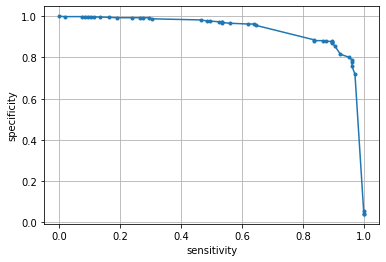

<Figure size 432x288 with 0 Axes>

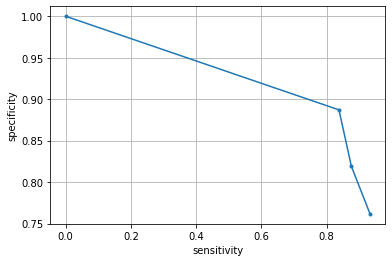

<Figure size 432x288 with 0 Axes>

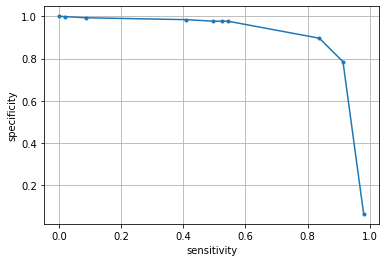

<Figure size 432x288 with 0 Axes>

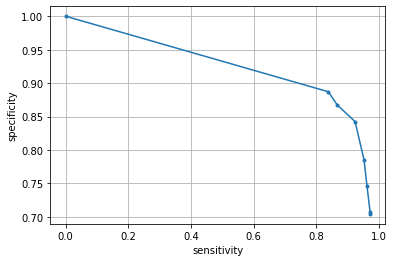

<Figure size 432x288 with 0 Axes>

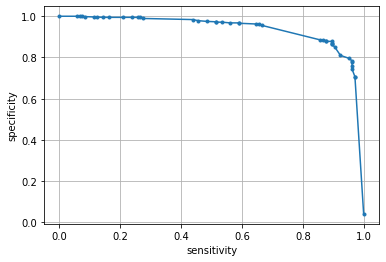

<Figure size 432x288 with 0 Axes>

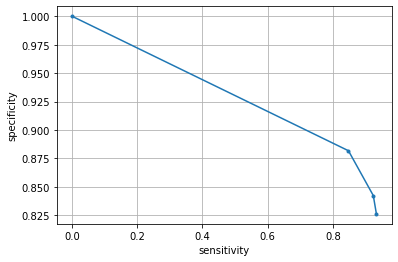

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

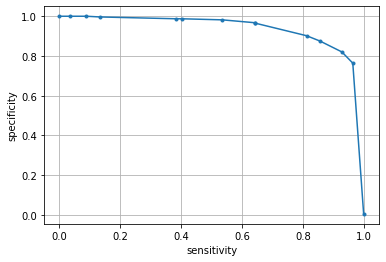

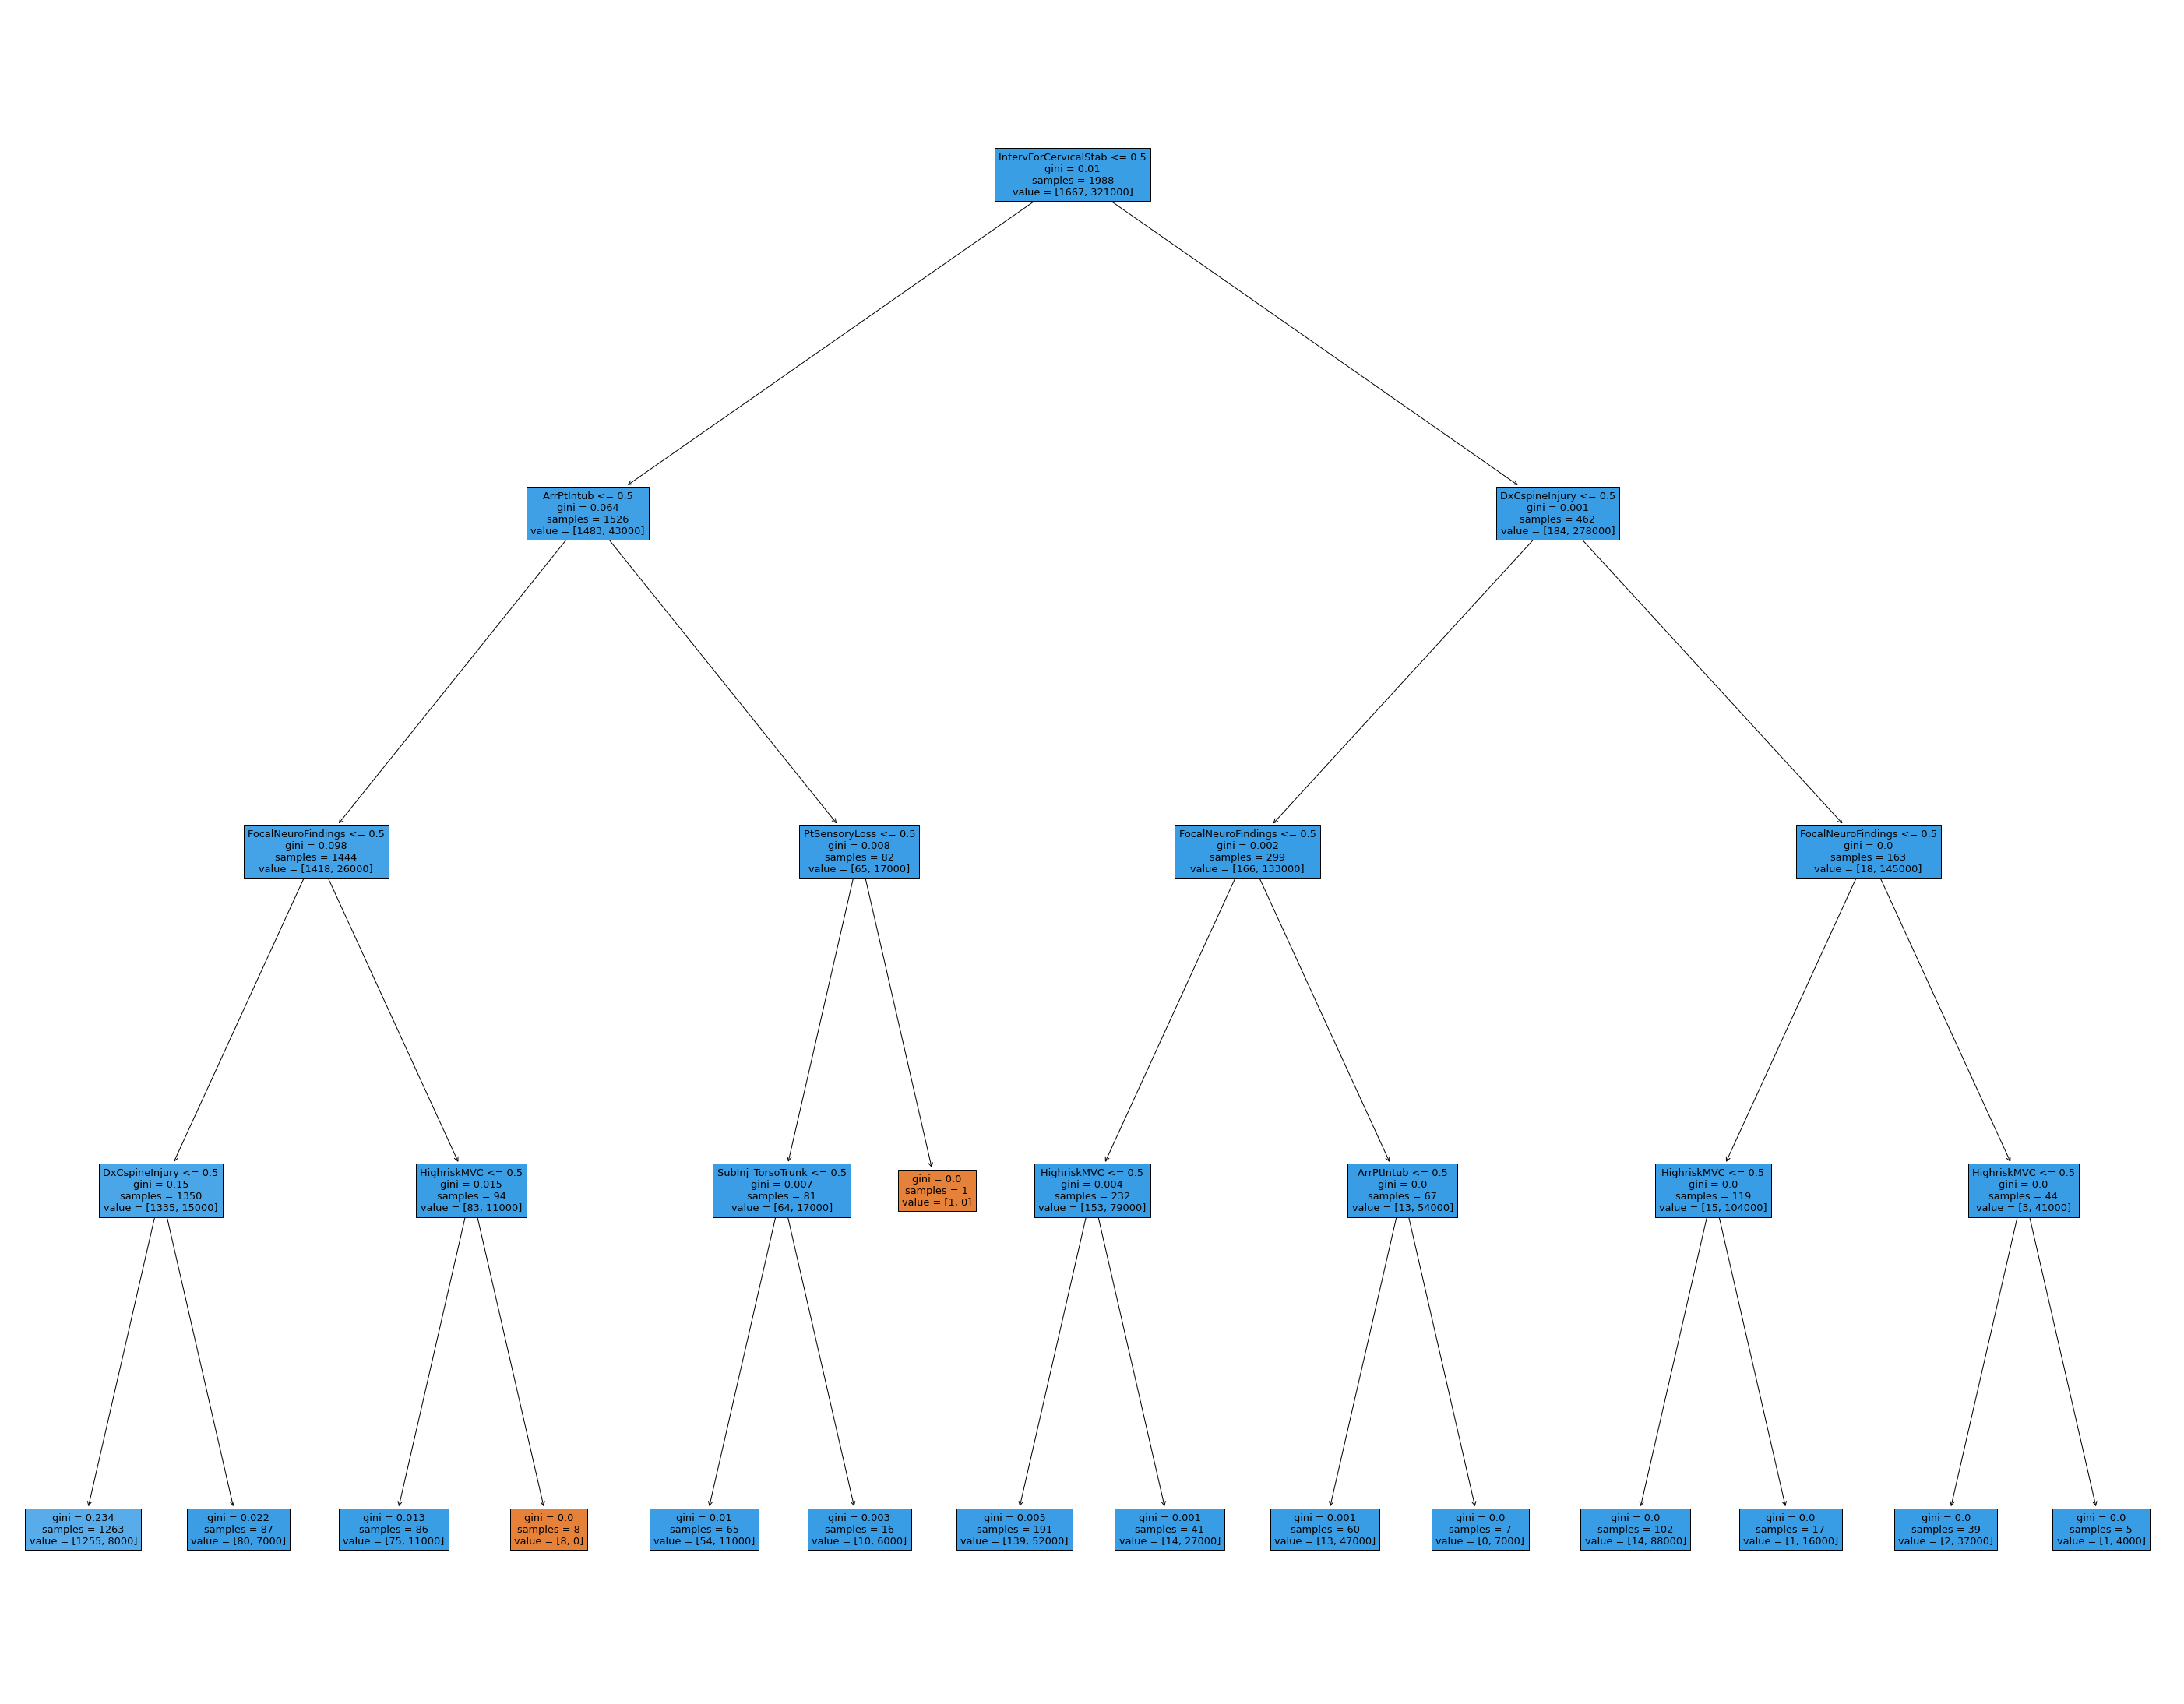

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

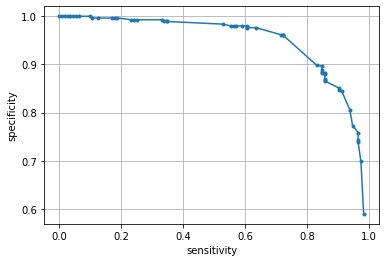

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

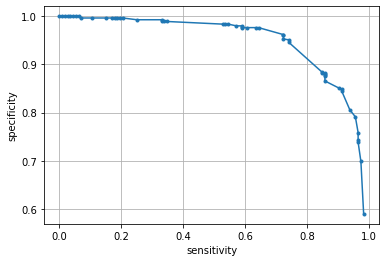

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

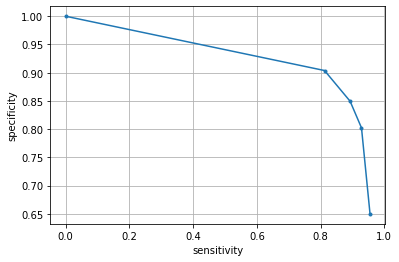

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

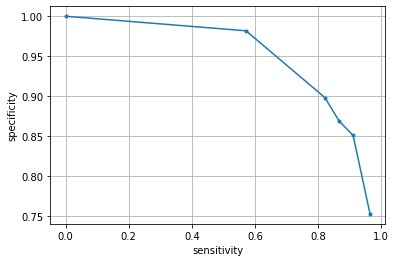

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

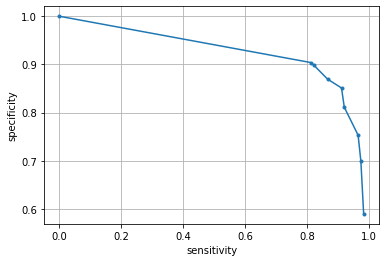

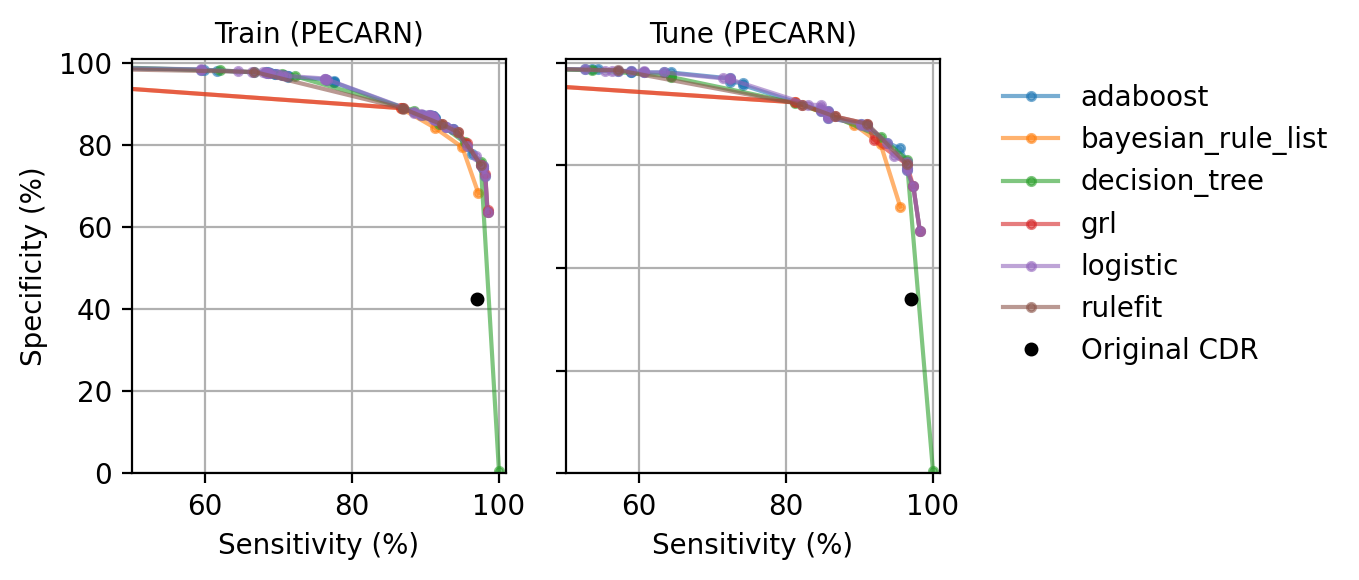


 _train
adaboost.pkl


100%|███████████████████████████████████████████████████| 75/75 [00:00<00:00, 3137.29it/s]


bayesian_rule_list.pkl


100%|█████████████████████████████████████████████████████| 5/5 [00:00<00:00, 1748.79it/s]


decision_tree.pkl


100%|███████████████████████████████████████████████████| 14/14 [00:00<00:00, 2185.43it/s]


grl.pkl


100%|███████████████████████████████████████████████████| 10/10 [00:00<00:00, 1784.73it/s]


logistic.pkl


100%|███████████████████████████████████████████████████| 75/75 [00:00<00:00, 2956.96it/s]


rulefit.pkl


100%|█████████████████████████████████████████████████████| 7/7 [00:00<00:00, 1937.45it/s]



 _tune
adaboost.pkl


100%|███████████████████████████████████████████████████| 53/53 [00:00<00:00, 3698.00it/s]


bayesian_rule_list.pkl


100%|█████████████████████████████████████████████████████| 5/5 [00:00<00:00, 1976.21it/s]


decision_tree.pkl


100%|███████████████████████████████████████████████████| 14/14 [00:00<00:00, 2158.83it/s]


grl.pkl


100%|█████████████████████████████████████████████████████| 9/9 [00:00<00:00, 2191.38it/s]


logistic.pkl


100%|███████████████████████████████████████████████████| 53/53 [00:00<00:00, 3535.28it/s]


rulefit.pkl


100%|█████████████████████████████████████████████████████| 6/6 [00:00<00:00, 1690.68it/s]



<< 7 >>
(1988, 45) (663, 45) (663, 45)
( 7 ) set X and y...
( 7 ) fit simple models...
decision_tree


100%|███████████████████████████████████████████████████| 13/13 [00:00<00:00, 2494.33it/s]


logistic


100%|███████████████████████████████████████████████████| 46/46 [00:00<00:00, 3527.65it/s]

adaboost



/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-vetting/rulevetting/api/validation_new.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
100%|███████████████████████████████████████████████████| 46/46 [00:00<00:00, 3755.48it/s]


( 7 ) fit other models...
bayesian_rule_list
Trained RuleListClassifier for detecting IwI
IF IntervForCervicalStab > 0.5 THEN probability of IwI: 58.0% (53.4%-62.5%)
ELSE IF FocalNeuroFindings > 0.5 THEN probability of IwI: 19.7% (13.0%-27.3%)
ELSE IF DxCspineInjury > 0.5 THEN probability of IwI: 16.7% (10.4%-24.0%)
ELSE probability of IwI: 1.6% (1.0%-2.4%)



100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1666.06it/s]

rulefit


                                                                                                           rule  \
10                                                  IntervForCervicalStab <= 0.5 and PtExtremityWeakness <= 0.5   
11                                                       DxCspineInjury <= 0.5 and IntervForCervicalStab <= 0.5   
9   ArrPtIntub <= 0.5 and HighriskDiving <= 0.5 and IntervForCervicalStab <= 0.5 and PtExtremityWeakness <= 0.5   

    coef  
10 -0.00  
11 -0.01  
9  -0.10  


100%|█████████████████████████████████████████████████████| 6/6 [00:00<00:00, 1766.77it/s]
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


grl
mean 0.163 (1988 pts)
if IntervForCervicalStab >= 1.0 then 0.58 (455 pts)
mean 0.039 (1533 pts)
if feat 0 >= 1.0 then 0.225 (89 pts)
mean 0.028 (1444 pts)
if feat 5 >= 1.0 then 0.289 (38 pts)
mean 0.021 (1406 pts)
if feat 1 >= 1.0 then 0.113 (97 pts)
mean 0.014 (1309 pts)
if feat 2 >= 1.0 then 0.098 (61 pts)
mean 0.01 (1248 pts)
if feat 8 >= 1.0 then 0.041 (49 pts)
mean 0.008 (1199 pts)
if feat 6 >= 1.0 then 0.022 (45 pts)
mean 0.008 (1154 pts)
if feat 3 >= 1.0 then 0.008 (1151 pts)
mean 0 (3 pts)



100%|█████████████████████████████████████████████████████| 9/9 [00:00<00:00, 2203.28it/s]

( 7 ) observe all the results...


<Figure size 432x288 with 0 Axes>

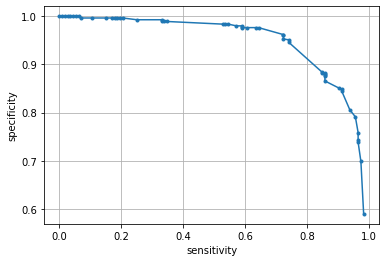

<Figure size 432x288 with 0 Axes>

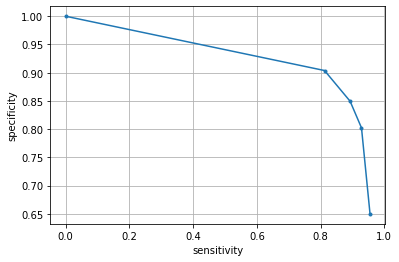

<Figure size 432x288 with 0 Axes>

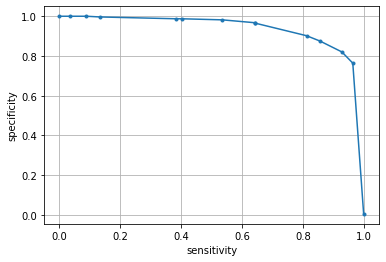

<Figure size 432x288 with 0 Axes>

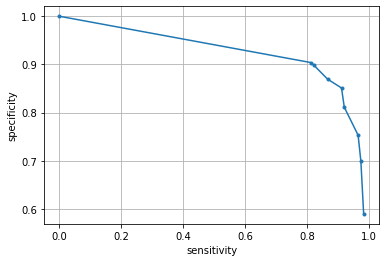

<Figure size 432x288 with 0 Axes>

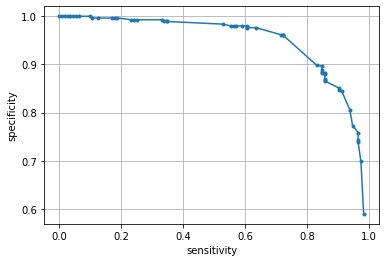

<Figure size 432x288 with 0 Axes>

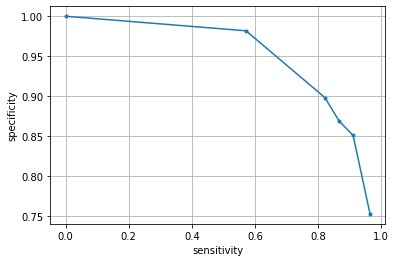

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

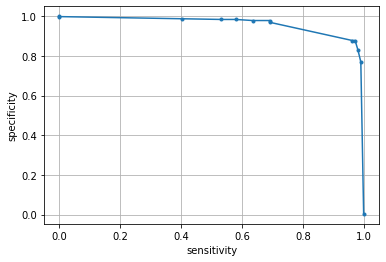

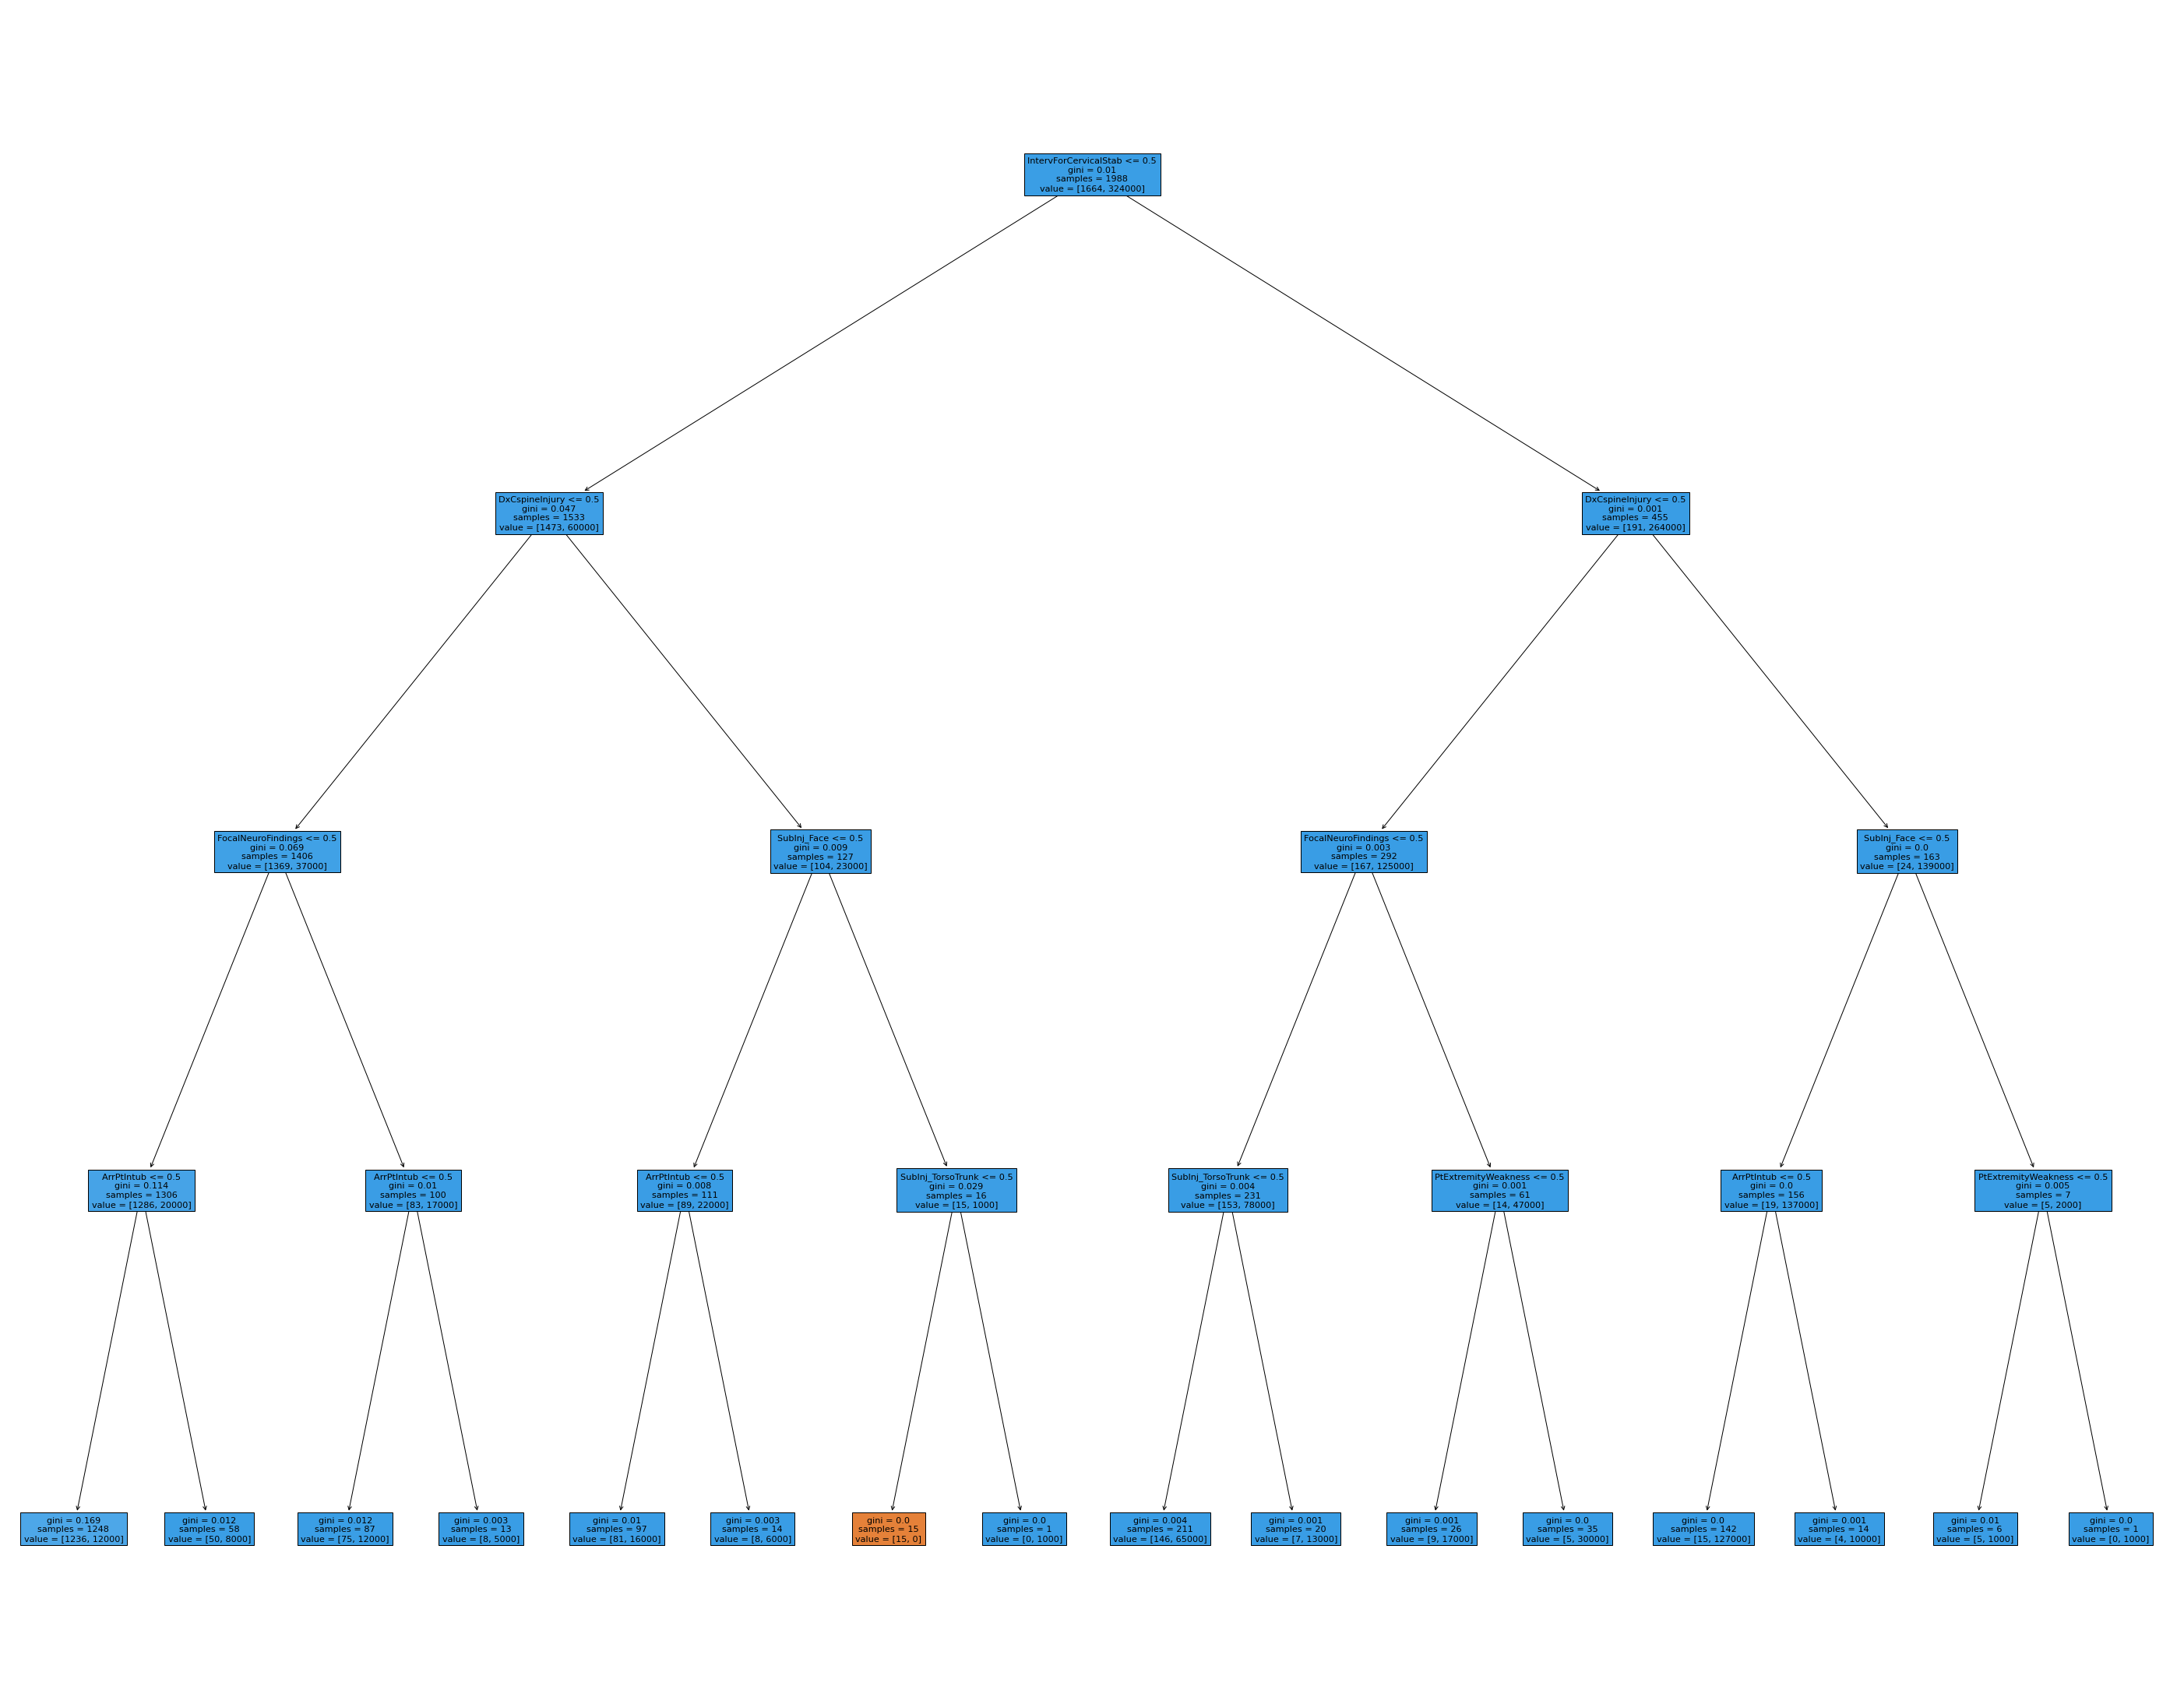

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

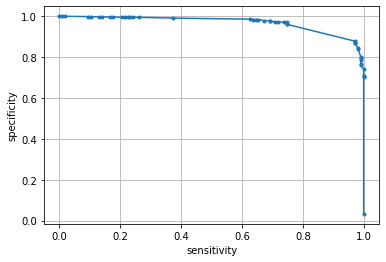

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

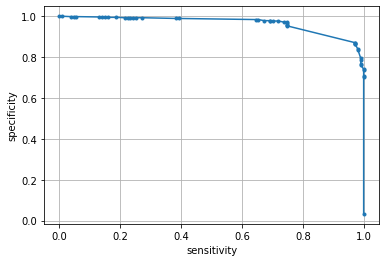

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

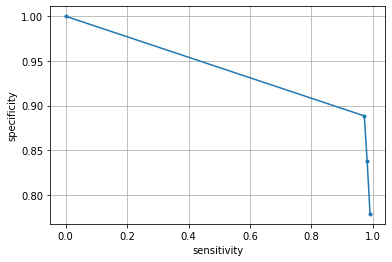

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

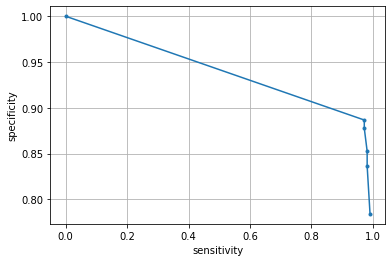

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

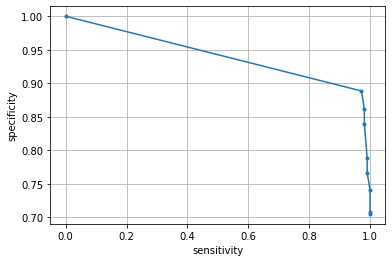

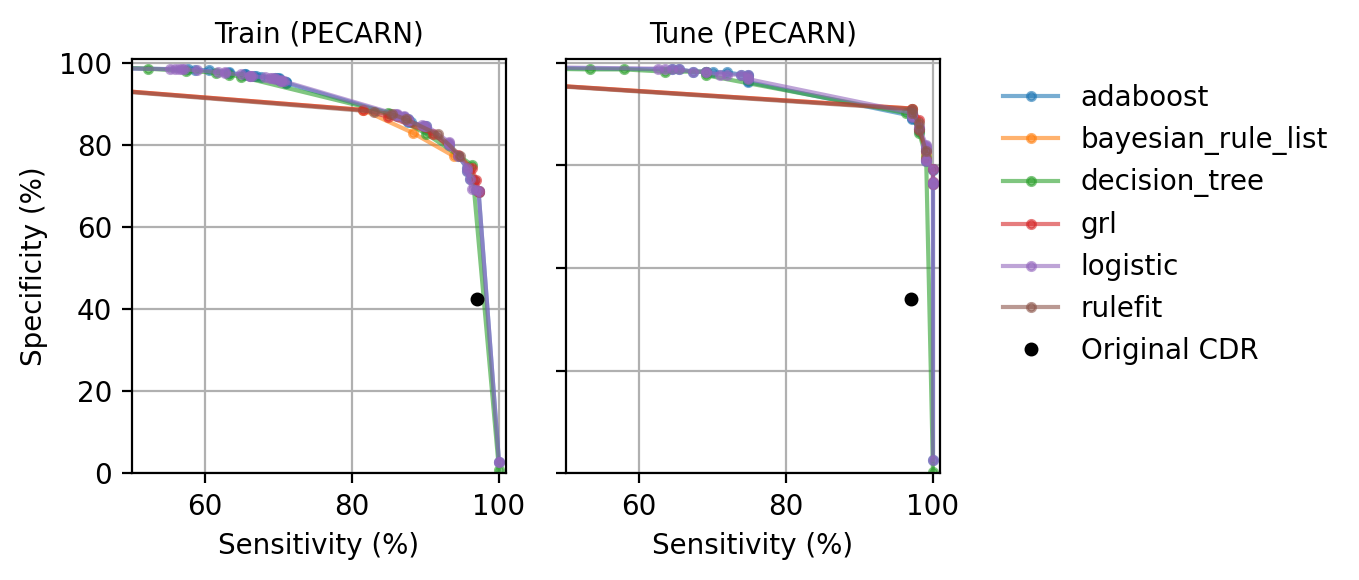


 _train
adaboost.pkl


100%|███████████████████████████████████████████████████| 70/70 [00:00<00:00, 2958.20it/s]


bayesian_rule_list.pkl


100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1670.87it/s]


decision_tree.pkl


100%|███████████████████████████████████████████████████| 14/14 [00:00<00:00, 2265.09it/s]


grl.pkl


100%|█████████████████████████████████████████████████████| 9/9 [00:00<00:00, 2095.52it/s]


logistic.pkl


100%|███████████████████████████████████████████████████| 70/70 [00:00<00:00, 3060.36it/s]


rulefit.pkl


100%|█████████████████████████████████████████████████████| 6/6 [00:00<00:00, 2006.68it/s]



 _tune
adaboost.pkl


100%|███████████████████████████████████████████████████| 46/46 [00:00<00:00, 3577.23it/s]


bayesian_rule_list.pkl


100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1628.70it/s]


decision_tree.pkl


100%|███████████████████████████████████████████████████| 13/13 [00:00<00:00, 2393.27it/s]


grl.pkl


100%|█████████████████████████████████████████████████████| 9/9 [00:00<00:00, 2060.07it/s]


logistic.pkl


100%|███████████████████████████████████████████████████| 46/46 [00:00<00:00, 3614.90it/s]


rulefit.pkl


100%|█████████████████████████████████████████████████████| 6/6 [00:00<00:00, 1838.26it/s]



<< 8 >>
(1988, 45) (663, 45) (663, 45)
( 8 ) set X and y...
( 8 ) fit simple models...
decision_tree


100%|███████████████████████████████████████████████████| 13/13 [00:00<00:00, 2728.75it/s]


logistic


100%|███████████████████████████████████████████████████| 45/45 [00:00<00:00, 3482.93it/s]

adaboost



/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-vetting/rulevetting/api/validation_new.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
100%|███████████████████████████████████████████████████| 45/45 [00:00<00:00, 3628.71it/s]


( 8 ) fit other models...
bayesian_rule_list
Trained RuleListClassifier for detecting IwI
IF IntervForCervicalStab > 0.5 THEN probability of IwI: 58.3% (53.7%-62.7%)
ELSE IF FocalNeuroFindings > 0.5 THEN probability of IwI: 18.2% (11.9%-25.5%)
ELSE IF DxCspineInjury > 0.5 THEN probability of IwI: 14.0% (8.3%-20.9%)
ELSE probability of IwI: 1.2% (0.7%-1.9%)



100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1515.01it/s]

rulefit


                                                                               rule  \
12                            IntervForCervicalStab <= 0.5 and PtSensoryLoss <= 0.5   
10     ArrPtIntub <= 0.5 and HighriskDiving <= 0.5 and IntervForCervicalStab <= 0.5   
9                        FocalNeuroFindings <= 0.5 and IntervForCervicalStab <= 0.5   
11  DxCspineInjury <= 0.5 and IntervForCervicalStab <= 0.5 and PtSensoryLoss <= 0.5   

    coef  
12 -0.03  
10 -0.10  
9  -0.00  
11 -0.00  


100%|█████████████████████████████████████████████████████| 9/9 [00:00<00:00, 2088.22it/s]
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


grl
mean 0.16 (1988 pts)
if IntervForCervicalStab >= 1.0 then 0.583 (458 pts)
mean 0.033 (1530 pts)
if feat 0 >= 1.0 then 0.253 (83 pts)
mean 0.021 (1447 pts)
if feat 7 >= 1.0 then 0.233 (43 pts)
mean 0.014 (1404 pts)
if feat 1 >= 1.0 then 0.101 (99 pts)
mean 0.008 (1305 pts)
if feat 2 >= 1.0 then 0.068 (59 pts)
mean 0.005 (1246 pts)
if feat 8 >= 1.0 then 0.023 (44 pts)
mean 0.004 (1202 pts)
if feat 3 >= 1.0 then 0.004 (1200 pts)
mean 0 (2 pts)



100%|█████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2099.12it/s]

( 8 ) observe all the results...


<Figure size 432x288 with 0 Axes>

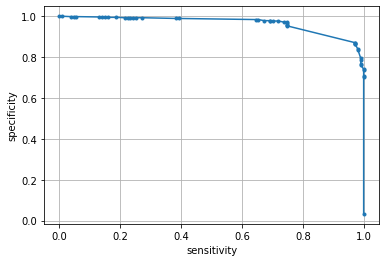

<Figure size 432x288 with 0 Axes>

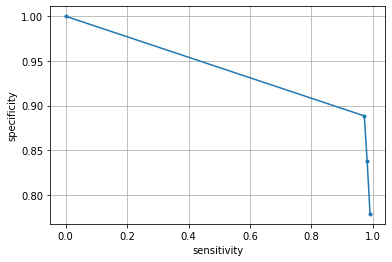

<Figure size 432x288 with 0 Axes>

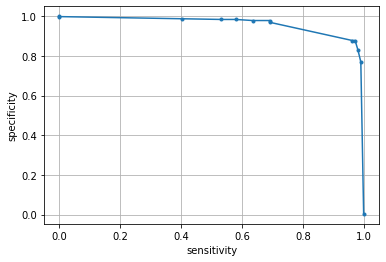

<Figure size 432x288 with 0 Axes>

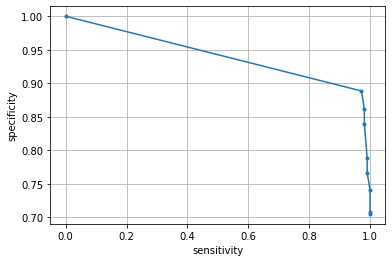

<Figure size 432x288 with 0 Axes>

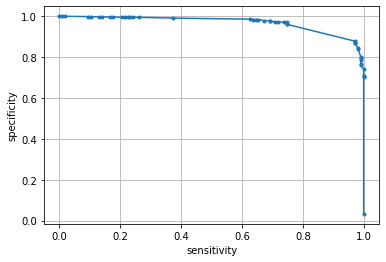

<Figure size 432x288 with 0 Axes>

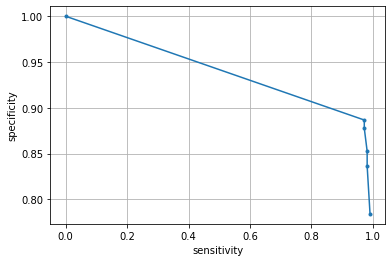

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

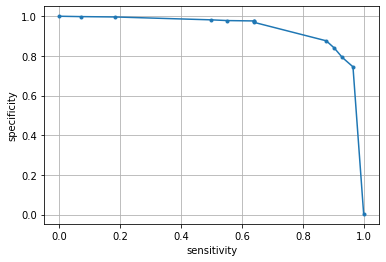

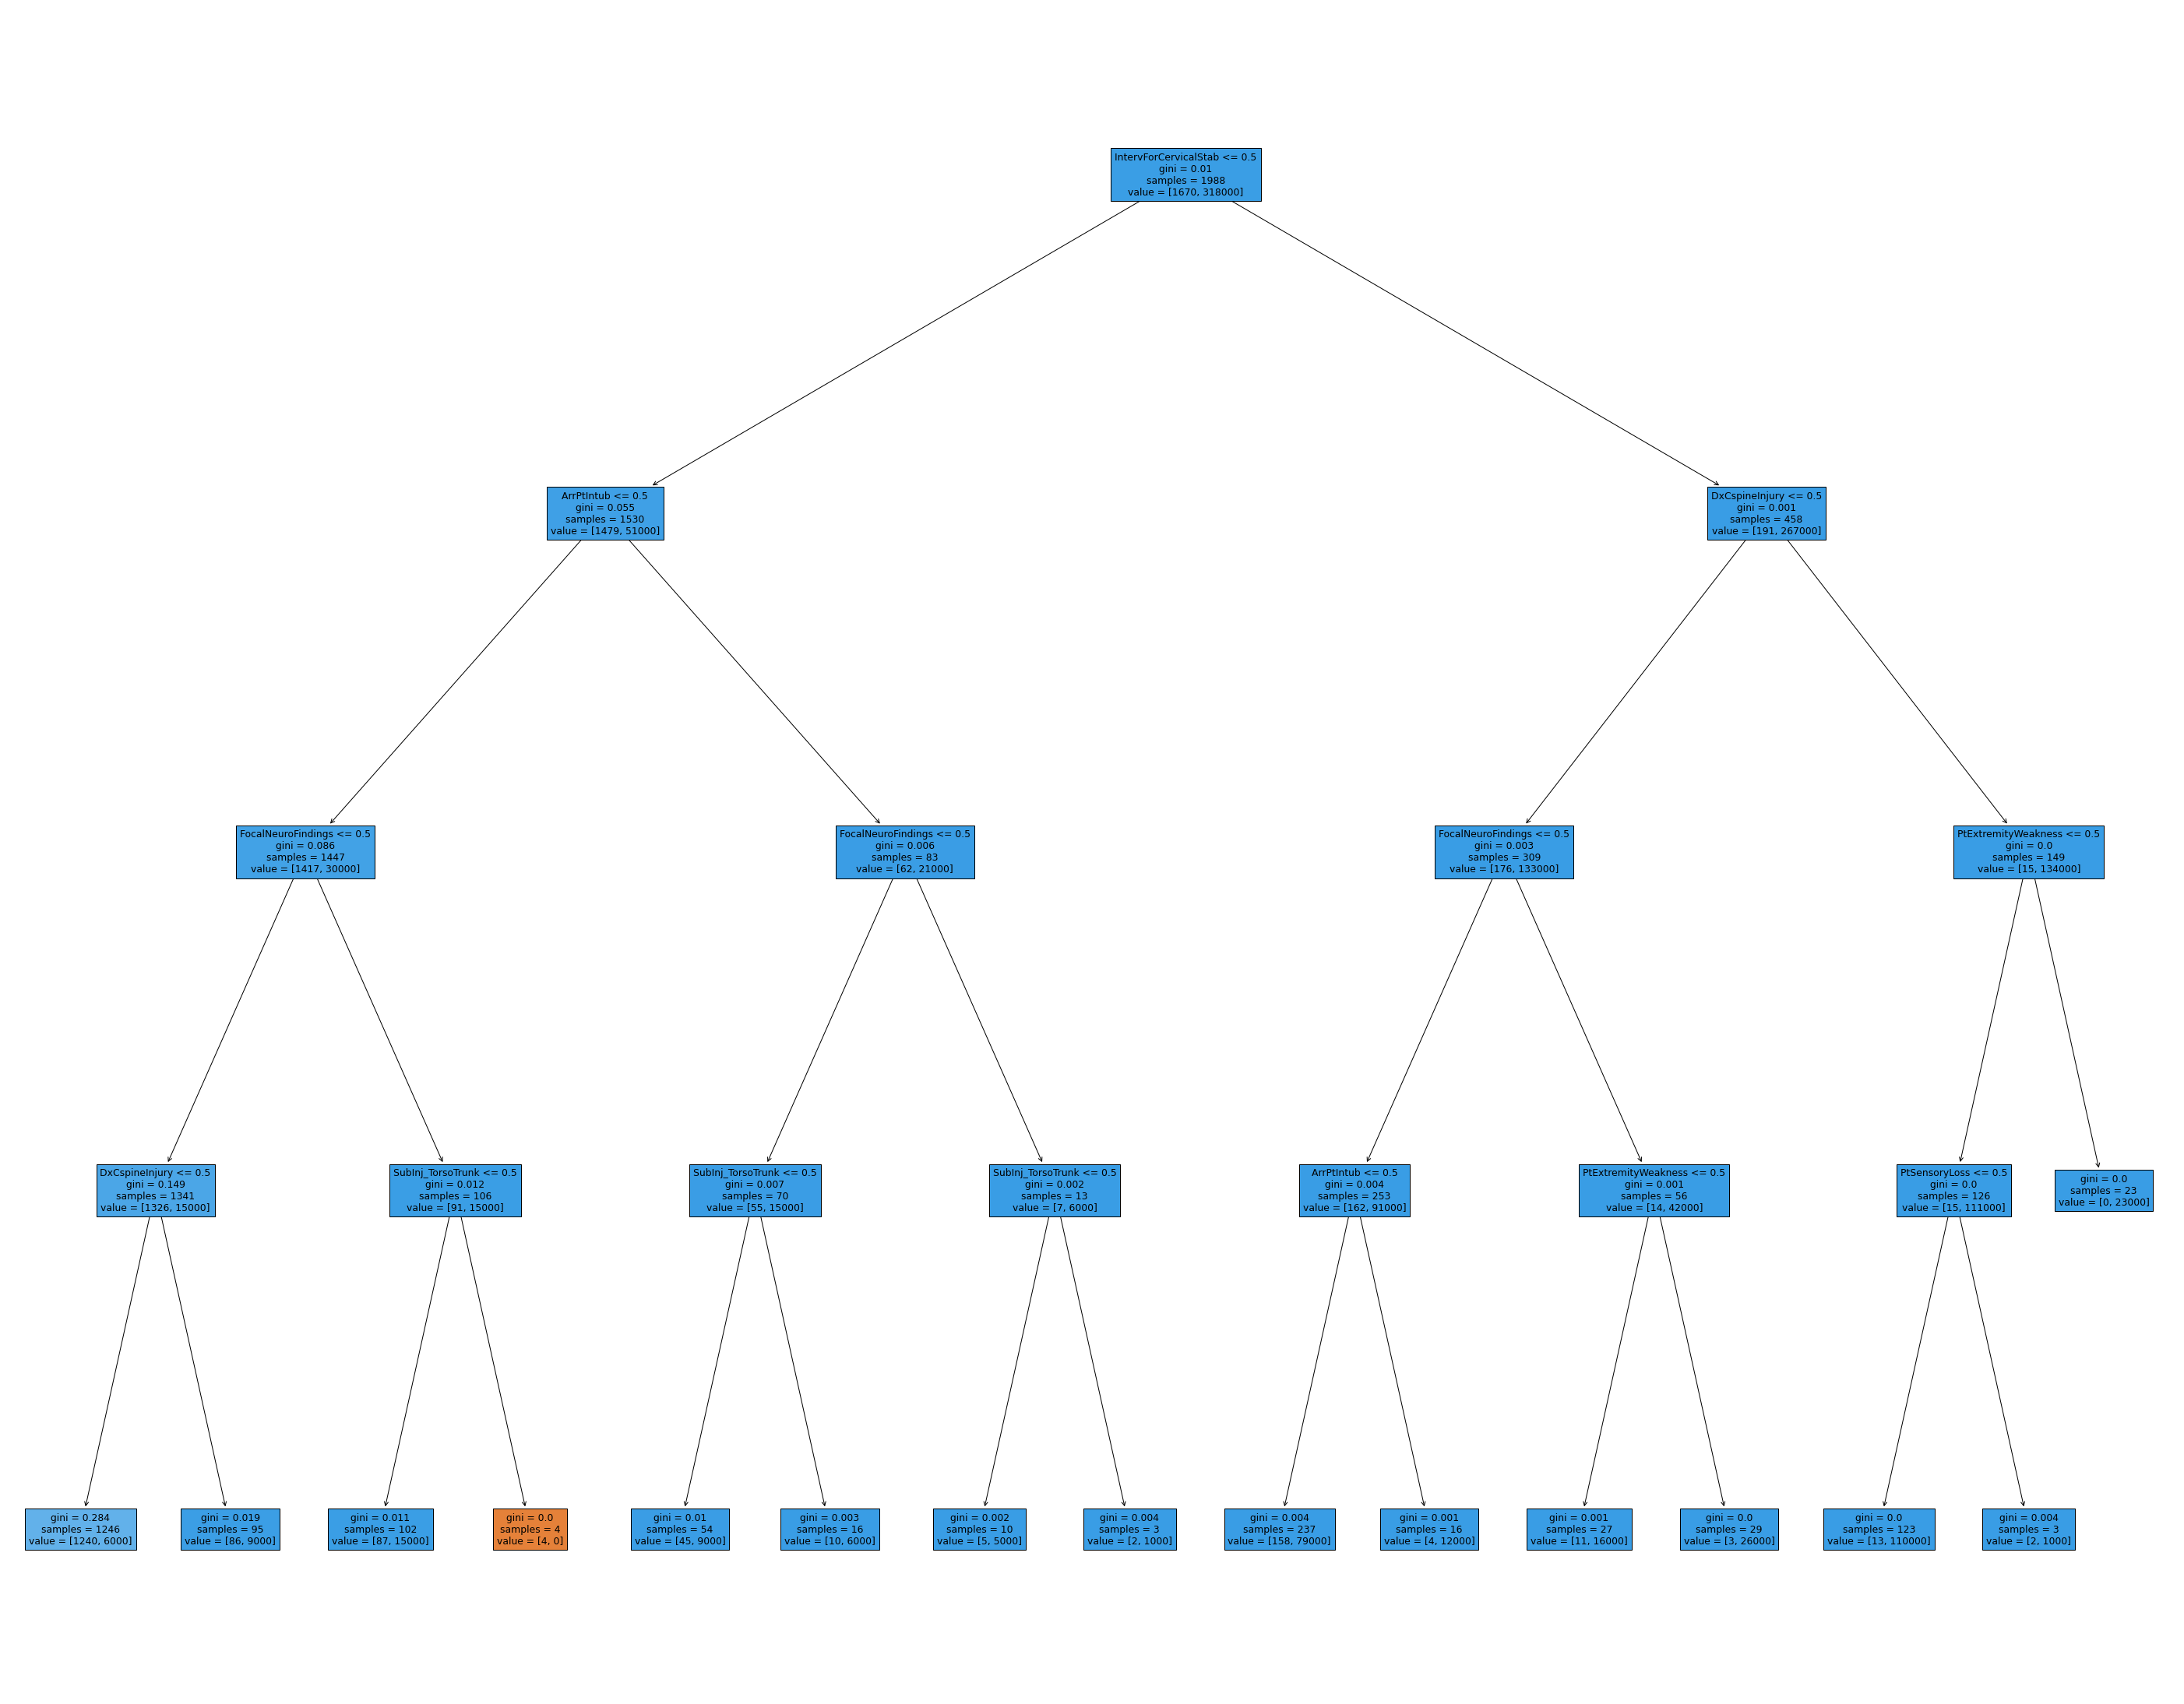

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

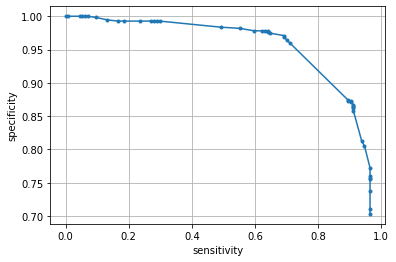

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

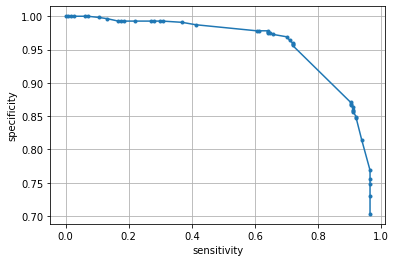

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

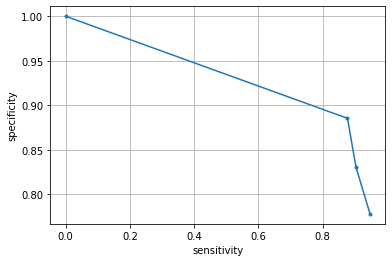

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

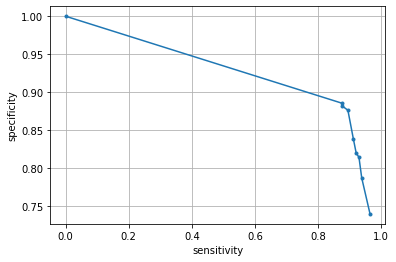

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

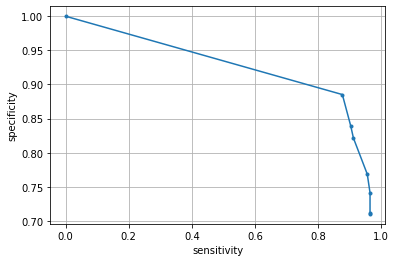

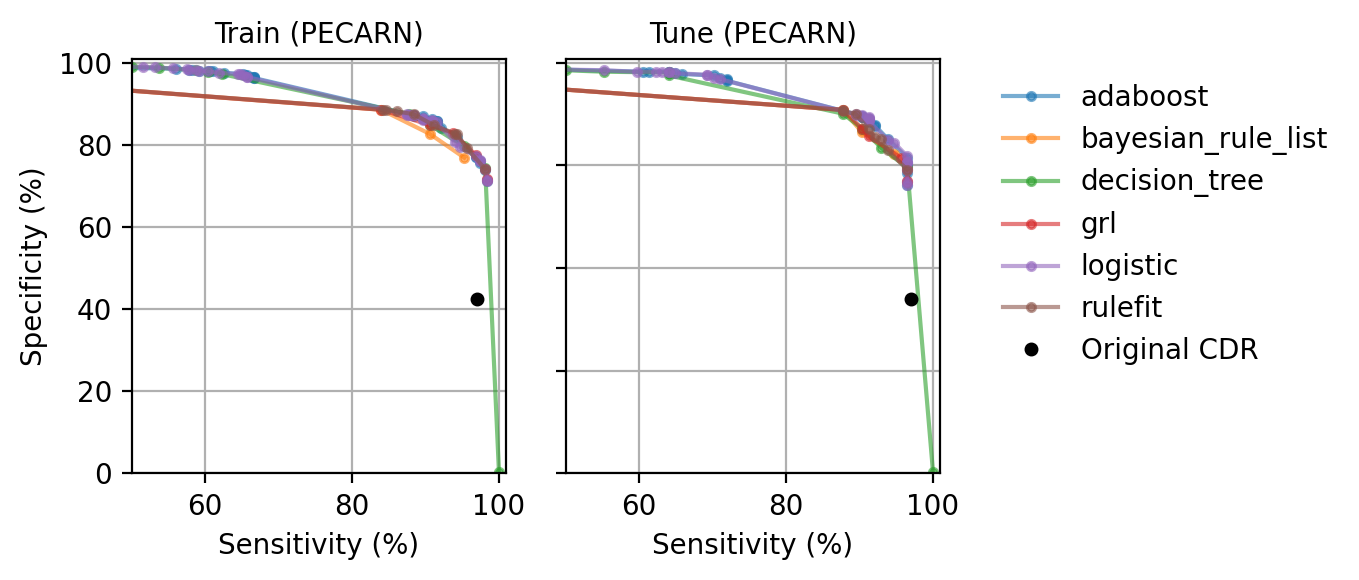


 _train
adaboost.pkl


100%|███████████████████████████████████████████████████| 58/58 [00:00<00:00, 2963.99it/s]


bayesian_rule_list.pkl


100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1514.05it/s]


decision_tree.pkl


100%|███████████████████████████████████████████████████| 13/13 [00:00<00:00, 2530.21it/s]


grl.pkl


100%|█████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1942.71it/s]


logistic.pkl


100%|███████████████████████████████████████████████████| 58/58 [00:00<00:00, 2915.92it/s]


rulefit.pkl


100%|███████████████████████████████████████████████████| 10/10 [00:00<00:00, 1999.19it/s]



 _tune
adaboost.pkl


100%|███████████████████████████████████████████████████| 45/45 [00:00<00:00, 3450.71it/s]


bayesian_rule_list.pkl


100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1649.51it/s]


decision_tree.pkl


100%|███████████████████████████████████████████████████| 13/13 [00:00<00:00, 2252.21it/s]


grl.pkl


100%|█████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2133.15it/s]


logistic.pkl


100%|███████████████████████████████████████████████████| 45/45 [00:00<00:00, 3292.29it/s]


rulefit.pkl


100%|█████████████████████████████████████████████████████| 9/9 [00:00<00:00, 2158.92it/s]



<< 9 >>
(1988, 45) (663, 45) (663, 45)
( 9 ) set X and y...
( 9 ) fit simple models...
decision_tree


100%|███████████████████████████████████████████████████| 13/13 [00:00<00:00, 2498.55it/s]


logistic


100%|███████████████████████████████████████████████████| 46/46 [00:00<00:00, 3508.79it/s]

adaboost



/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-vetting/rulevetting/api/validation_new.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
100%|███████████████████████████████████████████████████| 46/46 [00:00<00:00, 3789.12it/s]


( 9 ) fit other models...
bayesian_rule_list


/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-env/lib/python3.8/site-packages/imodels/rule_list/bayesian_rule_list/brl_util.py:170: RuntimeWarning: invalid value encountered in double_scalars
  Rhat = sqrt(varhat / float(W))


Trained RuleListClassifier for detecting IwI
IF IntervForCervicalStab > 0.5 THEN probability of IwI: 59.7% (55.3%-64.0%)
ELSE IF DxCspineInjury > 0.5 THEN probability of IwI: 13.0% (7.8%-19.2%)
ELSE probability of IwI: 2.0% (1.4%-2.8%)



100%|█████████████████████████████████████████████████████| 3/3 [00:00<00:00, 1602.71it/s]


rulefit
                                                                    rule  coef
3                                                  IntervForCervicalStab  0.01
11  ArrPtIntub <= 0.5 and DxCspineInjury <= 0.5 and PtSensoryLoss <= 0.5 -0.19
10                HighriskDiving <= 0.5 and IntervForCervicalStab <= 0.5 -0.38
9                  IntervForCervicalStab <= 0.5 and PtSensoryLoss <= 0.5 -0.01
12                  DxCspineInjury > 0.5 and IntervForCervicalStab > 0.5  0.11


100%|█████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2062.98it/s]
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


grl
mean 0.165 (1988 pts)
if IntervForCervicalStab >= 1.0 then 0.597 (479 pts)
mean 0.028 (1509 pts)
if feat 0 >= 1.0 then 0.188 (85 pts)
mean 0.019 (1424 pts)
if feat 7 >= 1.0 then 0.225 (40 pts)
mean 0.013 (1384 pts)
if feat 1 >= 1.0 then 0.086 (105 pts)
mean 0.007 (1279 pts)
if feat 8 >= 1.0 then 0.043 (46 pts)
mean 0.006 (1233 pts)
if feat 5 >= 1.0 then 0.053 (19 pts)
mean 0.005 (1214 pts)
if feat 2 >= 1.0 then 0.005 (1212 pts)
mean 0 (2 pts)



100%|█████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1879.17it/s]

( 9 ) observe all the results...


<Figure size 432x288 with 0 Axes>

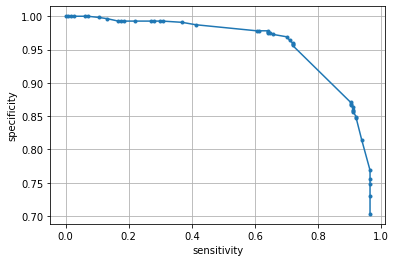

<Figure size 432x288 with 0 Axes>

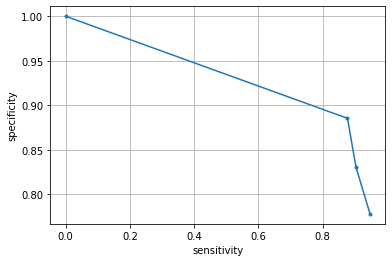

<Figure size 432x288 with 0 Axes>

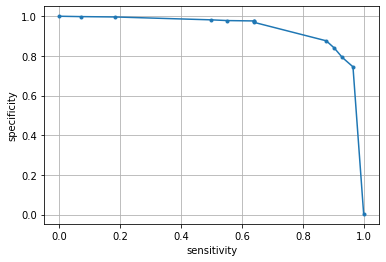

<Figure size 432x288 with 0 Axes>

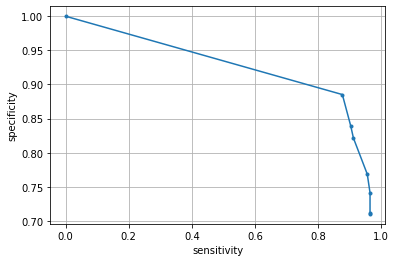

<Figure size 432x288 with 0 Axes>

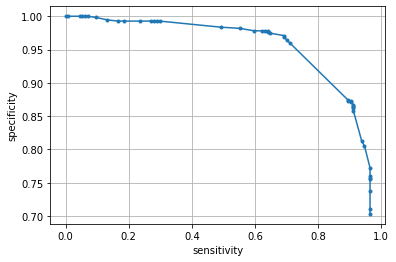

<Figure size 432x288 with 0 Axes>

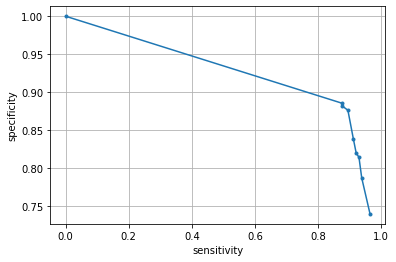

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

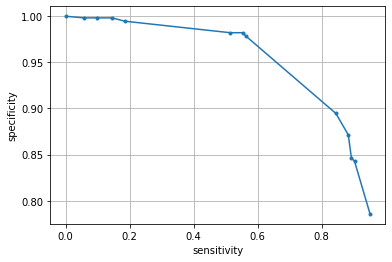

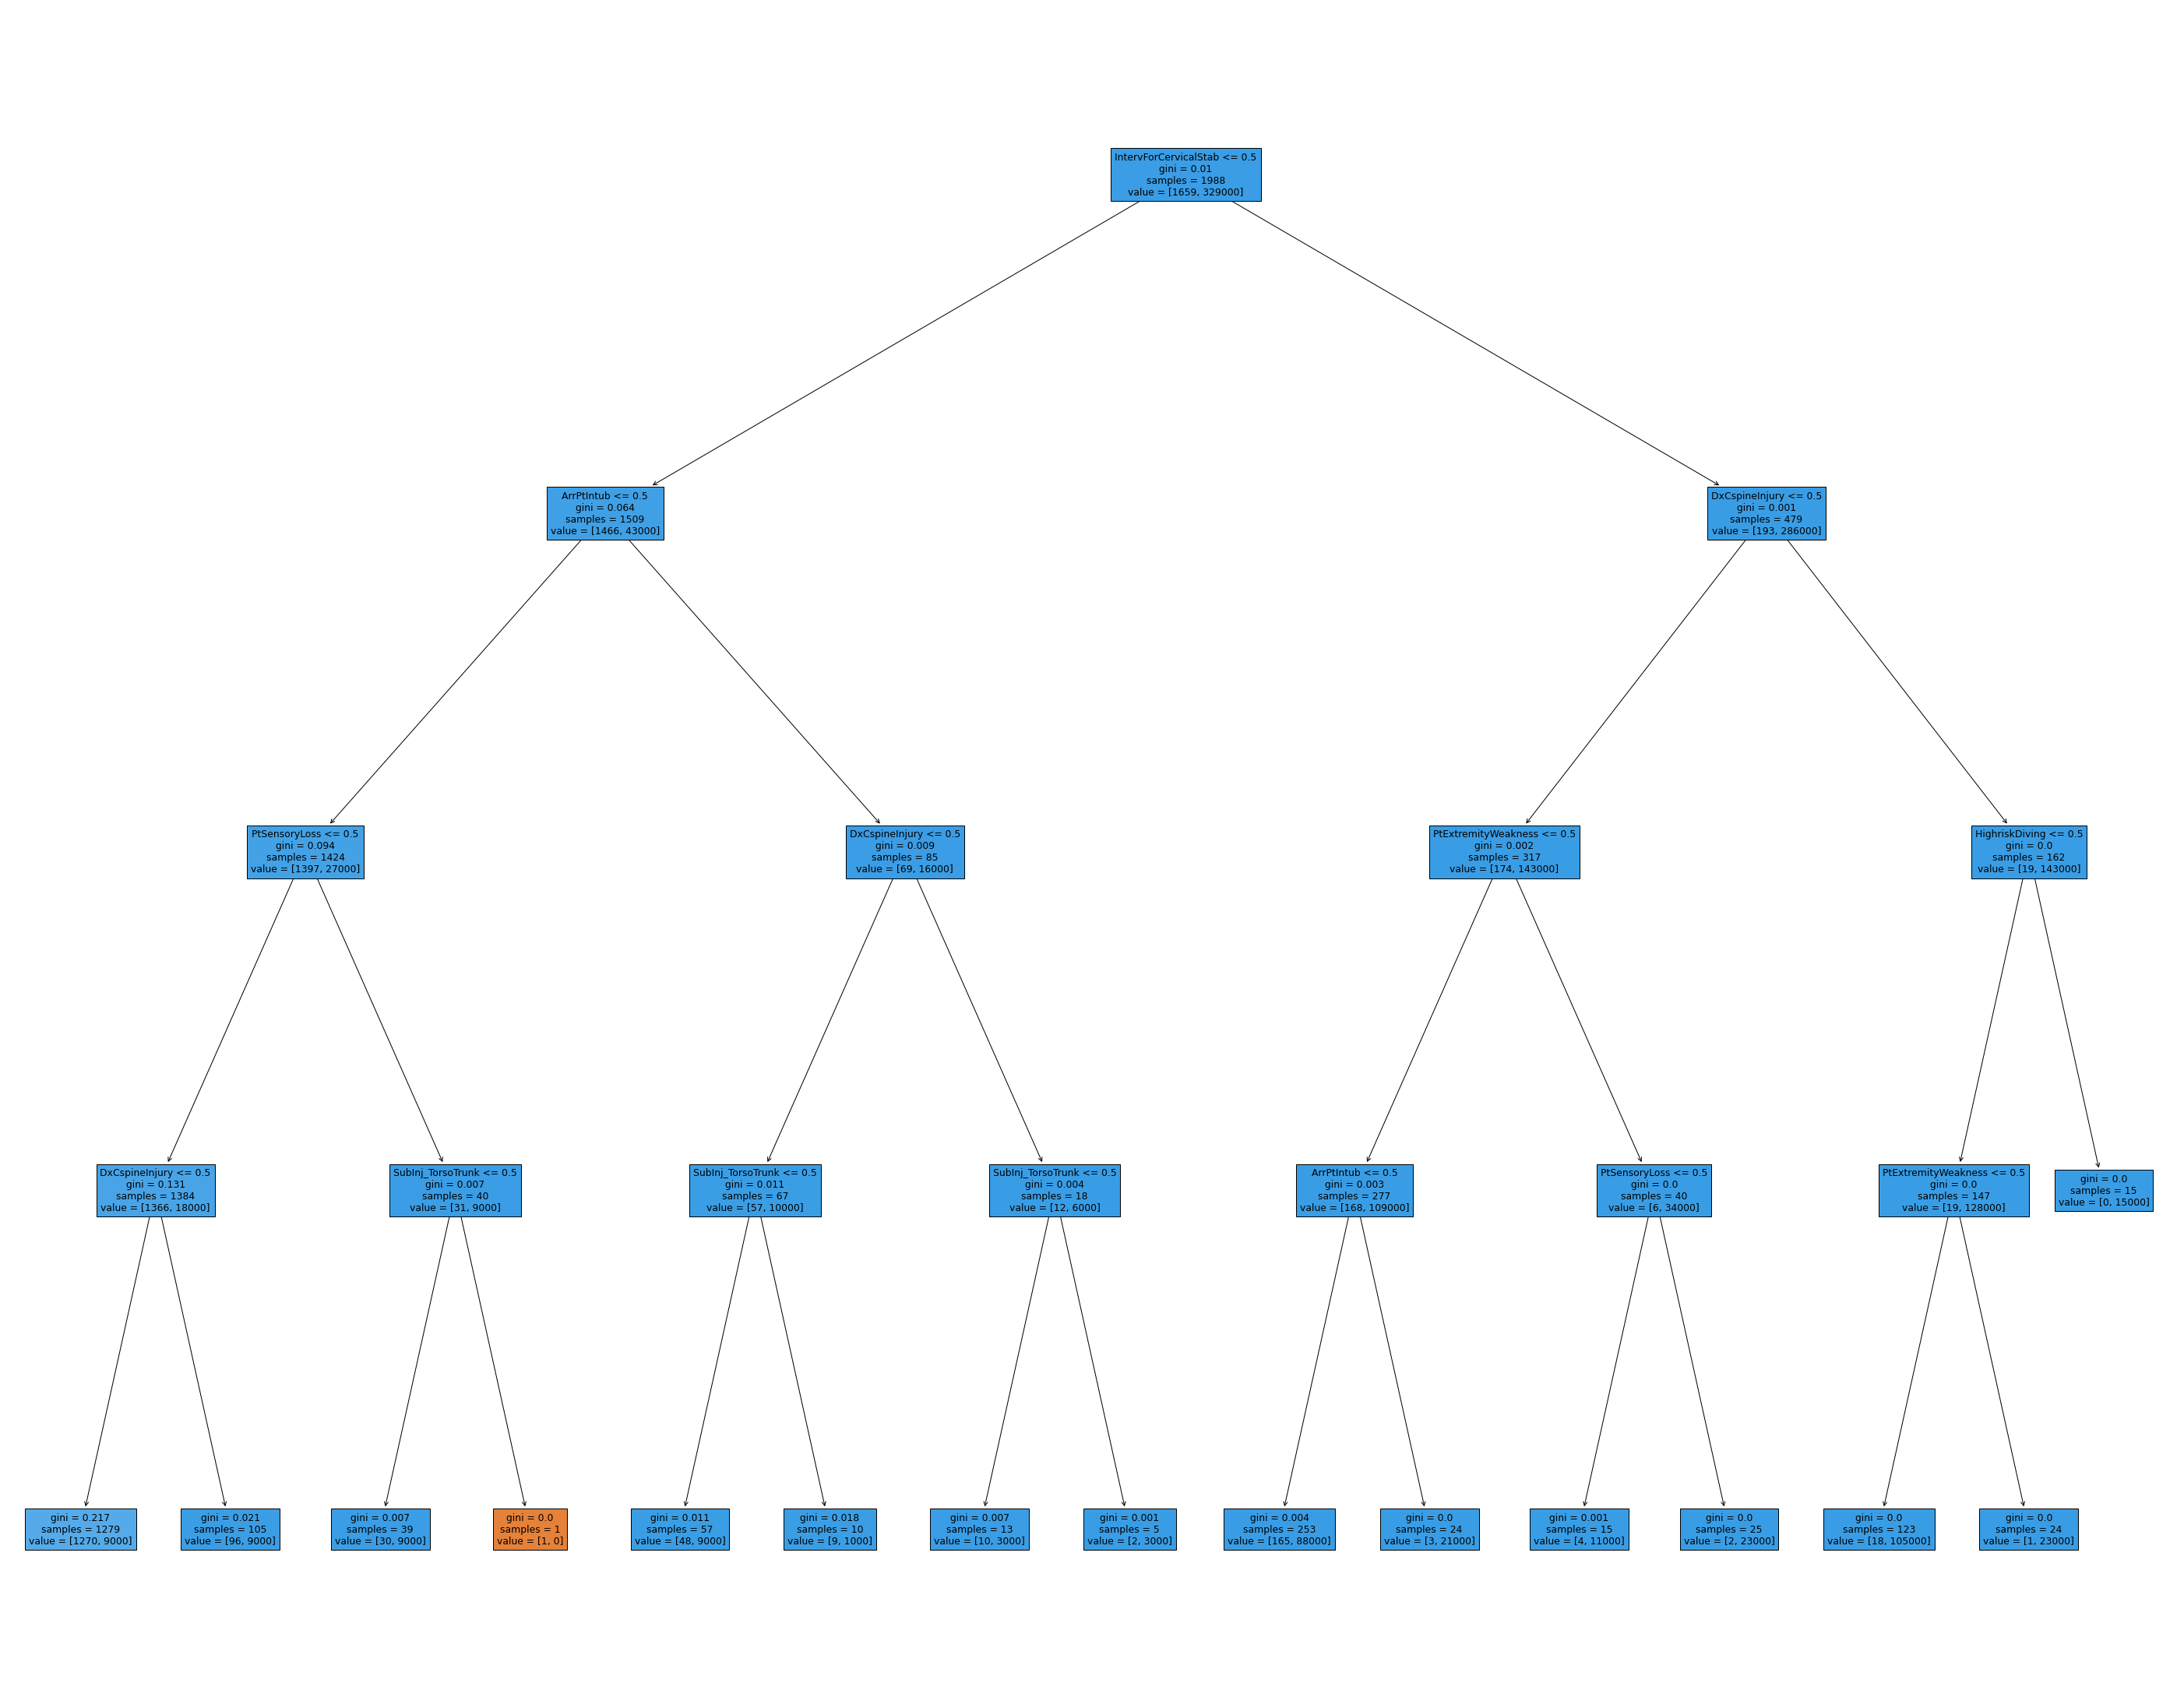

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

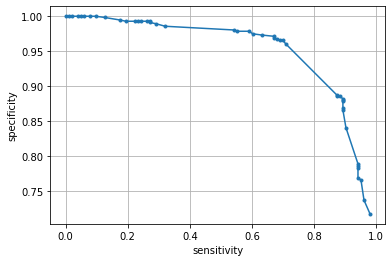

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

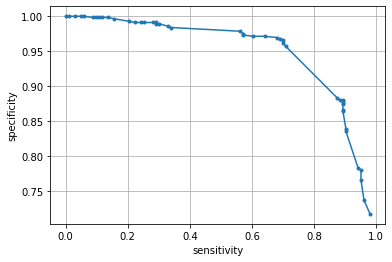

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

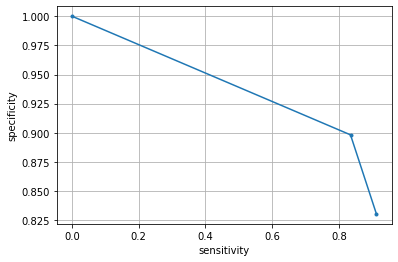

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

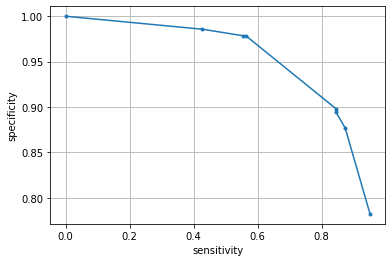

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

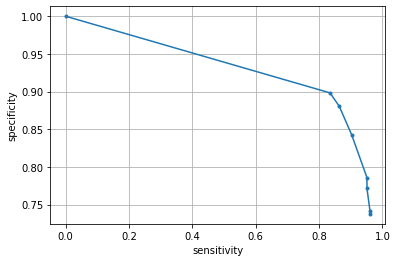

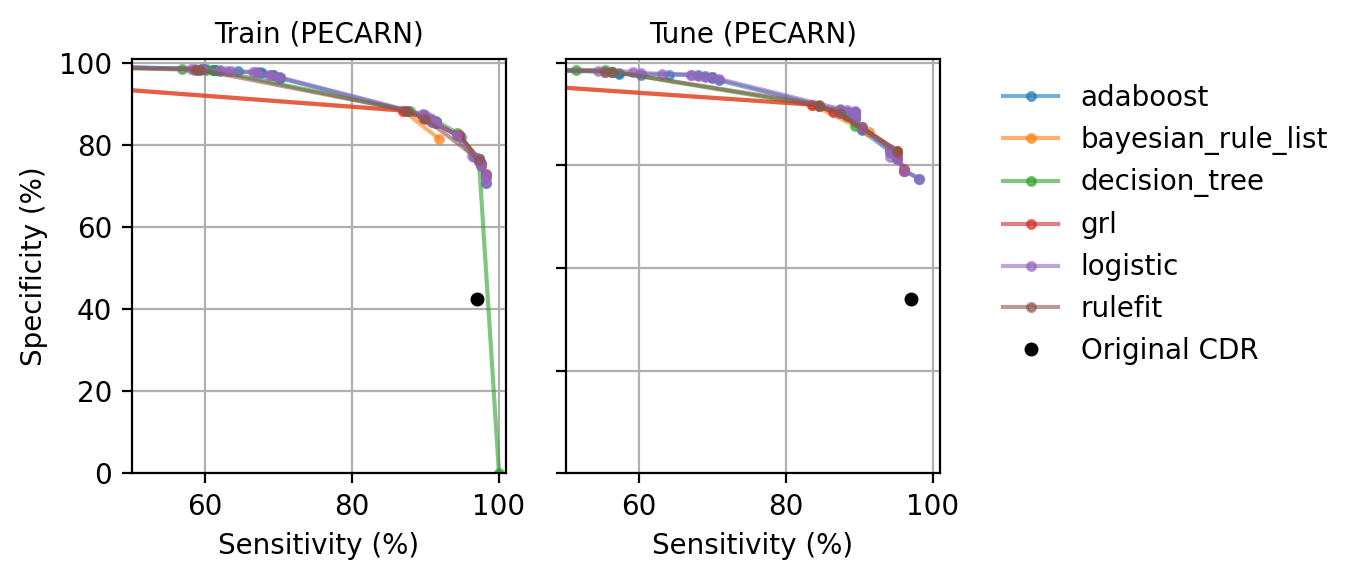


 _train
adaboost.pkl


100%|███████████████████████████████████████████████████| 63/63 [00:00<00:00, 3152.86it/s]


bayesian_rule_list.pkl


100%|█████████████████████████████████████████████████████| 3/3 [00:00<00:00, 1457.71it/s]


decision_tree.pkl


100%|███████████████████████████████████████████████████| 14/14 [00:00<00:00, 2429.27it/s]


grl.pkl


100%|█████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2095.97it/s]


logistic.pkl


100%|███████████████████████████████████████████████████| 63/63 [00:00<00:00, 3039.49it/s]


rulefit.pkl


100%|█████████████████████████████████████████████████████| 9/9 [00:00<00:00, 1884.70it/s]



 _tune
adaboost.pkl


100%|███████████████████████████████████████████████████| 46/46 [00:00<00:00, 3633.21it/s]


bayesian_rule_list.pkl


100%|█████████████████████████████████████████████████████| 3/3 [00:00<00:00, 1282.53it/s]


decision_tree.pkl


100%|███████████████████████████████████████████████████| 13/13 [00:00<00:00, 2527.63it/s]


grl.pkl


100%|█████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2221.56it/s]


logistic.pkl


100%|███████████████████████████████████████████████████| 46/46 [00:00<00:00, 3567.57it/s]


rulefit.pkl


100%|█████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2259.25it/s]



<< 10 >>
(1988, 45) (663, 45) (663, 45)
( 10 ) set X and y...
( 10 ) fit simple models...
decision_tree


100%|███████████████████████████████████████████████████| 14/14 [00:00<00:00, 2842.08it/s]


logistic


100%|███████████████████████████████████████████████████| 42/42 [00:00<00:00, 3383.87it/s]

adaboost



/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-vetting/rulevetting/api/validation_new.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
100%|███████████████████████████████████████████████████| 42/42 [00:00<00:00, 3761.15it/s]


( 10 ) fit other models...
bayesian_rule_list
Trained RuleListClassifier for detecting IwI
IF IntervForCervicalStab > 0.5 THEN probability of IwI: 61.1% (56.6%-65.5%)
ELSE IF FocalNeuroFindings > 0.5 THEN probability of IwI: 17.1% (10.9%-24.4%)
ELSE IF DxCspineInjury > 0.5 THEN probability of IwI: 11.0% (5.9%-17.5%)
ELSE probability of IwI: 1.4% (0.8%-2.1%)



100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1401.61it/s]

rulefit


                                                                           rule  \
11                       HighriskDiving <= 0.5 and IntervForCervicalStab <= 0.5   
12                  IntervForCervicalStab <= 0.5 and PtExtremityWeakness <= 0.5   
9                            ArrPtIntub <= 0.5 and IntervForCervicalStab <= 0.5   
10  ArrPtIntub <= 0.5 and IntervForCervicalStab <= 0.5 and PtSensoryLoss <= 0.5   

    coef  
11 -0.08  
12 -0.07  
9  -0.01  
10 -0.09  


100%|█████████████████████████████████████████████████████| 7/7 [00:00<00:00, 2358.43it/s]
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/seunghoonpaik/Desktop/SH/Berkeley/Coursework/215A/Lab/final-proj/andy-github/rule-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


grl
mean 0.163 (1988 pts)
if IntervForCervicalStab >= 1.0 then 0.611 (453 pts)
mean 0.031 (1535 pts)
if feat 0 >= 1.0 then 0.202 (84 pts)
mean 0.021 (1451 pts)
if feat 6 >= 1.0 then 0.227 (44 pts)
mean 0.014 (1407 pts)
if feat 1 >= 1.0 then 0.09 (100 pts)
mean 0.008 (1307 pts)
if feat 5 >= 1.0 then 0.1 (20 pts)
mean 0.007 (1287 pts)
if feat 8 >= 1.0 then 0.031 (64 pts)
mean 0.006 (1223 pts)
if feat 2 >= 1.0 then 0.031 (32 pts)
mean 0.005 (1191 pts)
if feat 3 >= 1.0 then 0.005 (1187 pts)
mean 0 (4 pts)



100%|█████████████████████████████████████████████████████| 7/7 [00:00<00:00, 1809.67it/s]

( 10 ) observe all the results...


<Figure size 432x288 with 0 Axes>

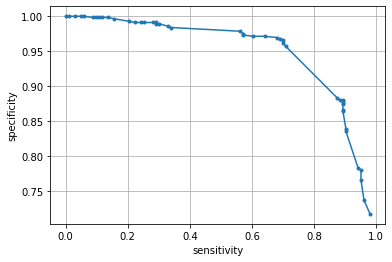

<Figure size 432x288 with 0 Axes>

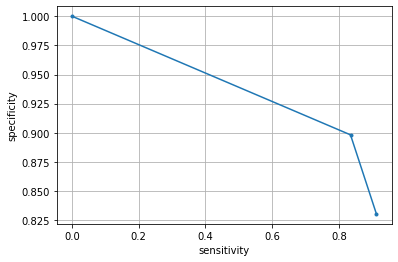

<Figure size 432x288 with 0 Axes>

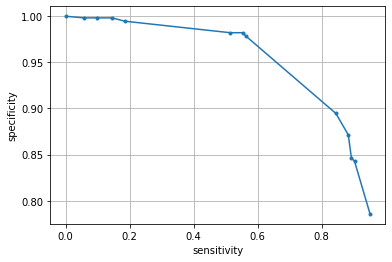

<Figure size 432x288 with 0 Axes>

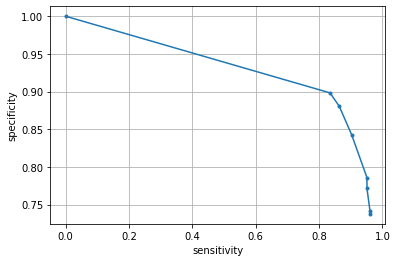

<Figure size 432x288 with 0 Axes>

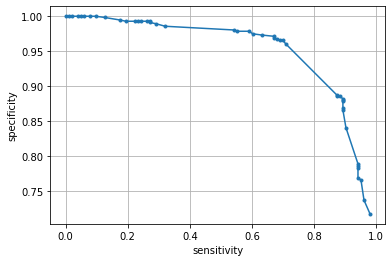

<Figure size 432x288 with 0 Axes>

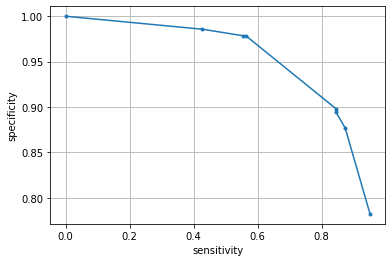

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

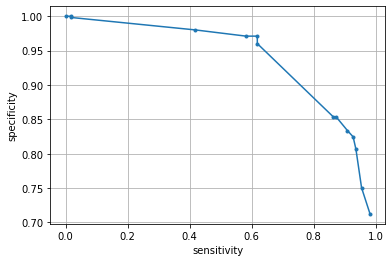

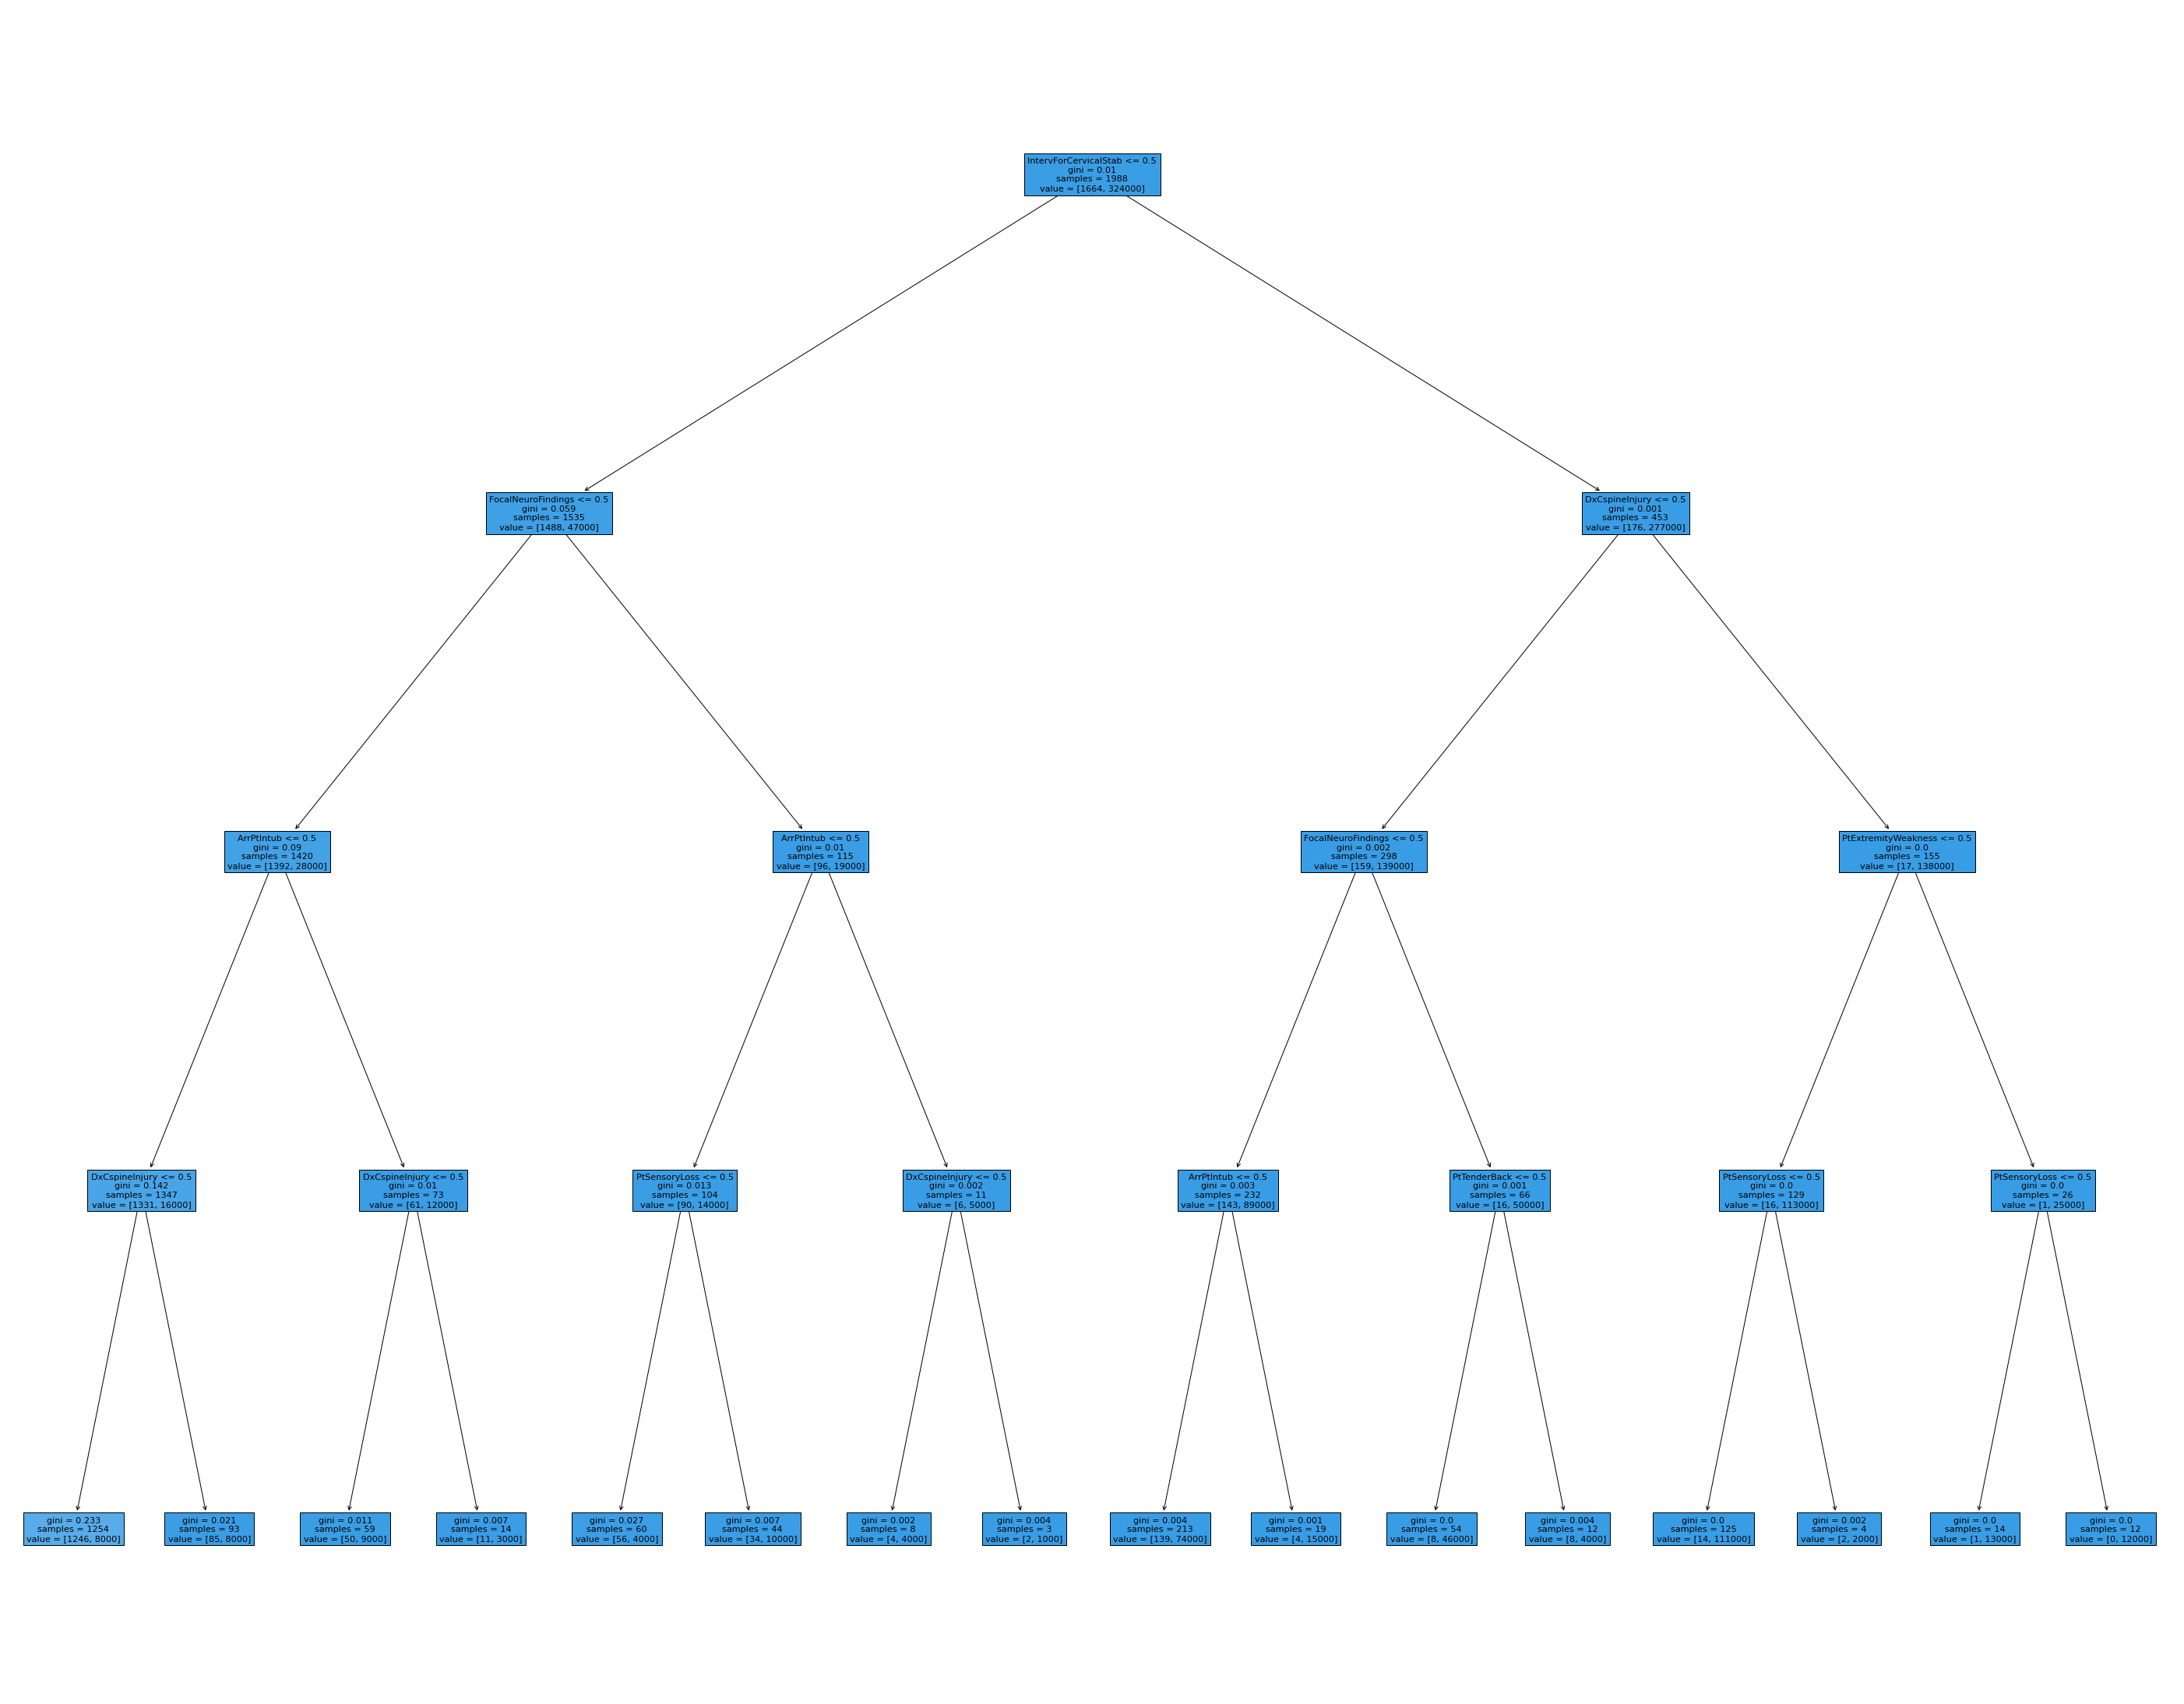

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

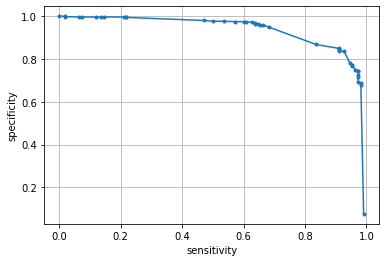

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

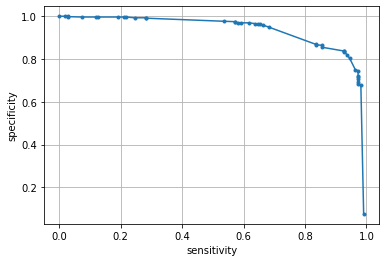

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

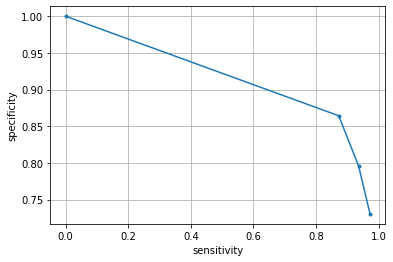

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

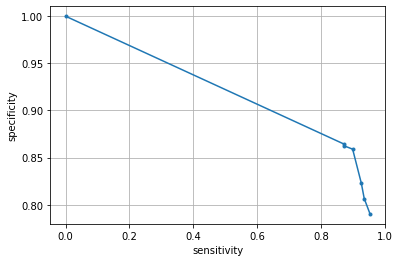

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

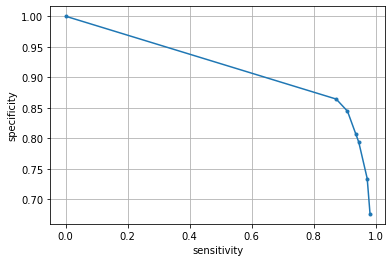

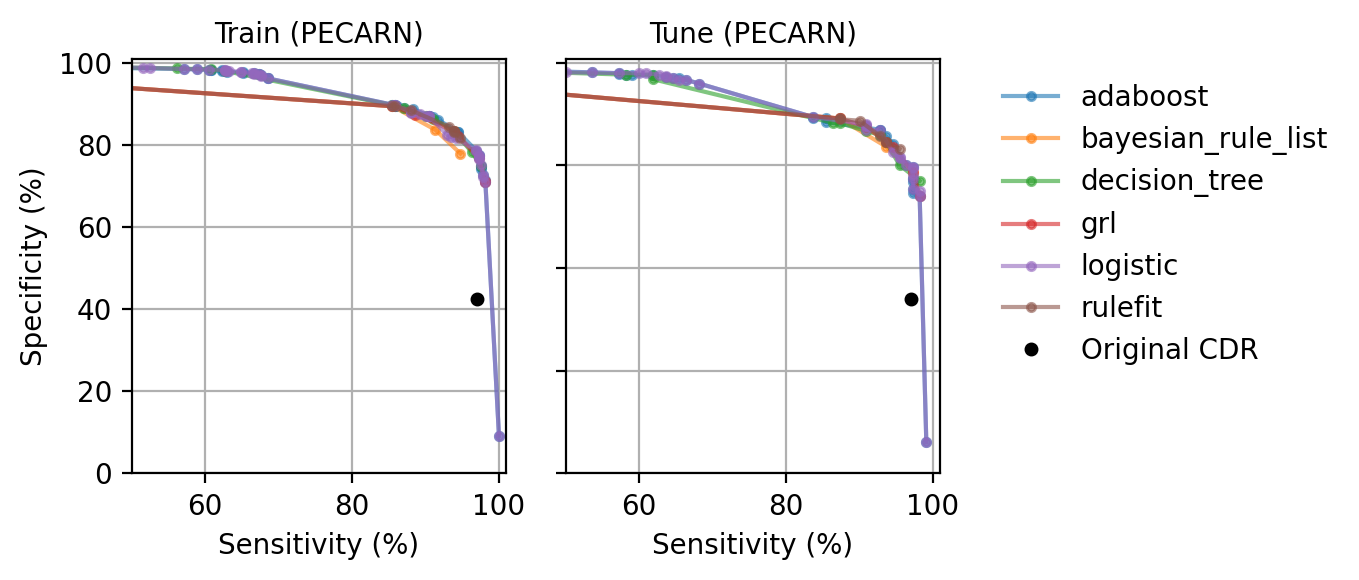


 _train
adaboost.pkl


100%|███████████████████████████████████████████████████| 67/67 [00:00<00:00, 3009.18it/s]


bayesian_rule_list.pkl


100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1559.37it/s]


decision_tree.pkl


100%|███████████████████████████████████████████████████| 14/14 [00:00<00:00, 2508.98it/s]


grl.pkl


100%|█████████████████████████████████████████████████████| 8/8 [00:00<00:00, 2171.53it/s]


logistic.pkl


100%|███████████████████████████████████████████████████| 67/67 [00:00<00:00, 2981.09it/s]


rulefit.pkl


100%|█████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1736.86it/s]



 _tune
adaboost.pkl


100%|███████████████████████████████████████████████████| 42/42 [00:00<00:00, 3454.81it/s]


bayesian_rule_list.pkl


100%|█████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1622.71it/s]


decision_tree.pkl


100%|███████████████████████████████████████████████████| 14/14 [00:00<00:00, 2432.59it/s]


grl.pkl


100%|█████████████████████████████████████████████████████| 7/7 [00:00<00:00, 1772.53it/s]


logistic.pkl


100%|███████████████████████████████████████████████████| 42/42 [00:00<00:00, 3392.86it/s]


rulefit.pkl


100%|█████████████████████████████████████████████████████| 7/7 [00:00<00:00, 1869.60it/s]


<Figure size 432x288 with 0 Axes>

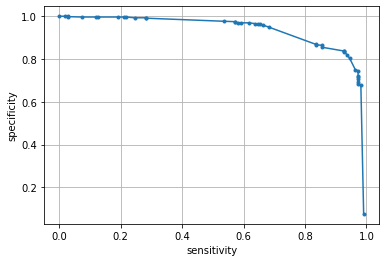

<Figure size 432x288 with 0 Axes>

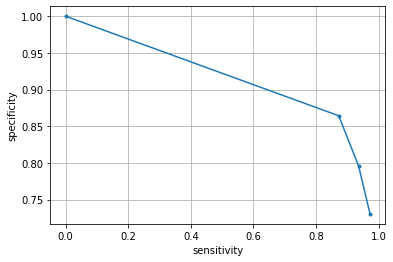

<Figure size 432x288 with 0 Axes>

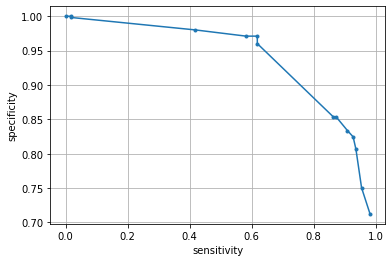

<Figure size 432x288 with 0 Axes>

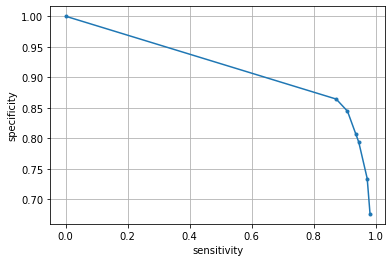

<Figure size 432x288 with 0 Axes>

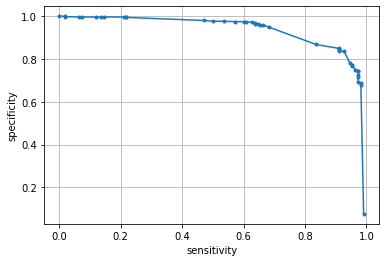

<Figure size 432x288 with 0 Axes>

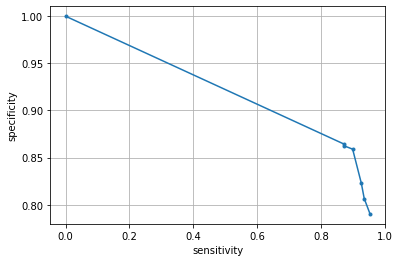

In [7]:
results_all_resampled = {}
end_range = repetition + 1
# end_range = 3

for rep in range(1, end_range):
    print("<<", rep, ">>")
    results_all_resampled[rep] = {"used_variables": [], "simple_models_result": {}, "other_models_result":{},
                                  # "all_models_plot": plt.figure(),
                                  "all_models_metric_train": 0, "all_models_metric_tune": 0}

    ### load data ### 
    df_train = dd[rep]["train"]
    df_tune = dd[rep]["tune"]
    df_test = dd[rep]["test"]
    print(df_train.shape, df_tune.shape, df_test.shape)
    
    ### set X and y ###
    print("(", rep, ") set X and y...")
    index = var_selection(df_train, method=['rfe', 9]) # SH: we may fix the index
    used_variables = [df_train.columns[i] for i in range(0, len(df_train.columns)) if index[i] == True]
    results_all_resampled[rep]["used_variables"] = used_variables

    df_train = df_train.loc[:,index]
    df_tune = df_tune.loc[:,index]
    df_test = df_test.loc[:,index]

    X_train = df_train.drop(columns=outcome_def)
    y_train = df_train[outcome_def].values
    X_tune = df_tune.drop(columns=outcome_def)
    y_tune = df_tune[outcome_def].values

    feature_names = df_train.keys().values.tolist()  
    
    LOC = oj(MODELS_RESAMPLED_DIR, str(i))
    os.makedirs(LOC, exist_ok=True)
    
    ### fit simple models ###
    print("(", rep, ") fit simple models...")
    ml = ['decision_tree', 'logistic', 'adaboost']
    result = {mn : {'stats': {}, 'threshes': {}, 'plot': plt.figure(), "model": 0} for mn in ml}
    for mn in ml:
        print(mn)
        stats, threshes, plot, model = fit_simple_models(mn, X_train, X_tune, y_train, y_tune, feature_names, LOC)
        # stats, threshes, model = fit_simple_models(mn, X_train, X_tune, y_train, y_tune, feature_names)
        result[mn]["stats"] = stats
        result[mn]["threshes"] = threshes
        result[mn]["plot"] = plot
        result[mn]["model"] = model
    results_all_resampled[rep]["simple_models_result"] = result
        
    ### fit other models ###
    print("(", rep, ") fit other models...")
    ml_oth = ['bayesian_rule_list', 'rulefit', 'grl']
    result_oth = {mn : {'stats': {}, 'threshes': {}, 'plot': plt.figure(), "model": 0} for mn in ml_oth}
    for mn in ml_oth:
        print(mn)
        stats, threshes, plot, model = fit_other_models(mn, X_train, X_tune, y_train, y_tune, feature_names, LOC, seed_ = 123, verbose = True)
        result_oth[mn]["stats"] = stats
        result_oth[mn]["threshes"] = threshes
        result_oth[mn]["plot"] = plot
        result_oth[mn]["model"] = model
    results_all_resampled[rep]["other_models_result"] = result_oth
        
    ### observe all the results ###
    print("(", rep, ") observe all the results...")
    suffixes = ['_train', '_tune']
    # 1. plot
    titles = ['Train (PECARN)', 'Tune (PECARN)']
    R, C = 1, len(suffixes)
    #fig = plt.figure(dpi=200, figsize=(C * 2.5, R * 3), facecolor='w')
    plt.figure(dpi=200, figsize=(C * 2.5, R * 3), facecolor='w')
    fs = 10
    for i, suffix in enumerate(suffixes):
        ax = plt.subplot(R, C, i + 1)
        plot_metrics(suffix, LOC, title=titles[i], fs=fs)
        if i > 0:
            plt.ylabel('')
            plt.yticks([0, 25, 50, 75, 100], labels=[''] * 5)
        plt.xlim((50, 101))
        plt.ylim((0, 101))
    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1.1, 1), fontsize=fs, frameon=False)
    #plt.savefig('figs/metrics_3_splits')
    #results_all_resampled[i]["all_models_plot"] = fig
    plt.show()
    
    #2. table
    stats_list = {}
    for i, suffix in enumerate(suffixes):
        print("\n", suffix)
        stats_list[suffix] = print_metrics(suffix, X_train, X_tune, y_train, y_tune ,LOC)
    results_all_resampled[rep]["all_models_metric_train"] = stats_list['_train']
    results_all_resampled[rep]["all_models_metric_tune"] = stats_list['_tune']

    print("==========\n")

In [8]:
for rep in range(1, end_range):
    print("(", rep, ")", results_all_resampled[rep]["used_variables"])

( 1 ) ['ArrPtIntub', 'DxCspineInjury', 'FocalNeuroFindings', 'HighriskDiving', 'HighriskFall', 'IntervForCervicalStab', 'PtExtremityWeakness', 'PtSensoryLoss', 'SubInj_TorsoTrunk', 'outcome']
( 2 ) ['ArrPtIntub', 'DxCspineInjury', 'FocalNeuroFindings', 'HighriskDiving', 'IntervForCervicalStab', 'LongTermRehab', 'PtSensoryLoss', 'SubInj_TorsoTrunk', 'axialloadtop', 'outcome']
( 3 ) ['ArrPtIntub', 'DxCspineInjury', 'FocalNeuroFindings', 'HighriskDiving', 'HighriskMVC', 'IntervForCervicalStab', 'PtExtremityWeakness', 'PtSensoryLoss', 'SubInj_TorsoTrunk', 'outcome']
( 4 ) ['ArrPtIntub', 'DxCspineInjury', 'FocalNeuroFindings', 'HighriskDiving', 'HighriskFall', 'IntervForCervicalStab', 'PtExtremityWeakness', 'PtSensoryLoss', 'SubInj_Face', 'outcome']
( 5 ) ['ArrPtIntub', 'DxCspineInjury', 'FocalNeuroFindings', 'HighriskDiving', 'HighriskFall', 'IntervForCervicalStab', 'PtExtremityWeakness', 'PtSensoryLoss', 'SubInj_TorsoTrunk', 'outcome']
( 6 ) ['ArrPtIntub', 'DxCspineInjury', 'FocalNeuroFin

In [9]:
for rep in range(1, end_range):
    print("<<", rep, ">>")
    with pd.option_context('display.width', 200):
        print(results_all_resampled[rep]["all_models_metric_train"])
        # print("(", i, ")", results_all_resampled[i]["all_models_metric_train"])
    print("==========")

<< 1 >>
             adaboost  bayesian_rule_list  decision_tree      grl  logistic  rulefit
sens          0.98837             0.96221        0.98256  0.98837   0.98837  0.97674
spec          0.71898             0.77251        0.75487  0.71776   0.71959  0.76460
ppv           0.42394             0.46950        0.45614  0.42289   0.42447  0.46473
npv           0.99663             0.98987        0.99519  0.99662   0.99663  0.99368
lr+           3.51706             4.22960        4.00825  3.50190   3.52469  4.14927
lr-           0.01617             0.04892        0.02311  0.01620   0.01616  0.03042
brier_score   0.24126             0.07926        0.62698  0.07835   0.06032  0.14914
f1            0.59337             0.63108        0.62304  0.59233   0.59389  0.62980
<< 2 >>
             adaboost  bayesian_rule_list  decision_tree      grl  logistic  rulefit
sens          0.98077             0.95513        0.95833  0.97756   0.98077  0.98077
spec          0.70943             0.76730        

In [10]:
for rep in range(1, end_range):
    print("<<", rep, ">>")
    with pd.option_context('display.width', 200):
        print(results_all_resampled[rep]["all_models_metric_tune"])
        # print("(", i, ")", results_all_resampled[i]["all_models_metric_train"])
    print("==========")

<< 1 >>
             adaboost  bayesian_rule_list  decision_tree      grl  logistic  rulefit
sens          0.96809             0.93617        0.95745  0.96809   0.96809  0.95745
spec          0.73111             0.78559        0.74517  0.71002   0.73462  0.76098
ppv           0.37295             0.41905        0.38298  0.35547   0.37603  0.39823
npv           0.99284             0.98675        0.99065  0.99263   0.99287  0.99085
lr+           3.60026             4.36624        3.75715  3.33843   3.64795  4.00579
lr-           0.04365             0.08125        0.05711  0.04495   0.04344  0.05592
brier_score   0.24108             0.06948        0.65689  0.06957   0.05212  0.14188
f1            0.53846             0.57895        0.54711  0.52000   0.54167  0.56250
<< 2 >>
             adaboost  bayesian_rule_list  decision_tree      grl  logistic  rulefit
sens          0.98305             0.94915        0.92373  0.98305   0.98305  0.98305
spec          0.76147             0.78899        

## Mean of the result for the tuned data

In [11]:
temp = results_all_resampled[1]["all_models_metric_tune"]
for rep in range(2, end_range):
    temp = temp + results_all_resampled[rep]["all_models_metric_tune"]
temp / repetition

adaboost  bayesian_rule_list  decision_tree       grl  logistic  \
sens         0.976647            0.949426       0.959045  0.974725  0.975583   
spec         0.755968            0.789873       0.778095  0.743602  0.761968   
ppv          0.435080            0.469675       0.459016  0.426116  0.441572   
npv          0.994096            0.987887       0.990034  0.993491  0.993899   
lr+          4.037868            4.776758       4.564139  3.970214  4.158489   
lr-          0.030875            0.063911       0.052227  0.034146  0.032081   
brier_score  0.241404            0.075763       0.685631  0.075571  0.059310   
f1           0.601141            0.626122       0.618119  0.590817  0.607189   

              rulefit  
sens         0.962053  
spec         0.784865  
ppv          0.464910  
npv          0.990942  
lr+          4.610185  
lr-          0.048310  
brier_score  0.146807  
f1           0.625713